# Preop raw vital data에서 250Hz로 ECG 뽑기

In [14]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/preop_vital/preop_vital'
vital_list = os.listdir(vital_path)
srate = 100
non_list, error_list = [], []

non_ecg = 0
cnt = 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "../../cranberry2/Preprocessing/cache/ECG_250Hz_preop_2min/" + f_vital[3:]
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing peak ' + f_vital[3:])
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        vals = [np.nan for i in range(30000)]
        vals2 = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADC/ECG_II'], interval = 0.0025).flatten()
        print('size of', f_vital, ':', len(vals2), end='')
        
        if len(vals) < 30000:
            vals[0:len(vals2)] = vals2
        
        else:
            vals = vals2[0:len(vals)]
        
        if len(np.unique(vals)) == 1:
            print('  no data')
            non_list.append(f_vital)
            continue

        
        print('\ndetecting peak...', end='')
        
        try:
            r_peak_list = arr.detect_qrs((pd.DataFrame(vals[0:30000]).fillna(method='ffill').fillna(method='bfill').values.flatten()),100)

        except Exception as er:
            print('에러발생:', er)
            non_ecg += 1
            error_list.append({'file': f_vital, 'type': 'ECG', 'error': er, })
        else:
            pickle.dump(r_peak_list, open(cachepath, 'wb'))
            print('successfully saved ECG peaks')     

(1/4116) size of F4_190718_122631.vital : 239280
detecting peak...successfully saved ECG peaks
(2/4116) size of R2_201017_152717.vital : 238441
detecting peak...successfully saved ECG peaks
(3/4116) size of R7_200325_140654.vital : 238801
detecting peak...successfully saved ECG peaks
(4/4116) size of R6_200311_074332.vital : 239697
detecting peak...successfully saved ECG peaks
(5/4116) size of D1_190717_122932.vital : 239360
detecting peak...successfully saved ECG peaks
(6/4116) size of D4_190723_120847.vital : 238560
detecting peak...successfully saved ECG peaks
(7/4116) size of R6_200521_075516.vital : 238641
detecting peak...successfully saved ECG peaks
(8/4116) size of E1_200120_074737.vital : 239280
detecting peak...successfully saved ECG peaks
(9/4116) size of R2_200318_140336.vital : 239441
detecting peak...successfully saved ECG peaks
(10/4116) size of E4_200629_142321.vital : 0
detecting peak...에러발생: math domain error
(11/4116) size of D4_200717_132621.vital : 239680
detecting

detecting peak...successfully saved ECG peaks
(89/4116) size of C5_200512_200041.vital : 239920
detecting peak...successfully saved ECG peaks
(90/4116) size of C3_201016_142607.vital : 238560
detecting peak...successfully saved ECG peaks
(91/4116) size of F1_190903_141413.vital : 238080
detecting peak...successfully saved ECG peaks
(92/4116) size of D2_200526_205224.vital : 239920
detecting peak...successfully saved ECG peaks
(93/4116) size of A2_190723_142945.vital : 238760
detecting peak...successfully saved ECG peaks
(94/4116) size of A1_190830_144554.vital : 238240
detecting peak...successfully saved ECG peaks
(95/4116) size of A5_191023_112031.vital : 238000
detecting peak...successfully saved ECG peaks
(96/4116) size of R3_200114_101554.vital : 239840
detecting peak...successfully saved ECG peaks
(97/4116) size of R6_200730_134521.vital : 238681
detecting peak...successfully saved ECG peaks
(98/4116) size of R3_200312_074723.vital : 238645
detecting peak...successfully saved ECG 

detecting peak...successfully saved ECG peaks
(259/4116) size of F4_190823_142416.vital : 239120
detecting peak...successfully saved ECG peaks
(260/4116) size of R4_200610_141741.vital : 238881
detecting peak...successfully saved ECG peaks
(261/4116) size of C4_201016_102240.vital : 238080
detecting peak...successfully saved ECG peaks
(262/4116) size of D4_190917_075001.vital : 238480
detecting peak...successfully saved ECG peaks
(263/4116) size of B3_200916_160158.vital : 1  no data
(264/4116) size of R2_201014_211205.vital : 239324
detecting peak...successfully saved ECG peaks
(265/4116) size of R4_200207_154712.vital : 238647
detecting peak...successfully saved ECG peaks
(266/4116) size of R6_200302_170121.vital : 239681
detecting peak...successfully saved ECG peaks
(267/4116) size of R4_200304_074618.vital : 125200
detecting peak...successfully saved ECG peaks
(268/4116) size of R9_200820_092607.vital : 238561
detecting peak...successfully saved ECG peaks
(269/4116) size of R5_2005

detecting peak...successfully saved ECG peaks
(346/4116) size of R6_200528_211925.vital : 239601
detecting peak...successfully saved ECG peaks
(347/4116) size of R10_200219_163713.vital : 238934
detecting peak...successfully saved ECG peaks
(348/4116) size of R3_200324_113219.vital : 239714
detecting peak...successfully saved ECG peaks
(349/4116) size of D1_200205_121801.vital : 239520
detecting peak...successfully saved ECG peaks
(350/4116) size of D4_200102_084316.vital : 238720
detecting peak...successfully saved ECG peaks
(351/4116) size of F1_191018_075531.vital : 238411
detecting peak...successfully saved ECG peaks
(352/4116) size of E3_201008_152838.vital : 239201
detecting peak...successfully saved ECG peaks
(353/4116) size of B3_200917_092135.vital : 1  no data
(354/4116) size of R9_201031_084856.vital : 238321
detecting peak...successfully saved ECG peaks
(355/4116) size of R2_200129_123425.vital : 239600
detecting peak...successfully saved ECG peaks
(356/4116) size of D2_200

detecting peak...successfully saved ECG peaks
(432/4116) size of C3_190829_091217.vital : 238320
detecting peak...successfully saved ECG peaks
(433/4116) size of C3_200116_075741.vital : 239440
detecting peak...successfully saved ECG peaks
(434/4116) size of E1_190409_163203.vital : 239680
detecting peak...successfully saved ECG peaks
(435/4116) size of E4_200102_150019.vital : 239817
detecting peak...successfully saved ECG peaks
(436/4116) size of R10_200129_074512.vital : 239600
detecting peak...successfully saved ECG peaks
(437/4116) size of R6_200228_150042.vital : 239361
detecting peak...successfully saved ECG peaks
(438/4116) size of E6_190719_124554.vital : 239760
detecting peak...successfully saved ECG peaks
(439/4116) size of D2_200210_103803.vital : 239120
detecting peak...successfully saved ECG peaks
(440/4116) size of R3_200625_101347.vital : 239521
detecting peak...successfully saved ECG peaks
(441/4116) size of R1_200602_081641.vital : 238641
detecting peak...successfully

detecting peak...successfully saved ECG peaks
(518/4116) size of A2_200106_102059.vital : 239360
detecting peak...successfully saved ECG peaks
(519/4116) size of R1_200612_145826.vital : 238999
detecting peak...successfully saved ECG peaks
(520/4116) size of R10_200508_145649.vital : 239121
detecting peak...successfully saved ECG peaks
(521/4116) size of R6_200810_120829.vital : 239601
detecting peak...successfully saved ECG peaks
(522/4116) size of C5_191224_074337.vital : 238320
detecting peak...successfully saved ECG peaks
(523/4116) size of A2_190430_074553.vital : 237600
detecting peak...successfully saved ECG peaks
(524/4116) size of R5_200603_101428.vital : 238582
detecting peak...successfully saved ECG peaks
(525/4116) size of D3_190918_125906.vital : 239322
detecting peak...successfully saved ECG peaks
(526/4116) size of R4_200318_162650.vital : 238083
detecting peak...successfully saved ECG peaks
(527/4116) size of C3_190611_105055.vital : 238448
detecting peak...successfully

detecting peak...successfully saved ECG peaks
(691/4116) size of D5_190527_074848.vital : 239280
detecting peak...successfully saved ECG peaks
(692/4116) size of B5_200914_091415.vital : 1  no data
(693/4116) size of E1_200130_100106.vital : 238000
detecting peak...successfully saved ECG peaks
(694/4116) size of R10_200508_075137.vital : 238641
detecting peak...successfully saved ECG peaks
(695/4116) size of E1_200329_141947.vital : 238720
detecting peak...successfully saved ECG peaks
(696/4116) size of R4_200512_074208.vital : 238728
detecting peak...successfully saved ECG peaks
(697/4116) size of E5_201027_153425.vital : 239081
detecting peak...successfully saved ECG peaks
(698/4116) size of F1_190424_130208.vital : 239360
detecting peak...successfully saved ECG peaks
(699/4116) size of R3_200204_123011.vital : 239920
detecting peak...successfully saved ECG peaks
(700/4116) size of D3_200107_075014.vital : 239280
detecting peak...successfully saved ECG peaks
(701/4116) size of F4_190

detecting peak...successfully saved ECG peaks
(863/4116) size of R2_200508_080351.vital : 239041
detecting peak...successfully saved ECG peaks
(864/4116) size of R5_200820_075545.vital : 238561
detecting peak...successfully saved ECG peaks
(865/4116) size of C5_200121_152200.vital : 238724
detecting peak...successfully saved ECG peaks
(866/4116) size of R4_200617_081833.vital : 237921
detecting peak...successfully saved ECG peaks
(867/4116) size of E3_200929_152133.vital : 238962
detecting peak...successfully saved ECG peaks
(868/4116) size of E5_200218_132012.vital : 238960
detecting peak...successfully saved ECG peaks
(869/4116) size of B2_201027_140905.vital : 1  no data
(870/4116) size of E1_200228_145000.vital : 239120
detecting peak...successfully saved ECG peaks
(871/4116) size of R6_200608_080016.vital : 239601
detecting peak...successfully saved ECG peaks
(872/4116) size of D2_200507_204026.vital : 239280
detecting peak...successfully saved ECG peaks
(873/4116) size of R6_2002

detecting peak...successfully saved ECG peaks
(948/4116) size of C1_200103_143726.vital : 239533
detecting peak...successfully saved ECG peaks
(949/4116) size of C3_200730_133119.vital : 238714
detecting peak...successfully saved ECG peaks
(950/4116) size of C4_200923_120756.vital : 239200
detecting peak...successfully saved ECG peaks
(951/4116) size of F1_190415_133409.vital : 239200
detecting peak...successfully saved ECG peaks
(952/4116) size of F4_190906_101457.vital : 239760
detecting peak...successfully saved ECG peaks
(953/4116) size of C3_190906_160036.vital : 238056
detecting peak...successfully saved ECG peaks
(954/4116) size of R5_200308_113356.vital : 238641
detecting peak...successfully saved ECG peaks
(955/4116) size of R6_200131_074905.vital : 238279
detecting peak...successfully saved ECG peaks
(956/4116) size of B5_200928_075635.vital : 1  no data
(957/4116) size of C3_190712_090217.vital : 238960
detecting peak...successfully saved ECG peaks
(958/4116) size of R2_2007

detecting peak...successfully saved ECG peaks
(1035/4116) size of E6_200109_153154.vital : 238030
detecting peak...successfully saved ECG peaks
(1036/4116) size of E4_200821_093217.vital : 238560
detecting peak...successfully saved ECG peaks
(1037/4116) size of D5_190906_104127.vital : 239440
detecting peak...successfully saved ECG peaks
(1038/4116) size of D1_200916_154250.vital : 239961
detecting peak...successfully saved ECG peaks
(1039/4116) size of R4_200619_143936.vital : 238694
detecting peak...successfully saved ECG peaks
(1040/4116) size of F1_190726_120320.vital : 238000
detecting peak...successfully saved ECG peaks
(1041/4116) size of D2_200302_124627.vital : 238681
detecting peak...successfully saved ECG peaks
(1042/4116) size of A6_200109_075705.vital : 238720
detecting peak...successfully saved ECG peaks
(1043/4116) size of E5_190820_125512.vital : 238565
detecting peak...successfully saved ECG peaks
(1044/4116) size of A2_190909_115841.vital : 239520
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1204/4116) size of R4_201014_130035.vital : 238720
detecting peak...successfully saved ECG peaks
(1205/4116) size of C5_190711_193330.vital : 238080
detecting peak...successfully saved ECG peaks
(1206/4116) size of F4_190821_142818.vital : 238975
detecting peak...successfully saved ECG peaks
(1207/4116) size of R4_200312_132604.vital : 238282
detecting peak...successfully saved ECG peaks
(1208/4116) size of R5_200730_142915.vital : 237841
detecting peak...successfully saved ECG peaks
(1209/4116) size of A4_190603_193228.vital : 239760
detecting peak...successfully saved ECG peaks
(1210/4116) size of R3_200813_152713.vital : 239521
detecting peak...successfully saved ECG peaks
(1211/4116) size of A1_191018_151652.vital : 238080
detecting peak...successfully saved ECG peaks
(1212/4116) size of D1_201006_114832.vital : 1  no data
(1213/4116) size of R1_200819_153445.vital : 238721
detecting peak...successfully saved ECG peaks
(1214/4116) size

detecting peak...successfully saved ECG peaks
(1288/4116) size of C3_200306_100402.vital : 239065
detecting peak...successfully saved ECG peaks
(1289/4116) size of R1_200325_184654.vital : 238481
detecting peak...successfully saved ECG peaks
(1290/4116) size of A1_190711_195020.vital : 237841
detecting peak...successfully saved ECG peaks
(1291/4116) size of R3_200519_100951.vital : 238961
detecting peak...successfully saved ECG peaks
(1292/4116) size of R5_200827_215329.vital : 238641
detecting peak...successfully saved ECG peaks
(1293/4116) size of D3_200609_073738.vital : 239920
detecting peak...successfully saved ECG peaks
(1294/4116) size of C3_200911_094726.vital : 238720
detecting peak...successfully saved ECG peaks
(1295/4116) size of F3_190430_190056.vital : 239120
detecting peak...successfully saved ECG peaks
(1296/4116) size of A4_190819_124457.vital : 238960
detecting peak...successfully saved ECG peaks
(1297/4116) size of A3_191021_074923.vital : 1  no data
(1298/4116) size

detecting peak...successfully saved ECG peaks
(1374/4116) size of R10_200617_131458.vital : 239041
detecting peak...successfully saved ECG peaks
(1375/4116) size of F4_190516_075607.vital : 239273
detecting peak...successfully saved ECG peaks
(1376/4116) size of R5_200305_100041.vital : 239201
detecting peak...successfully saved ECG peaks
(1377/4116) size of D4_190722_230909.vital : 238640
detecting peak...successfully saved ECG peaks
(1378/4116) size of R2_200911_075756.vital : 239660
detecting peak...successfully saved ECG peaks
(1379/4116) size of D1_200520_075227.vital : 237840
detecting peak...successfully saved ECG peaks
(1380/4116) size of D1_201013_114632.vital : 238401
detecting peak...successfully saved ECG peaks
(1381/4116) size of F4_191115_074342.vital : 239803
detecting peak...successfully saved ECG peaks
(1382/4116) size of D4_190715_122604.vital : 238560
detecting peak...successfully saved ECG peaks
(1383/4116) size of A3_190424_213212.vital : 238527
detecting peak...su

detecting peak...successfully saved ECG peaks
(1459/4116) size of D2_200214_094848.vital : 239120
detecting peak...successfully saved ECG peaks
(1460/4116) size of C3_200717_095809.vital : 238080
detecting peak...successfully saved ECG peaks
(1461/4116) size of E4_190503_075158.vital : 239360
detecting peak...successfully saved ECG peaks
(1462/4116) size of A3_200110_154907.vital : 238960
detecting peak...successfully saved ECG peaks
(1463/4116) size of D2_200211_165546.vital : 238480
detecting peak...successfully saved ECG peaks
(1464/4116) size of F2_200113_121833.vital : 238078
detecting peak...successfully saved ECG peaks
(1465/4116) size of C3_200721_095559.vital : 238480
detecting peak...successfully saved ECG peaks
(1466/4116) size of A5_191018_074110.vital : 239840
detecting peak...successfully saved ECG peaks
(1467/4116) size of R8_200903_114001.vital : 239642
detecting peak...successfully saved ECG peaks
(1468/4116) size of R4_200716_131930.vital : 238801
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1544/4116) size of E1_200706_231349.vital : 239600
detecting peak...successfully saved ECG peaks
(1545/4116) size of R2_200605_140255.vital : 238721
detecting peak...successfully saved ECG peaks
(1546/4116) size of C3_200109_120431.vital : 238080
detecting peak...successfully saved ECG peaks
(1547/4116) size of D4_190719_133133.vital : 238171
detecting peak...successfully saved ECG peaks
(1548/4116) size of E4_190718_130252.vital : 239440
detecting peak...successfully saved ECG peaks
(1549/4116) size of C3_200710_095919.vital : 239120
detecting peak...successfully saved ECG peaks
(1550/4116) size of R3_201019_151509.vital : 239761
detecting peak...successfully saved ECG peaks
(1551/4116) size of A5_190830_140720.vital : 239760
detecting peak...successfully saved ECG peaks
(1552/4116) size of E1_201014_105314.vital : 239361
detecting peak...successfully saved ECG peaks
(1553/4116) size of D1_190828_140529.vital : 238812
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1628/4116) size of E1_200610_232251.vital : 239360
detecting peak...successfully saved ECG peaks
(1629/4116) size of F3_190419_082256.vital : 238720
detecting peak...successfully saved ECG peaks
(1630/4116) size of F3_191018_093921.vital : 238000
detecting peak...successfully saved ECG peaks
(1631/4116) size of R10_200320_111507.vital : 238641
detecting peak...successfully saved ECG peaks
(1632/4116) size of R2_200918_113202.vital : 238081
detecting peak...successfully saved ECG peaks
(1633/4116) size of C5_200817_130852.vital : 238480
detecting peak...successfully saved ECG peaks
(1634/4116) size of A2_190828_074559.vital : 238523
detecting peak...successfully saved ECG peaks
(1635/4116) size of R6_200508_080014.vital : 239445
detecting peak...successfully saved ECG peaks
(1636/4116) size of E3_201019_135905.vital : 238561
detecting peak...successfully saved ECG peaks
(1637/4116) size of E1_200218_182851.vital : 238000
detecting peak...su

detecting peak...successfully saved ECG peaks
(1713/4116) size of D1_190430_122447.vital : 238400
detecting peak...successfully saved ECG peaks
(1714/4116) size of R5_200120_113238.vital : 239360
detecting peak...successfully saved ECG peaks
(1715/4116) size of R8_200707_112555.vital : 239601
detecting peak...successfully saved ECG peaks
(1716/4116) size of D5_190820_140153.vital : 239361
detecting peak...successfully saved ECG peaks
(1717/4116) size of R4_200923_112555.vital : 239041
detecting peak...successfully saved ECG peaks
(1718/4116) size of D1_200218_095342.vital : 238357
detecting peak...successfully saved ECG peaks
(1719/4116) size of R1_200120_101106.vital : 238880
detecting peak...successfully saved ECG peaks
(1720/4116) size of F2_190821_155838.vital : 239266
detecting peak...successfully saved ECG peaks
(1721/4116) size of R10_201014_075850.vital : 237921
detecting peak...successfully saved ECG peaks
(1722/4116) size of A2_190726_134524.vital : 239041
detecting peak...su

detecting peak...successfully saved ECG peaks
(1797/4116) size of C2_200507_210745.vital : 237920
detecting peak...successfully saved ECG peaks
(1798/4116) size of A6_200109_195027.vital : 238160
detecting peak...successfully saved ECG peaks
(1799/4116) size of D1_200305_075649.vital : 238702
detecting peak...successfully saved ECG peaks
(1800/4116) size of B2_201030_134718.vital : 1  no data
(1801/4116) size of R10_200918_151149.vital : 237612
detecting peak...successfully saved ECG peaks
(1802/4116) size of D1_200909_093020.vital : 237801
detecting peak...successfully saved ECG peaks
(1803/4116) size of D1_200205_093847.vital : 239280
detecting peak...successfully saved ECG peaks
(1804/4116) size of D1_190820_075542.vital : 239281
detecting peak...successfully saved ECG peaks
(1805/4116) size of R10_200121_075232.vital : 238186
detecting peak...successfully saved ECG peaks
(1806/4116) size of D2_190430_075159.vital : 239200
detecting peak...successfully saved ECG peaks
(1807/4116) si

detecting peak...successfully saved ECG peaks
(1884/4116) size of D3_190726_121941.vital : 239630
detecting peak...successfully saved ECG peaks
(1885/4116) size of R3_200515_143050.vital : 238801
detecting peak...successfully saved ECG peaks
(1886/4116) size of R6_200303_074833.vital : 238882
detecting peak...successfully saved ECG peaks
(1887/4116) size of D2_200812_150253.vital : 238764
detecting peak...successfully saved ECG peaks
(1888/4116) size of E3_190704_075653.vital : 239520
detecting peak...successfully saved ECG peaks
(1889/4116) size of D2_200326_120218.vital : 238480
detecting peak...successfully saved ECG peaks
(1890/4116) size of C4_200513_191822.vital : 239502
detecting peak...successfully saved ECG peaks
(1891/4116) size of F2_200102_215536.vital : 238640
detecting peak...successfully saved ECG peaks
(1892/4116) size of D5_190502_131833.vital : 239609
detecting peak...successfully saved ECG peaks
(1893/4116) size of C3_200929_074219.vital : 239600
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1968/4116) size of E1_190603_090650.vital : 239680
detecting peak...successfully saved ECG peaks
(1969/4116) size of B2_201014_141604.vital : 1  no data
(1970/4116) size of E3_190523_081856.vital : 237760
detecting peak...successfully saved ECG peaks
(1971/4116) size of C3_190906_135740.vital : 238892
detecting peak...successfully saved ECG peaks
(1972/4116) size of D3_190707_230359.vital : 237968
detecting peak...successfully saved ECG peaks
(1973/4116) size of A6_190513_123241.vital : 238960
detecting peak...successfully saved ECG peaks
(1974/4116) size of D4_190509_162218.vital : 238000
detecting peak...successfully saved ECG peaks
(1975/4116) size of B1_201013_141642.vital : 1  no data
(1976/4116) size of C3_200710_112959.vital : 238720
detecting peak...successfully saved ECG peaks
(1977/4116) size of E1_190412_174003.vital : 239600
detecting peak...successfully saved ECG peaks
(1978/4116) size of C2_201016_075908.vital : 239135
detect

(2180/4116) size of D1_200609_104119.vital : 1  no data
(2181/4116)  already existing peak 190717_143419.vital
(2182/4116)  already existing peak 190821_073335.vital
(2183/4116)  already existing peak 200317_104132.vital
(2184/4116)  already existing peak 190711_162324.vital
(2185/4116)  already existing peak 190502_085648.vital
(2186/4116)  already existing peak 200527_075559.vital
(2187/4116)  already existing peak 200105_210940.vital
(2188/4116)  already existing peak 200706_155851.vital
(2189/4116)  already existing peak _200312_074252.vital
(2190/4116)  already existing peak 200609_074343.vital
(2191/4116)  already existing peak 200820_142135.vital
(2192/4116)  already existing peak 190704_113452.vital
(2193/4116)  already existing peak 200713_075708.vital
(2194/4116)  already existing peak 200205_094713.vital
(2195/4116)  already existing peak 190704_074849.vital
(2196/4116)  already existing peak 191219_145411.vital
(2197/4116)  already existing peak 190823_074644.vital
(2198/41

(2361/4116) size of B5_201014_135710.vital : 1  no data
(2362/4116)  already existing peak 200814_150802.vital
(2363/4116)  already existing peak 190418_142837.vital
(2364/4116)  already existing peak 200528_151743.vital
(2365/4116)  already existing peak 190529_142526.vital
(2366/4116)  already existing peak 200102_102929.vital
(2367/4116)  already existing peak 190717_075253.vital
(2368/4116)  already existing peak 190523_123443.vital
(2369/4116)  already existing peak 200117_152552.vital
(2370/4116)  already existing peak 190513_190312.vital
(2371/4116)  already existing peak 200603_135646.vital
(2372/4116)  already existing peak 200821_151539.vital
(2373/4116)  already existing peak 190528_075004.vital
(2374/4116)  already existing peak 200506_110534.vital
(2375/4116)  already existing peak 200917_222612.vital
(2376/4116)  already existing peak 200615_075239.vital
(2377/4116)  already existing peak 190917_073627.vital
(2378/4116) size of B5_201005_194659.vital : 1  no data
(2379/41

(2545/4116)  already existing peak 190705_103428.vital
(2546/4116)  already existing peak 200128_100154.vital
(2547/4116)  already existing peak 201014_144210.vital
(2548/4116)  already existing peak 190429_075757.vital
(2549/4116)  already existing peak 200203_142103.vital
(2550/4116)  already existing peak 190821_130928.vital
(2551/4116)  already existing peak 190514_074237.vital
(2552/4116)  already existing peak 200925_121425.vital
(2553/4116)  already existing peak 201027_090534.vital
(2554/4116)  already existing peak 190703_151727.vital
(2555/4116)  already existing peak 190916_134646.vital
(2556/4116)  already existing peak 190710_122719.vital
(2557/4116)  already existing peak 200130_224038.vital
(2558/4116) size of B1_201026_110606.vital : 1  no data
(2559/4116)  already existing peak 200114_200243.vital
(2560/4116)  already existing peak 190820_143633.vital
(2561/4116)  already existing peak 200122_074017.vital
(2562/4116)  already existing peak 200109_101551.vital
(2563/411

(2834/4116)  already existing peak 190503_143454.vital
(2835/4116)  already existing peak 200110_192224.vital
(2836/4116)  already existing peak 201026_210830.vital
(2837/4116)  already existing peak 201014_074142.vital
(2838/4116)  already existing peak 200612_092909.vital
(2839/4116)  already existing peak 190827_095340.vital
(2840/4116)  already existing peak 200221_075915.vital
(2841/4116)  already existing peak 190917_191412.vital
(2842/4116)  already existing peak 190830_132452.vital
(2843/4116)  already existing peak 200129_171856.vital
(2844/4116)  already existing peak 200707_075434.vital
(2845/4116)  already existing peak 200729_075841.vital
(2846/4116)  already existing peak 201012_100952.vital
(2847/4116)  already existing peak 190503_075849.vital
(2848/4116)  already existing peak 190903_075359.vital
(2849/4116)  already existing peak 191219_124043.vital
(2850/4116)  already existing peak 200522_153500.vital
(2851/4116)  already existing peak _200618_115731.vital
(2852/411

(3011/4116) size of B5_201028_181711.vital : 1  no data
(3012/4116)  already existing peak 200129_074917.vital
(3013/4116)  already existing peak 200818_100948.vital
(3014/4116)  already existing peak 200821_075204.vital
(3015/4116)  already existing peak 190821_123204.vital
(3016/4116)  already existing peak 190529_075905.vital
(3017/4116)  already existing peak 200206_191533.vital
(3018/4116)  already existing peak 200129_144124.vital
(3019/4116)  already existing peak 190718_074311.vital
(3020/4116)  already existing peak 190711_074544.vital
(3021/4116) size of B3_201014_122527.vital : 1  no data
(3022/4116)  already existing peak 200120_112820.vital
(3023/4116)  already existing peak 190723_183719.vital
(3024/4116)  already existing peak 191224_123431.vital
(3025/4116)  already existing peak 200706_111721.vital
(3026/4116)  already existing peak 200110_123031.vital
(3027/4116)  already existing peak 200730_150103.vital
(3028/4116)  already existing peak 190516_075649.vital
(3029/41

(3162/4116) size of B5_200918_104706.vital : 1  no data
(3163/4116)  already existing peak 200630_103256.vital
(3164/4116)  already existing peak _200220_085951.vital
(3165/4116)  already existing peak 200529_121428.vital
(3166/4116)  already existing peak 190723_095755.vital
(3167/4116)  already existing peak 201013_074403.vital
(3168/4116)  already existing peak 200331_131200.vital
(3169/4116)  already existing peak 200624_161453.vital
(3170/4116)  already existing peak 201008_163750.vital
(3171/4116)  already existing peak 201005_093732.vital
(3172/4116)  already existing peak 190906_121259.vital
(3173/4116)  already existing peak 201026_164659.vital
(3174/4116)  already existing peak 200701_122728.vital
(3175/4116)  already existing peak 190828_105608.vital
(3176/4116)  already existing peak 190723_121448.vital
(3177/4116)  already existing peak 200207_133142.vital
(3178/4116)  already existing peak 200205_112301.vital
(3179/4116)  already existing peak 190612_132235.vital
(3180/41

(3438/4116)  already existing peak 200717_133745.vital
(3439/4116)  already existing peak 191018_074044.vital
(3440/4116)  already existing peak 190816_121805.vital
(3441/4116)  already existing peak 200514_075453.vital
(3442/4116)  already existing peak 190503_121909.vital
(3443/4116)  already existing peak 200206_100515.vital
(3444/4116)  already existing peak 200629_080251.vital
(3445/4116)  already existing peak 201008_092146.vital
(3446/4116)  already existing peak 200225_080322.vital
(3447/4116)  already existing peak 190823_073912.vital
(3448/4116)  already existing peak 200716_154258.vital
(3449/4116)  already existing peak 190705_115727.vital
(3450/4116)  already existing peak 200109_145622.vital
(3451/4116)  already existing peak 201014_162310.vital
(3452/4116)  already existing peak 190527_112755.vital
(3453/4116)  already existing peak 200806_120312.vital
(3454/4116)  already existing peak 200813_143825.vital
(3455/4116)  already existing peak 200103_074319.vital
(3456/4116

(3676/4116)  already existing peak 190820_110807.vital
(3677/4116)  already existing peak 190517_103429.vital
(3678/4116)  already existing peak 200727_141005.vital
(3679/4116)  already existing peak 200319_224358.vital
(3680/4116)  already existing peak 200508_101119.vital
(3681/4116)  already existing peak 190906_174143.vital
(3682/4116)  already existing peak 200616_145141.vital
(3683/4116)  already existing peak _200710_134349.vital
(3684/4116)  already existing peak 200605_123124.vital
(3685/4116)  already existing peak 190530_094144.vital
(3686/4116)  already existing peak 190617_141423.vital
(3687/4116)  already existing peak _200812_113205.vital
(3688/4116)  already existing peak 200715_074916.vital
(3689/4116)  already existing peak 200921_074744.vital
(3690/4116)  already existing peak 200902_082643.vital
(3691/4116)  already existing peak 200701_154112.vital
(3692/4116)  already existing peak 200130_121812.vital
(3693/4116)  already existing peak 200302_080059.vital
(3694/41

(3880/4116)  already existing peak 200515_102910.vital
(3881/4116)  already existing peak 190820_073842.vital
(3882/4116)  already existing peak 190704_172330.vital
(3883/4116)  already existing peak 191230_125713.vital
(3884/4116)  already existing peak 200325_153546.vital
(3885/4116)  already existing peak 200312_125905.vital
(3886/4116)  already existing peak 200121_171444.vital
(3887/4116)  already existing peak 190708_101243.vital
(3888/4116)  already existing peak 200823_220626.vital
(3889/4116)  already existing peak 200717_074908.vital
(3890/4116)  already existing peak 200303_100801.vital
(3891/4116)  already existing peak 200323_124559.vital
(3892/4116)  already existing peak 200318_104402.vital
(3893/4116)  already existing peak 200710_141837.vital
(3894/4116)  already existing peak 200228_124940.vital
(3895/4116)  already existing peak 200327_122238.vital
(3896/4116)  already existing peak 190412_074132.vital
(3897/4116)  already existing peak 201026_220348.vital
(3898/4116

detecting peak...successfully saved ECG peaks
(4092/4116) size of F1_190531_080137.vital : 237920
detecting peak...successfully saved ECG peaks
(4093/4116) size of R5_200527_151830.vital : 239361
detecting peak...successfully saved ECG peaks
(4094/4116) size of R2_200304_135643.vital : 238320
detecting peak...successfully saved ECG peaks
(4095/4116) size of A2_190517_103902.vital : 238240
detecting peak...successfully saved ECG peaks
(4096/4116) size of F2_200103_181030.vital : 238968
detecting peak...successfully saved ECG peaks
(4097/4116) size of R1_200724_080055.vital : 239201
detecting peak...successfully saved ECG peaks
(4098/4116) size of R6_200821_003157.vital : 239441
detecting peak...successfully saved ECG peaks
(4099/4116) size of D2_190514_115238.vital : 239360
detecting peak...successfully saved ECG peaks
(4100/4116) size of E1_200217_151505.vital : 238800
detecting peak...successfully saved ECG peaks
(4101/4116) size of E3_200318_074742.vital : 238320
detecting peak...suc

## Raw ECG 250Hz Preop 2min을 df에 저장

In [13]:
!rm -rf "../../cranberry2/Preprocessing/ECG_250Hz_preop_2min"

In [18]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/preop_vital/preop_vital'
vital_list = os.listdir(vital_path)
srate = 100
non_list, error_list = [], []

non_ecg = 0
cnt = 0


df_preop_match = pickle.load(open('df_preop_match', 'rb'))
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1

    file_path = df_preop_match[df_preop_match['fileid']==f_vital]['file_path'].values
    if not file_path:
        continue
    cachepath = "../../cranberry2/Preprocessing/ECG_250Hz_preop_2min/" + file_path[0]
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing peak ' + f_vital[3:])
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        vals = [np.nan for i in range(30000)]
        vals2 = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADC/ECG_II'], interval = 0.0025).flatten()
        print('size of', f_vital, ':', len(vals2), end='')
        
        if len(vals) < 30000:
            vals[0:len(vals2)] = vals2
        
        else:
            vals = vals2[0:len(vals)]
        
        if len(np.unique(vals)) == 1:
            print('  no data')
            non_list.append(f_vital)
            continue

        pickle.dump(vals, open(cachepath, 'wb'))
        print('successfully saved ECG 250Hz')     

(1/4116) size of F4_190718_122631.vital : 239280successfully saved ECG 250Hz
(2/4116) size of R2_201017_152717.vital : 238441successfully saved ECG 250Hz
(3/4116) size of R7_200325_140654.vital : 238801successfully saved ECG 250Hz
(4/4116) size of R6_200311_074332.vital : 239697successfully saved ECG 250Hz
(5/4116) size of D1_190717_122932.vital : 239360successfully saved ECG 250Hz
(6/4116) size of D4_190723_120847.vital : 238560successfully saved ECG 250Hz
(7/4116) size of R6_200521_075516.vital : 238641successfully saved ECG 250Hz
(8/4116) size of E1_200120_074737.vital : 239280successfully saved ECG 250Hz
(9/4116) size of R2_200318_140336.vital : 239441successfully saved ECG 250Hz
(10/4116) size of E4_200629_142321.vital : 0successfully saved ECG 250Hz
(11/4116) size of D4_200717_132621.vital : 239680successfully saved ECG 250Hz
(12/4116) size of F3_190827_185348.vital : 237760successfully saved ECG 250Hz
(13/4116) size of D2_200526_075345.vital : 239120successfully saved ECG 250Hz


(108/4116) size of F1_190827_190541.vital : 238480successfully saved ECG 250Hz
(109/4116) size of R6_200717_121015.vital : 239121successfully saved ECG 250Hz
(110/4116) size of D2_200923_080257.vital : 238121successfully saved ECG 250Hz
(111/4116) size of R3_200917_105947.vital : 239521successfully saved ECG 250Hz
(112/4116) size of E4_200320_142921.vital : 238240successfully saved ECG 250Hz
(113/4116) size of A5_190516_193637.vital : 239040successfully saved ECG 250Hz
(114/4116) size of E1_200131_130517.vital : 238480successfully saved ECG 250Hz
(115/4116) size of A6_190516_121459.vital : 239755successfully saved ECG 250Hz
(116/4116) size of E1_191113_151125.vital : 239640successfully saved ECG 250Hz
(117/4116) size of C3_190516_073811.vital : 239120successfully saved ECG 250Hz
(118/4116) size of A1_190419_110023.vital : 239440successfully saved ECG 250Hz
(119/4116) size of R4_200602_075143.vital : 239041successfully saved ECG 250Hz
(120/4116) size of R1_200311_090855.vital : 239121su

(213/4116) size of A6_190716_141715.vital : 237920successfully saved ECG 250Hz
(214/4116) size of E6_190515_162052.vital : 239280successfully saved ECG 250Hz
(215/4116) size of D3_190819_142125.vital : 238721successfully saved ECG 250Hz
(216/4116) size of R1_200804_123030.vital : 239201successfully saved ECG 250Hz
(217/4116) size of C2_190904_171417.vital : 239600successfully saved ECG 250Hz
(218/4116) size of R10_200616_161854.vital : 238641successfully saved ECG 250Hz
(219/4116) size of R6_200623_125811.vital : 238561successfully saved ECG 250Hz
(220/4116) size of E3_200817_110722.vital : 238362successfully saved ECG 250Hz
(221/4116) size of E1_190709_142702.vital : 239600successfully saved ECG 250Hz
(222/4116) size of D1_200330_122613.vital : 238471successfully saved ECG 250Hz
(223/4116) size of R8_200811_113736.vital : 239841successfully saved ECG 250Hz
(224/4116) size of C5_201023_130602.vital : 239760successfully saved ECG 250Hz
(225/4116) size of D1_190904_122947.vital : 237920s

(319/4116) size of R9_200819_075445.vital : 239441successfully saved ECG 250Hz
(320/4116) size of E5_200309_125354.vital : 239600successfully saved ECG 250Hz
(321/4116) size of D3_200109_101204.vital : 239760successfully saved ECG 250Hz
(322/4116) size of R1_200326_121557.vital : 238801successfully saved ECG 250Hz
(323/4116) size of R6_200625_125701.vital : 239281successfully saved ECG 250Hz
(324/4116) size of E4_200630_074852.vital : 237840successfully saved ECG 250Hz
(325/4116) size of D1_190909_154321.vital : 238960successfully saved ECG 250Hz
(326/4116) size of R9_200717_124125.vital : 238001successfully saved ECG 250Hz
(327/4116) size of E2_200115_144454.vital : 238731successfully saved ECG 250Hz
(328/4116) size of E3_190429_143216.vital : 239328successfully saved ECG 250Hz
(330/4116) size of B5_201007_123233.vital : 1  no data
(331/4116) size of B4_201021_140644.vital : 1  no data
(332/4116) size of C5_200204_183451.vital : 239450successfully saved ECG 250Hz
(333/4116) size of C3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


239120successfully saved ECG 250Hz
(334/4116) size of C2_190703_143328.vital : 238080successfully saved ECG 250Hz
(335/4116) size of R10_200723_075249.vital : 239453successfully saved ECG 250Hz
(336/4116) size of R5_200219_114647.vital : 239360successfully saved ECG 250Hz
(337/4116) size of R3_200318_080602.vital : 239441successfully saved ECG 250Hz
(338/4116) size of R3_200917_074619.vital : 238401successfully saved ECG 250Hz
(339/4116) size of D2_200107_074904.vital : 238000successfully saved ECG 250Hz
(340/4116) size of A5_190531_122619.vital : 238640successfully saved ECG 250Hz
(341/4116) size of C3_200304_143220.vital : 239360successfully saved ECG 250Hz
(342/4116) size of F1_200108_155846.vital : 239760successfully saved ECG 250Hz
(343/4116) size of R9_200313_133354.vital : 239015successfully saved ECG 250Hz
(344/4116) size of E4_200520_165240.vital : 238117successfully saved ECG 250Hz
(345/4116) size of R4_200525_111315.vital : 237921successfully saved ECG 250Hz
(346/4116) size 

(438/4116) size of E6_190719_124554.vital : 239760successfully saved ECG 250Hz
(439/4116) size of D2_200210_103803.vital : 239120successfully saved ECG 250Hz
(440/4116) size of R3_200625_101347.vital : 239521successfully saved ECG 250Hz
(441/4116) size of R1_200602_081641.vital : 238641successfully saved ECG 250Hz
(442/4116) size of R8_200812_102125.vital : 239841successfully saved ECG 250Hz
(443/4116) size of D1_200811_210431.vital : 1  no data
(444/4116) size of R8_200304_102240.vital : 239600successfully saved ECG 250Hz
(445/4116) size of R5_200204_074523.vital : 238640successfully saved ECG 250Hz
(446/4116) size of C4_200106_122536.vital : 238400successfully saved ECG 250Hz
(447/4116) size of D4_190821_193902.vital : 239280successfully saved ECG 250Hz
(448/4116) size of C4_200317_074106.vital : 238175successfully saved ECG 250Hz
(449/4116) size of R3_200915_152358.vital : 239761successfully saved ECG 250Hz
(450/4116) size of D5_190829_130330.vital : 239521successfully saved ECG 250

(544/4116) size of E4_190704_075319.vital : 239200successfully saved ECG 250Hz
(545/4116) size of R3_200605_092132.vital : 239470successfully saved ECG 250Hz
(546/4116) size of E1_201028_201900.vital : 238167successfully saved ECG 250Hz
(547/4116) size of D1_191113_090203.vital : 238240successfully saved ECG 250Hz
(548/4116) size of R4_200504_115538.vital : 238561successfully saved ECG 250Hz
(549/4116) size of C4_190709_122854.vital : 237692successfully saved ECG 250Hz
(550/4116) size of B5_201021_125410.vital : 1  no data
(551/4116) size of E1_201023_132528.vital : 237761successfully saved ECG 250Hz
(552/4116) size of D1_200902_074549.vital : 238480successfully saved ECG 250Hz
(553/4116) size of E2_190709_131830.vital : 239760successfully saved ECG 250Hz
(554/4116) size of A1_190821_105321.vital : 239280successfully saved ECG 250Hz
(555/4116) size of E4_200916_075316.vital : 238021successfully saved ECG 250Hz
(556/4116) size of C5_200207_124551.vital : 239440successfully saved ECG 250

(651/4116) size of D1_200826_120828.vital : 238880successfully saved ECG 250Hz
(652/4116) size of R9_200130_123221.vital : 238240successfully saved ECG 250Hz
(653/4116) size of R1_200702_075130.vital : 238001successfully saved ECG 250Hz
(654/4116) size of C5_201019_161312.vital : 238560successfully saved ECG 250Hz
(655/4116) size of C5_200330_073717.vital : 238229successfully saved ECG 250Hz
(656/4116) size of D2_200929_080359.vital : 239281successfully saved ECG 250Hz
(657/4116) size of D1_191231_143338.vital : 238960successfully saved ECG 250Hz
(658/4116) size of D1_200805_120950.vital : 1  no data
(659/4116) size of E3_201014_142844.vital : 237841successfully saved ECG 250Hz
(660/4116) size of F3_200107_145855.vital : 238480successfully saved ECG 250Hz
(661/4116) size of D1_200715_104314.vital : 237680successfully saved ECG 250Hz
(662/4116) size of R3_200910_120135.vital : 239201successfully saved ECG 250Hz
(663/4116) size of A4_190905_104124.vital : 239520successfully saved ECG 250

(756/4116) size of R4_200507_102618.vital : 238001successfully saved ECG 250Hz
(757/4116) size of D4_190412_075121.vital : 239298successfully saved ECG 250Hz
(758/4116) size of D1_200312_135206.vital : 238720successfully saved ECG 250Hz
(759/4116) size of D3_200924_115443.vital : 238721successfully saved ECG 250Hz
(760/4116) size of B5_201027_140947.vital : 1  no data
(761/4116) size of D4_200103_075148.vital : 238800successfully saved ECG 250Hz
(762/4116) size of D5_190703_202258.vital : 239600successfully saved ECG 250Hz
(763/4116) size of A6_200102_084919.vital : 238960successfully saved ECG 250Hz
(764/4116) size of D1_200901_074643.vital : 239338successfully saved ECG 250Hz
(765/4116) size of D4_190429_144753.vital : 239440successfully saved ECG 250Hz
(766/4116) size of D2_200214_111203.vital : 238551successfully saved ECG 250Hz
(767/4116) size of C4_190718_203257.vital : 238795successfully saved ECG 250Hz
(768/4116) size of D2_200106_155744.vital : 238188successfully saved ECG 250

(863/4116) size of R2_200508_080351.vital : 239041successfully saved ECG 250Hz
(864/4116) size of R5_200820_075545.vital : 238561successfully saved ECG 250Hz
(865/4116) size of C5_200121_152200.vital : 238724successfully saved ECG 250Hz
(866/4116) size of R4_200617_081833.vital : 237921successfully saved ECG 250Hz
(867/4116) size of E3_200929_152133.vital : 238962successfully saved ECG 250Hz
(868/4116) size of E5_200218_132012.vital : 238960successfully saved ECG 250Hz
(869/4116) size of B2_201027_140905.vital : 1  no data
(870/4116) size of E1_200228_145000.vital : 239120successfully saved ECG 250Hz
(871/4116) size of R6_200608_080016.vital : 239601successfully saved ECG 250Hz
(872/4116) size of D2_200507_204026.vital : 239280successfully saved ECG 250Hz
(873/4116) size of R6_200211_075923.vital : 238480successfully saved ECG 250Hz
(874/4116) size of E4_190530_105412.vital : 238922successfully saved ECG 250Hz
(875/4116) size of C5_200914_142334.vital : 238080successfully saved ECG 250

(968/4116) size of C1_190718_181043.vital : 238960successfully saved ECG 250Hz
(969/4116) size of E4_200224_155324.vital : 238800successfully saved ECG 250Hz
(970/4116) size of E2_190530_101640.vital : 239120successfully saved ECG 250Hz
(971/4116) size of E3_190516_112249.vital : 238400successfully saved ECG 250Hz
(972/4116) size of D2_200326_191119.vital : 238160successfully saved ECG 250Hz
(973/4116) size of E2_201014_075057.vital : 239121successfully saved ECG 250Hz
(974/4116) size of C3_200131_130905.vital : 239280successfully saved ECG 250Hz
(975/4116) size of D1_200219_152433.vital : 238720successfully saved ECG 250Hz
(976/4116) size of E1_200707_162828.vital : 238894successfully saved ECG 250Hz
(977/4116) size of D5_190821_174720.vital : 239681successfully saved ECG 250Hz
(978/4116) size of R10_201008_100800.vital : 1  no data
(979/4116) size of C4_200221_151618.vital : 239440successfully saved ECG 250Hz
(980/4116) size of D1_200117_174411.vital : 239760successfully saved ECG 25

(1075/4116) size of R8_200318_181428.vital : 239361successfully saved ECG 250Hz
(1076/4116) size of F4_190503_134248.vital : 239200successfully saved ECG 250Hz
(1077/4116) size of C3_200326_124107.vital : 238400successfully saved ECG 250Hz
(1078/4116) size of D2_200225_074449.vital : 239440successfully saved ECG 250Hz
(1079/4116) size of E2_200103_163255.vital : 238320successfully saved ECG 250Hz
(1080/4116) size of D5_190514_105658.vital : 239760successfully saved ECG 250Hz
(1081/4116) size of R2_200514_123755.vital : 238561successfully saved ECG 250Hz
(1082/4116) size of D1_200630_074602.vital : 239600successfully saved ECG 250Hz
(1083/4116) size of A6_190902_121515.vital : 238960successfully saved ECG 250Hz
(1084/4116) size of R4_200629_080324.vital : 237921successfully saved ECG 250Hz
(1085/4116) size of R4_200731_142006.vital : 239281successfully saved ECG 250Hz
(1086/4116) size of R2_200303_080125.vital : 239520successfully saved ECG 250Hz
(1087/4116) size of E1_200518_131927.vit

(1179/4116) size of D1_190515_123128.vital : 237818successfully saved ECG 250Hz
(1180/4116) size of C3_200320_133332.vital : 238000successfully saved ECG 250Hz
(1181/4116) size of E1_200205_090945.vital : 238480successfully saved ECG 250Hz
(1182/4116) size of R10_200617_075348.vital : 239100successfully saved ECG 250Hz
(1183/4116) size of E3_200205_151855.vital : 238800successfully saved ECG 250Hz
(1184/4116) size of E4_200612_131528.vital : 238400successfully saved ECG 250Hz
(1185/4116) size of C3_200806_150516.vital : 238761successfully saved ECG 250Hz
(1186/4116) size of F3_190830_075850.vital : 239840successfully saved ECG 250Hz
(1187/4116) size of R4_200529_102717.vital : 238561successfully saved ECG 250Hz
(1188/4116) size of R2_200924_075257.vital : 239121successfully saved ECG 250Hz
(1189/4116) size of R3_200819_112640.vital : 239441successfully saved ECG 250Hz
(1190/4116) size of R5_200916_090928.vital : 238401successfully saved ECG 250Hz
(1191/4116) size of E4_190820_120847.vi

(1282/4116) size of E4_200609_115049.vital : 238880successfully saved ECG 250Hz
(1283/4116) size of E4_190516_124422.vital : 239200successfully saved ECG 250Hz
(1284/4116) size of D2_190515_175016.vital : 238800successfully saved ECG 250Hz
(1285/4116) size of R2_201020_075007.vital : 238942successfully saved ECG 250Hz
(1286/4116) size of D2_190529_075445.vital : 237760successfully saved ECG 250Hz
(1287/4116) size of C5_200701_165008.vital : 238160successfully saved ECG 250Hz
(1288/4116) size of C3_200306_100402.vital : 239065successfully saved ECG 250Hz
(1289/4116) size of R1_200325_184654.vital : 238481successfully saved ECG 250Hz
(1290/4116) size of A1_190711_195020.vital : 237841successfully saved ECG 250Hz
(1291/4116) size of R3_200519_100951.vital : 238961successfully saved ECG 250Hz
(1292/4116) size of R5_200827_215329.vital : 238641successfully saved ECG 250Hz
(1293/4116) size of D3_200609_073738.vital : 239920successfully saved ECG 250Hz
(1294/4116) size of C3_200911_094726.vit

(1387/4116) size of A2_190821_073837.vital : 238560successfully saved ECG 250Hz
(1388/4116) size of D5_190709_154431.vital : 239360successfully saved ECG 250Hz
(1389/4116) size of C3_200213_124635.vital : 239440successfully saved ECG 250Hz
(1390/4116) size of R5_200708_112855.vital : 238091successfully saved ECG 250Hz
(1391/4116) size of C4_200910_074537.vital : 237680successfully saved ECG 250Hz
(1392/4116) size of C3_200924_130052.vital : 238640successfully saved ECG 250Hz
(1393/4116) size of F3_200113_110531.vital : 239520successfully saved ECG 250Hz
(1394/4116) size of C5_200205_074358.vital : 239443successfully saved ECG 250Hz
(1395/4116) size of D1_200320_203657.vital : 238000successfully saved ECG 250Hz
(1396/4116) size of R4_200622_153124.vital : 238641successfully saved ECG 250Hz
(1397/4116) size of R3_200728_112149.vital : 239761successfully saved ECG 250Hz
(1398/4116) size of A2_190509_120526.vital : 238320successfully saved ECG 250Hz
(1399/4116) size of B5_200916_123739.vit

(1491/4116) size of D4_190416_121939.vital : 239987successfully saved ECG 250Hz
(1492/4116) size of A4_190513_073958.vital : 239360successfully saved ECG 250Hz
(1493/4116) size of C3_200211_074703.vital : 239551successfully saved ECG 250Hz
(1494/4116) size of E6_190710_112554.vital : 239520successfully saved ECG 250Hz
(1495/4116) size of E1_190822_180727.vital : 239520successfully saved ECG 250Hz
(1496/4116) size of R4_200717_094754.vital : 238723successfully saved ECG 250Hz
(1497/4116) size of A5_190828_175941.vital : 238960successfully saved ECG 250Hz
(1498/4116) size of E2_190904_073438.vital : 239120successfully saved ECG 250Hz
(1499/4116) size of R6_200708_101413.vital : 239441successfully saved ECG 250Hz
(1500/4116) size of C5_200916_173515.vital : 239040successfully saved ECG 250Hz
(1501/4116) size of R2_200821_075929.vital : 238964successfully saved ECG 250Hz
(1502/4116) size of R3_200626_075737.vital : 239681successfully saved ECG 250Hz
(1503/4116) size of E2_200330_205724.vit

(1595/4116) size of R5_200916_100712.vital : 238401successfully saved ECG 250Hz
(1596/4116) size of E3_200824_074405.vital : 237680successfully saved ECG 250Hz
(1597/4116) size of R5_200319_132746.vital : 239121successfully saved ECG 250Hz
(1598/4116) size of D2_200625_130256.vital : 239322successfully saved ECG 250Hz
(1599/4116) size of D2_190911_114229.vital : 238480successfully saved ECG 250Hz
(1600/4116) size of D5_200717_122403.vital : 238320successfully saved ECG 250Hz
(1601/4116) size of R9_200820_121140.vital : 239601successfully saved ECG 250Hz
(1602/4116) size of D4_200925_115414.vital : 239681successfully saved ECG 250Hz
(1603/4116) size of R6_200701_150355.vital : 238801successfully saved ECG 250Hz
(1604/4116) size of A5_200116_120303.vital : 238880successfully saved ECG 250Hz
(1605/4116) size of A2_190528_094507.vital : 239280successfully saved ECG 250Hz
(1606/4116) size of E4_200529_074602.vital : 238720successfully saved ECG 250Hz
(1607/4116) size of D5_200221_141223.vit

(1699/4116) size of D4_200122_224551.vital : 239040successfully saved ECG 250Hz
(1700/4116) size of E2_200324_182025.vital : 238720successfully saved ECG 250Hz
(1701/4116) size of R8_200722_151612.vital : 239361successfully saved ECG 250Hz
(1702/4116) size of E2_200111_164730.vital : 238640successfully saved ECG 250Hz
(1703/4116) size of D4_200602_151058.vital : 237600successfully saved ECG 250Hz
(1704/4116) size of E1_200730_075746.vital : 238880successfully saved ECG 250Hz
(1705/4116) size of D1_201014_110100.vital : 239721successfully saved ECG 250Hz
(1706/4116) size of D4_190710_154908.vital : 239520successfully saved ECG 250Hz
(1707/4116) size of R2_200910_144047.vital : 238327successfully saved ECG 250Hz
(1708/4116) size of D1_200710_075546.vital : 238960successfully saved ECG 250Hz
(1709/4116)  already existing peak 190711_102000.vital
(1710/4116) size of E4_200626_075411.vital : 237520successfully saved ECG 250Hz
(1711/4116) size of R2_200220_073933.vital : 238240successfully s

(1803/4116) size of D1_200205_093847.vital : 239280successfully saved ECG 250Hz
(1804/4116) size of D1_190820_075542.vital : 239281successfully saved ECG 250Hz
(1805/4116) size of R10_200121_075232.vital : 238186successfully saved ECG 250Hz
(1806/4116) size of D2_190430_075159.vital : 239200successfully saved ECG 250Hz
(1807/4116) size of E3_190408_180036.vital : 238720successfully saved ECG 250Hz
(1808/4116) size of R4_200525_163039.vital : 238201successfully saved ECG 250Hz
(1809/4116) size of D1_200220_143307.vital : 239280successfully saved ECG 250Hz
(1810/4116) size of C3_190829_144719.vital : 239200successfully saved ECG 250Hz
(1811/4116) size of E6_200318_144108.vital : 237921successfully saved ECG 250Hz
(1812/4116) size of D1_200818_073715.vital : 1  no data
(1813/4116) size of E1_200603_153717.vital : 238240successfully saved ECG 250Hz
(1814/4116) size of R6_201020_074814.vital : 238561successfully saved ECG 250Hz
(1815/4116) size of R5_200224_144202.vital : 239680successfully

(1910/4116) size of R6_200917_134835.vital : 238801successfully saved ECG 250Hz
(1911/4116) size of F4_190716_130033.vital : 239440successfully saved ECG 250Hz
(1912/4116) size of E4_200218_145023.vital : 237680successfully saved ECG 250Hz
(1913/4116) size of D3_190514_144647.vital : 238560successfully saved ECG 250Hz
(1914/4116) size of R3_200615_075350.vital : 239521successfully saved ECG 250Hz
(1915/4116) size of R2_201016_110733.vital : 239521successfully saved ECG 250Hz
(1916/4116) size of R10_200515_092010.vital : 238401successfully saved ECG 250Hz
(1917/4116) size of C2_201005_074624.vital : 239520successfully saved ECG 250Hz
(1918/4116) size of E4_190916_164444.vital : 238400successfully saved ECG 250Hz
(1919/4116) size of F4_190717_073632.vital : 239360successfully saved ECG 250Hz
(1920/4116) size of E3_201029_134138.vital : 238081successfully saved ECG 250Hz
(1921/4116) size of A5_190717_004333.vital : 238560successfully saved ECG 250Hz
(1922/4116) size of E1_200921_135757.vi

(2015/4116) size of R4_200513_183848.vital : 238881successfully saved ECG 250Hz
(2016/4116) size of E6_190710_163138.vital : 239408successfully saved ECG 250Hz
(2017/4116) size of C2_200516_015715.vital : 238320successfully saved ECG 250Hz
(2018/4116) size of R9_200319_074540.vital : 238835successfully saved ECG 250Hz
(2019/4116) size of C2_200731_074550.vital : 237920successfully saved ECG 250Hz
(2020/4116) size of C2_200522_074557.vital : 238248successfully saved ECG 250Hz
(2021/4116) size of D1_200121_185146.vital : 237920successfully saved ECG 250Hz
(2022/4116) size of R3_200507_075310.vital : 238001successfully saved ECG 250Hz
(2023/4116) size of D4_190718_150604.vital : 239200successfully saved ECG 250Hz
(2024/4116) size of R8_200917_075216.vital : 239761successfully saved ECG 250Hz
(2025/4116) size of D3_190917_100549.vital : 239200successfully saved ECG 250Hz
(2026/4116) size of F2_190719_141200.vital : 239056successfully saved ECG 250Hz
(2027/4116) size of E4_200331_131315.vit

(2120/4116) size of R4_201026_120150.vital : 238321successfully saved ECG 250Hz
(2121/4116) size of R2_200210_074811.vital : 239600successfully saved ECG 250Hz
(2122/4116) size of C4_200331_075336.vital : 239040successfully saved ECG 250Hz
(2123/4116) size of R6_200326_075636.vital : 239441successfully saved ECG 250Hz
(2124/4116) size of R3_200117_074425.vital : 238480successfully saved ECG 250Hz
(2125/4116) size of R1_200518_080107.vital : 238481successfully saved ECG 250Hz
(2126/4116) size of R1_200607_185050.vital : 238641successfully saved ECG 250Hz
(2127/4116) size of R1_200317_110211.vital : 239628successfully saved ECG 250Hz
(2128/4116) size of D5_190720_062459.vital : 239760successfully saved ECG 250Hz
(2129/4116) size of A3_190823_153619.vital : 238800successfully saved ECG 250Hz
(2130/4116) size of E5_190820_104639.vital : 238720successfully saved ECG 250Hz
(2131/4116) size of A1_200102_090439.vital : 238960successfully saved ECG 250Hz
(2132/4116) size of R6_200518_075527.vit

(2225/4116) size of D4_190607_074256.vital : 239520successfully saved ECG 250Hz
(2226/4116) size of R6_200508_210511.vital : 239761successfully saved ECG 250Hz
(2227/4116) size of E1_200611_075059.vital : 238934successfully saved ECG 250Hz
(2228/4116) size of D1_200204_095852.vital : 239200successfully saved ECG 250Hz
(2229/4116) size of C4_201005_191023.vital : 238240successfully saved ECG 250Hz
(2230/4116) size of R2_200716_155514.vital : 239557successfully saved ECG 250Hz
(2231/4116) size of R4_201020_155813.vital : 238880successfully saved ECG 250Hz
(2232/4116) size of A1_190820_115226.vital : 239600successfully saved ECG 250Hz
(2233/4116) size of D2_200317_133420.vital : 238400successfully saved ECG 250Hz
(2234/4116) size of R3_200120_100517.vital : 239840successfully saved ECG 250Hz
(2235/4116) size of D3_201006_080243.vital : 239361successfully saved ECG 250Hz
(2236/4116) size of C3_190719_092516.vital : 239280successfully saved ECG 250Hz
(2237/4116) size of D3_200608_125250.vit

(2331/4116) size of D2_200508_094355.vital : 239120successfully saved ECG 250Hz
(2332/4116) size of R2_200513_152149.vital : 238401successfully saved ECG 250Hz
(2333/4116) size of A2_190430_152708.vital : 239280successfully saved ECG 250Hz
(2334/4116) size of E1_200213_080433.vital : 239440successfully saved ECG 250Hz
(2335/4116) size of A4_200109_074406.vital : 238480successfully saved ECG 250Hz
(2336/4116) size of D1_200811_103915.vital : 1  no data
(2337/4116) size of C5_200609_074144.vital : 238922successfully saved ECG 250Hz
(2338/4116) size of C4_200507_075159.vital : 238240successfully saved ECG 250Hz
(2339/4116) size of E2_200618_205135.vital : 239520successfully saved ECG 250Hz
(2340/4116) size of D5_200715_142807.vital : 238080successfully saved ECG 250Hz
(2341/4116) size of R4_200717_085217.vital : 238721successfully saved ECG 250Hz
(2342/4116) size of E2_200715_142759.vital : 239360successfully saved ECG 250Hz
(2343/4116) size of C3_200529_142942.vital : 239120successfully 

(2438/4116) size of R1_200515_121025.vital : 238801successfully saved ECG 250Hz
(2439/4116) size of D1_190528_185712.vital : 238862successfully saved ECG 250Hz
(2440/4116) size of R2_200601_230733.vital : 239081successfully saved ECG 250Hz
(2441/4116) size of D5_200207_160738.vital : 238160successfully saved ECG 250Hz
(2442/4116) size of A6_200114_074540.vital : 239520successfully saved ECG 250Hz
(2443/4116) size of E1_190425_130434.vital : 239760successfully saved ECG 250Hz
(2444/4116) size of E2_200612_214301.vital : 239062successfully saved ECG 250Hz
(2445/4116) size of A1_190715_103549.vital : 237761successfully saved ECG 250Hz
(2446/4116) size of C4_201008_193757.vital : 237688successfully saved ECG 250Hz
(2447/4116) size of R10_200605_085645.vital : 239361successfully saved ECG 250Hz
(2448/4116) size of C5_191119_074115.vital : 238400successfully saved ECG 250Hz
(2449/4116) size of E4_200217_151728.vital : 238720successfully saved ECG 250Hz
(2450/4116) size of E4_190715_194626.vi

(2544/4116) size of E1_190905_155843.vital : 239520successfully saved ECG 250Hz
(2545/4116) size of F3_190705_103428.vital : 238080successfully saved ECG 250Hz
(2546/4116) size of C3_200128_100154.vital : 239360successfully saved ECG 250Hz
(2547/4116) size of E5_201014_144210.vital : 239521successfully saved ECG 250Hz
(2548/4116) size of E2_190429_075757.vital : 239440successfully saved ECG 250Hz
(2549/4116) size of R4_200203_142103.vital : 238320successfully saved ECG 250Hz
(2550/4116) size of E5_190821_130928.vital : 237938successfully saved ECG 250Hz
(2551/4116) size of F2_190514_074237.vital : 238448successfully saved ECG 250Hz
(2552/4116) size of C3_200925_121425.vital : 238998successfully saved ECG 250Hz
(2553/4116) size of R8_201027_090534.vital : 239928successfully saved ECG 250Hz
(2554/4116) size of A1_190703_151727.vital : 238000successfully saved ECG 250Hz
(2555/4116) size of F1_190916_134646.vital : 239346successfully saved ECG 250Hz
(2556/4116) size of D1_190710_122719.vit

(2649/4116) size of R4_200228_105447.vital : 239760successfully saved ECG 250Hz
(2650/4116) size of E1_190718_074735.vital : 238000successfully saved ECG 250Hz
(2651/4116) size of C5_190424_150413.vital : 238640successfully saved ECG 250Hz
(2652/4116) size of C2_200112_080306.vital : 239669successfully saved ECG 250Hz
(2653/4116) size of A1_190524_092520.vital : 237858successfully saved ECG 250Hz
(2654/4116) size of D1_191127_122352.vital : 238400successfully saved ECG 250Hz
(2655/4116) size of E2_201030_075604.vital : 238161successfully saved ECG 250Hz
(2656/4116) size of E4_201013_075720.vital : 238321successfully saved ECG 250Hz
(2657/4116) size of E4_201030_094715.vital : 238161successfully saved ECG 250Hz
(2658/4116) size of D1_190910_163318.vital : 239440successfully saved ECG 250Hz
(2659/4116) size of R4_200626_075154.vital : 239361successfully saved ECG 250Hz
(2660/4116) size of B5_200928_125215.vital : 1  no data
(2661/4116) size of E2_190916_075425.vital : 239440successfully 

(2754/4116) size of E2_200604_074631.vital : 239520successfully saved ECG 250Hz
(2755/4116) size of R2_200514_074351.vital : 237841successfully saved ECG 250Hz
(2756/4116) size of R5_200701_100357.vital : 239441successfully saved ECG 250Hz
(2757/4116) size of E4_200514_115011.vital : 239055successfully saved ECG 250Hz
(2758/4116) size of R7_200918_075401.vital : 239661successfully saved ECG 250Hz
(2759/4116) size of D5_190917_075424.vital : 239295successfully saved ECG 250Hz
(2760/4116) size of R1_200622_122056.vital : 238481successfully saved ECG 250Hz
(2761/4116) size of A5_191219_075502.vital : 239600successfully saved ECG 250Hz
(2762/4116) size of R6_201028_184229.vital : 239521successfully saved ECG 250Hz
(2763/4116) size of D4_200204_180307.vital : 238400successfully saved ECG 250Hz
(2764/4116) size of R4_200330_114732.vital : 239441successfully saved ECG 250Hz
(2765/4116) size of F2_200107_074522.vital : 239040successfully saved ECG 250Hz
(2766/4116) size of D2_190903_075314.vit

(2859/4116) size of A2_200107_175222.vital : 239440successfully saved ECG 250Hz
(2860/4116) size of E4_200302_075054.vital : 238160successfully saved ECG 250Hz
(2861/4116) size of D3_191024_193051.vital : 239200successfully saved ECG 250Hz
(2862/4116) size of R3_200804_102154.vital : 239441successfully saved ECG 250Hz
(2863/4116) size of E4_200513_080920.vital : 238720successfully saved ECG 250Hz
(2864/4116) size of E6_190718_074518.vital : 239453successfully saved ECG 250Hz
(2865/4116) size of C3_190503_103729.vital : 239200successfully saved ECG 250Hz
(2866/4116) size of A1_190816_085553.vital : 237761successfully saved ECG 250Hz
(2867/4116) size of F4_190530_175047.vital : 239600successfully saved ECG 250Hz
(2868/4116) size of C5_200918_122255.vital : 238640successfully saved ECG 250Hz
(2869/4116) size of D1_201007_144249.vital : 239201successfully saved ECG 250Hz
(2870/4116) size of E2_200122_151220.vital : 239680successfully saved ECG 250Hz
(2871/4116) size of A1_190905_092111.vit

(2965/4116) size of C4_200514_141131.vital : 239331successfully saved ECG 250Hz
(2966/4116) size of D1_201009_205659.vital : 239521successfully saved ECG 250Hz
(2967/4116) size of R10_200309_124015.vital : 238480successfully saved ECG 250Hz
(2968/4116) size of C3_190516_151604.vital : 239600successfully saved ECG 250Hz
(2969/4116) size of E1_200302_122321.vital : 237840successfully saved ECG 250Hz
(2970/4116) size of D1_190617_091714.vital : 239200successfully saved ECG 250Hz
(2971/4116) size of D3_200102_113249.vital : 239001successfully saved ECG 250Hz
(2972/4116) size of A2_190724_073953.vital : 238161successfully saved ECG 250Hz
(2973/4116) size of E2_200130_214514.vital : 239520successfully saved ECG 250Hz
(2974/4116) size of C5_200728_074310.vital : 239360successfully saved ECG 250Hz
(2975/4116) size of R1_200618_074503.vital : 239361successfully saved ECG 250Hz
(2976/4116) size of E3_200123_154116.vital : 239600successfully saved ECG 250Hz
(2977/4116) size of C3_200619_123755.vi

(3074/4116) size of C5_200919_115950.vital : 239087successfully saved ECG 250Hz
(3075/4116) size of D1_200819_092829.vital : 1  no data
(3076/4116) size of A2_190909_104601.vital : 237900successfully saved ECG 250Hz
(3077/4116) size of R4_200515_075606.vital : 237866successfully saved ECG 250Hz
(3078/4116) size of D2_200303_080221.vital : 239120successfully saved ECG 250Hz
(3079/4116) size of F2_190515_153658.vital : 238720successfully saved ECG 250Hz
(3080/4116) size of E2_200214_163552.vital : 239360successfully saved ECG 250Hz
(3081/4116) size of C5_200926_111040.vital : 239200successfully saved ECG 250Hz
(3082/4116) size of R10_201030_123242.vital : 238481successfully saved ECG 250Hz
(3083/4116) size of A1_190816_153018.vital : 239520successfully saved ECG 250Hz
(3084/4116) size of D2_200626_032056.vital : 238880successfully saved ECG 250Hz
(3085/4116) size of D1_190709_101800.vital : 239440successfully saved ECG 250Hz
(3086/4116) size of E2_190905_123541.vital : 239440successfully

(3180/4116) size of E2_200313_220658.vital : 239440successfully saved ECG 250Hz
(3181/4116) size of R9_200924_074314.vital : 237761successfully saved ECG 250Hz
(3182/4116) size of F2_200115_113304.vital : 238301successfully saved ECG 250Hz
(3183/4116) size of R10_200720_075751.vital : 239401successfully saved ECG 250Hz
(3184/4116) size of R8_200915_155215.vital : 239921successfully saved ECG 250Hz
(3185/4116) size of C4_200316_075148.vital : 238656successfully saved ECG 250Hz
(3186/4116) size of F1_190821_074828.vital : 239120successfully saved ECG 250Hz
(3187/4116) size of R3_201014_144835.vital : 239841successfully saved ECG 250Hz
(3188/4116) size of R4_200724_153123.vital : 239121successfully saved ECG 250Hz
(3189/4116) size of R4_200612_075111.vital : 239361successfully saved ECG 250Hz
(3190/4116) size of E4_191017_144200.vital : 237920successfully saved ECG 250Hz
(3191/4116) size of F1_190822_075210.vital : 239360successfully saved ECG 250Hz
(3192/4116) size of E2_200303_213541.vi

(3286/4116) size of E2_191113_142327.vital : 238560successfully saved ECG 250Hz
(3287/4116) size of R2_201006_121809.vital : 237841successfully saved ECG 250Hz
(3288/4116) size of B5_200909_113052.vital : 1  no data
(3289/4116) size of R3_200221_125105.vital : 237840successfully saved ECG 250Hz
(3290/4116) size of C3_200313_122208.vital : 238720successfully saved ECG 250Hz
(3291/4116) size of R8_201026_113039.vital : 239921successfully saved ECG 250Hz
(3292/4116) size of D1_200129_122004.vital : 239568successfully saved ECG 250Hz
(3293/4116) size of R6_200915_080407.vital : 238641successfully saved ECG 250Hz
(3294/4116) size of R9_200623_075037.vital : 238081successfully saved ECG 250Hz
(3295/4116) size of R4_200207_120202.vital : 238880successfully saved ECG 250Hz
(3296/4116) size of E4_200813_075242.vital : 238132successfully saved ECG 250Hz
(3297/4116) size of C5_190829_111045.vital : 238160successfully saved ECG 250Hz
(3298/4116) size of R1_200325_134348.vital : 239841successfully 

(3389/4116) size of D2_190717_133534.vital : 239009successfully saved ECG 250Hz
(3390/4116) size of R3_200529_160250.vital : 239681successfully saved ECG 250Hz
(3391/4116) size of E4_200219_183537.vital : 238800successfully saved ECG 250Hz
(3392/4116)  already existing peak 190710_150659.vital
(3393/4116) size of D3_190903_140927.vital : 239601successfully saved ECG 250Hz
(3394/4116) size of A5_190529_124307.vital : 238400successfully saved ECG 250Hz
(3395/4116) size of D4_201023_134504.vital : 239521successfully saved ECG 250Hz
(3396/4116) size of C3_191219_141011.vital : 239458successfully saved ECG 250Hz
(3397/4116) size of D1_190515_095552.vital : 237680successfully saved ECG 250Hz
(3398/4116) size of R10_200529_122848.vital : 238481successfully saved ECG 250Hz
(3399/4116) size of F4_190903_114843.vital : 239360successfully saved ECG 250Hz
(3400/4116) size of E4_200811_080005.vital : 239228successfully saved ECG 250Hz
(3401/4116) size of R1_200205_080116.vital : 239600successfully 

(3494/4116) size of E1_190726_152800.vital : 239168successfully saved ECG 250Hz
(3495/4116) size of R8_200123_095018.vital : 240000successfully saved ECG 250Hz
(3496/4116) size of R10_200917_155849.vital : 238401successfully saved ECG 250Hz
(3497/4116) size of R2_200312_075625.vital : 238563successfully saved ECG 250Hz
(3498/4116) size of R6_200611_074311.vital : 238321successfully saved ECG 250Hz
(3499/4116) size of C5_191203_183731.vital : 239533successfully saved ECG 250Hz
(3500/4116) size of E6_190819_131641.vital : 238480successfully saved ECG 250Hz
(3501/4116) size of F4_190906_121212.vital : 239520successfully saved ECG 250Hz
(3502/4116) size of E1_200706_074209.vital : 238320successfully saved ECG 250Hz
(3503/4116) size of A6_190704_075440.vital : 239200successfully saved ECG 250Hz
(3504/4116) size of E2_200525_151240.vital : 239840successfully saved ECG 250Hz
(3505/4116) size of D1_200121_150149.vital : 238880successfully saved ECG 250Hz
(3506/4116) size of F4_190820_141920.vi

(3597/4116) size of C5_200915_073947.vital : 238560successfully saved ECG 250Hz
(3598/4116) size of R4_200331_075426.vital : 239521successfully saved ECG 250Hz
(3599/4116) size of R1_201006_075652.vital : 238721successfully saved ECG 250Hz
(3600/4116) size of R5_200528_155148.vital : 239841successfully saved ECG 250Hz
(3601/4116) size of R3_200526_075358.vital : 238929successfully saved ECG 250Hz
(3602/4116) size of E1_200701_165851.vital : 239680successfully saved ECG 250Hz
(3603/4116) size of C3_200110_074008.vital : 238400successfully saved ECG 250Hz
(3604/4116) size of E2_200130_192716.vital : 237840successfully saved ECG 250Hz
(3605/4116) size of C2_200608_074304.vital : 239840successfully saved ECG 250Hz
(3606/4116) size of A5_190708_075201.vital : 239600successfully saved ECG 250Hz
(3607/4116) size of R6_201028_125102.vital : 238284successfully saved ECG 250Hz
(3608/4116) size of A1_190529_075117.vital : 238000successfully saved ECG 250Hz
(3609/4116)  already existing peak 19071

(3702/4116) size of C2_200317_144433.vital : 238000successfully saved ECG 250Hz
(3703/4116) size of E4_190503_140309.vital : 239440successfully saved ECG 250Hz
(3704/4116) size of F4_190719_120122.vital : 239120successfully saved ECG 250Hz
(3705/4116) size of D1_190611_202713.vital : 238160successfully saved ECG 250Hz
(3706/4116) size of D1_201016_180656.vital : 239721successfully saved ECG 250Hz
(3707/4116) size of R6_200325_124149.vital : 239886successfully saved ECG 250Hz
(3708/4116) size of R9_200730_074355.vital : 239601successfully saved ECG 250Hz
(3709/4116) size of F1_190528_075849.vital : 239520successfully saved ECG 250Hz
(3710/4116) size of E6_190902_080352.vital : 239440successfully saved ECG 250Hz
(3711/4116) size of R5_200609_135237.vital : 238921successfully saved ECG 250Hz
(3712/4116) size of R8_200122_133528.vital : 239840successfully saved ECG 250Hz
(3713/4116) size of D1_200128_102814.vital : 239360successfully saved ECG 250Hz
(3714/4116) size of C3_200207_075915.vit

(3807/4116) size of E6_200313_111553.vital : 239291successfully saved ECG 250Hz
(3808/4116) size of R8_200114_095520.vital : 239520successfully saved ECG 250Hz
(3809/4116) size of R6_201027_074507.vital : 239201successfully saved ECG 250Hz
(3810/4116) size of D1_200114_174008.vital : 237760successfully saved ECG 250Hz
(3811/4116) size of E1_200619_075744.vital : 239200successfully saved ECG 250Hz
(3812/4116) size of E1_190514_081255.vital : 239440successfully saved ECG 250Hz
(3813/4116) size of R10_200513_133055.vital : 238121successfully saved ECG 250Hz
(3814/4116) size of R4_200515_151408.vital : 237921successfully saved ECG 250Hz
(3815/4116) size of R4_200714_162713.vital : 238161successfully saved ECG 250Hz
(3816/4116) size of B5_200918_145044.vital : 1  no data
(3817/4116) size of R6_200205_124312.vital : 239347successfully saved ECG 250Hz
(3818/4116) size of D2_200318_074745.vital : 239520successfully saved ECG 250Hz
(3819/4116) size of D5_190409_131928.vital : 239303successfully

(3912/4116) size of R1_200306_094834.vital : 238560successfully saved ECG 250Hz
(3913/4116) size of E2_200609_074552.vital : 239359successfully saved ECG 250Hz
(3914/4116) size of R3_200811_140741.vital : 238321successfully saved ECG 250Hz
(3915/4116) size of R10_200603_122020.vital : 239521successfully saved ECG 250Hz
(3916/4116) size of E1_190527_142102.vital : 239544successfully saved ECG 250Hz
(3917/4116) size of F3_190523_074621.vital : 238804successfully saved ECG 250Hz
(3918/4116) size of E2_200115_073402.vital : 239040successfully saved ECG 250Hz
(3919/4116) size of F4_190816_122648.vital : 239600successfully saved ECG 250Hz
(3920/4116) size of E5_200121_151433.vital : 238320successfully saved ECG 250Hz
(3921/4116) size of R9_200318_152107.vital : 239362successfully saved ECG 250Hz
(3922/4116) size of R6_200309_140402.vital : 239521successfully saved ECG 250Hz
(3923/4116) size of C3_200818_104631.vital : 237920successfully saved ECG 250Hz
(3924/4116) size of E6_190820_174525.vi

(4018/4116) size of R7_200714_141922.vital : 238925successfully saved ECG 250Hz
(4019/4116) size of D3_190502_075049.vital : 237920successfully saved ECG 250Hz
(4020/4116) size of R9_201029_150341.vital : 238321successfully saved ECG 250Hz
(4021/4116) size of A5_191023_075501.vital : 239120successfully saved ECG 250Hz
(4022/4116) size of C3_200507_144450.vital : 239497successfully saved ECG 250Hz
(4023/4116) size of R8_200811_231038.vital : 239993successfully saved ECG 250Hz
(4024/4116) size of D1_200916_090301.vital : 237681successfully saved ECG 250Hz
(4025/4116) size of D4_191024_075055.vital : 239680successfully saved ECG 250Hz
(4026/4116) size of C2_200822_170704.vital : 238080successfully saved ECG 250Hz
(4027/4116) size of D4_190424_135921.vital : 1  no data
(4028/4116) size of C3_190530_140443.vital : 238826successfully saved ECG 250Hz
(4029/4116) size of C3_200326_135710.vital : 239922successfully saved ECG 250Hz
(4030/4116) size of R5_201023_182544.vital : 238161successfully 

In [16]:
file_path = df_preop_match[df_preop_match['fileid']=='R9_2123']['file_path'].values
if not file_path:
    print('yes')

yes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


In [18]:
cachepath = "../../cranberry2/Preprocessing/cache/ECG_250Hz_preop_2min"
len(os.listdir(cachepath))

3964

## 앞에서 잘못함..250hz가 아닌 400hz로 뽑고 피크는 100hz로 뽑음..개판

In [ ]:
------------------------------------------------------------------------------------------------------

## 20/12/05 코드 정정 후 다시 뽑기 (아래)

# Preop raw vital data에서 250Hz ECG peaks 뽑기# 

In [12]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/preop_vital/preop_vital'
vital_list = os.listdir(vital_path)
SRATE = 250
LEN_INPUT = 120
non_list, error_list = [], []


LEN = SRATE*LEN_INPUT # len per nrs
non_ecg, short_ecg, long_ecg = 0, 0, 0
cnt = 0
for f_vital in vital_list:
    cnt += 1
    cachepath = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_preop_2min/" + f_vital[3:]
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing peak ' + f_vital[3:])
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        
        vals2 = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADC/ECG_II'], interval = 1/SRATE).flatten()
        print('size of', f_vital, ':', len(vals2), end='')
        
        if len(vals2) >= 5*60*250:
            long_ecg += 1
        
        if len(vals2) < LEN:
            short_ecg += 1
        
        
        if len(np.unique(vals2)) == 1:
            print('  no data')
            non_list.append(f_vital)
            continue

        
        print('\ndetecting peak...', end='')
        
        try:
            r_peak_list = arr.detect_qrs((pd.DataFrame(vals2[0:LEN]).fillna(method='ffill').fillna(method='bfill').values.flatten()),SRATE)

        except Exception as er:
            print('에러발생:', er)
            non_ecg += 1
            error_list.append({'file': f_vital, 'type': 'ECG', 'error': er, })
        else:
            pickle.dump(r_peak_list, open(cachepath, 'wb'))
            print('successfully saved ECG peaks')     

(1/4116) size of F4_190718_122631.vital : 149550
detecting peak...successfully saved ECG peaks
(2/4116) size of R2_201017_152717.vital : 149026
detecting peak...successfully saved ECG peaks
(3/4116) size of R7_200325_140654.vital : 149251
detecting peak...successfully saved ECG peaks
(4/4116) size of R6_200311_074332.vital : 149811
detecting peak...successfully saved ECG peaks
(5/4116) size of D1_190717_122932.vital : 149600
detecting peak...successfully saved ECG peaks
(6/4116) size of D4_190723_120847.vital : 149100
detecting peak...successfully saved ECG peaks
(7/4116) size of R6_200521_075516.vital : 149151
detecting peak...successfully saved ECG peaks
(8/4116) size of E1_200120_074737.vital : 149550
detecting peak...successfully saved ECG peaks
(9/4116) size of R2_200318_140336.vital : 149651
detecting peak...successfully saved ECG peaks
(10/4116) size of E4_200629_142321.vital : 0
detecting peak...에러발생: math domain error
(11/4116) size of D4_200717_132621.vital : 149800
detecting

detecting peak...successfully saved ECG peaks
(89/4116) size of C5_200512_200041.vital : 149950
detecting peak...successfully saved ECG peaks
(90/4116) size of C3_201016_142607.vital : 149100
detecting peak...successfully saved ECG peaks
(91/4116) size of F1_190903_141413.vital : 148800
detecting peak...successfully saved ECG peaks
(92/4116) size of D2_200526_205224.vital : 149950
detecting peak...successfully saved ECG peaks
(93/4116) size of A2_190723_142945.vital : 149225
detecting peak...successfully saved ECG peaks
(94/4116) size of A1_190830_144554.vital : 148900
detecting peak...successfully saved ECG peaks
(95/4116) size of A5_191023_112031.vital : 148750
detecting peak...successfully saved ECG peaks
(96/4116) size of R3_200114_101554.vital : 149900
detecting peak...successfully saved ECG peaks
(97/4116) size of R6_200730_134521.vital : 149176
detecting peak...successfully saved ECG peaks
(98/4116) size of R3_200312_074723.vital : 149154
detecting peak...successfully saved ECG 

detecting peak...successfully saved ECG peaks
(259/4116) size of F4_190823_142416.vital : 149450
detecting peak...successfully saved ECG peaks
(260/4116) size of R4_200610_141741.vital : 149301
detecting peak...successfully saved ECG peaks
(261/4116) size of C4_201016_102240.vital : 148800
detecting peak...successfully saved ECG peaks
(262/4116) size of D4_190917_075001.vital : 149050
detecting peak...successfully saved ECG peaks
(263/4116) size of B3_200916_160158.vital : 1  no data
(264/4116) size of R2_201014_211205.vital : 149578
detecting peak...successfully saved ECG peaks
(265/4116) size of R4_200207_154712.vital : 149155
detecting peak...successfully saved ECG peaks
(266/4116) size of R6_200302_170121.vital : 149801
detecting peak...successfully saved ECG peaks
(267/4116) size of R4_200304_074618.vital : 78250
detecting peak...successfully saved ECG peaks
(268/4116) size of R9_200820_092607.vital : 149101
detecting peak...successfully saved ECG peaks
(269/4116) size of R5_20050

detecting peak...successfully saved ECG peaks
(346/4116) size of R6_200528_211925.vital : 149751
detecting peak...successfully saved ECG peaks
(347/4116) size of R10_200219_163713.vital : 149334
detecting peak...successfully saved ECG peaks
(348/4116) size of R3_200324_113219.vital : 149822
detecting peak...successfully saved ECG peaks
(349/4116) size of D1_200205_121801.vital : 149700
detecting peak...successfully saved ECG peaks
(350/4116) size of D4_200102_084316.vital : 149200
detecting peak...successfully saved ECG peaks
(351/4116) size of F1_191018_075531.vital : 149007
detecting peak...successfully saved ECG peaks
(352/4116) size of E3_201008_152838.vital : 149501
detecting peak...successfully saved ECG peaks
(353/4116) size of B3_200917_092135.vital : 1  no data
(354/4116) size of R9_201031_084856.vital : 148951
detecting peak...successfully saved ECG peaks
(355/4116) size of R2_200129_123425.vital : 149750
detecting peak...successfully saved ECG peaks
(356/4116) size of D2_200

detecting peak...successfully saved ECG peaks
(432/4116) size of C3_190829_091217.vital : 148950
detecting peak...successfully saved ECG peaks
(433/4116) size of C3_200116_075741.vital : 149650
detecting peak...successfully saved ECG peaks
(434/4116) size of E1_190409_163203.vital : 149800
detecting peak...successfully saved ECG peaks
(435/4116) size of E4_200102_150019.vital : 149886
detecting peak...successfully saved ECG peaks
(436/4116) size of R10_200129_074512.vital : 149750
detecting peak...successfully saved ECG peaks
(437/4116) size of R6_200228_150042.vital : 149601
detecting peak...successfully saved ECG peaks
(438/4116) size of E6_190719_124554.vital : 149850
detecting peak...successfully saved ECG peaks
(439/4116) size of D2_200210_103803.vital : 149450
detecting peak...successfully saved ECG peaks
(440/4116) size of R3_200625_101347.vital : 149701
detecting peak...successfully saved ECG peaks
(441/4116) size of R1_200602_081641.vital : 149151
detecting peak...successfully

detecting peak...successfully saved ECG peaks
(518/4116) size of A2_200106_102059.vital : 149600
detecting peak...successfully saved ECG peaks
(519/4116) size of R1_200612_145826.vital : 149375
detecting peak...successfully saved ECG peaks
(520/4116) size of R10_200508_145649.vital : 149451
detecting peak...successfully saved ECG peaks
(521/4116) size of R6_200810_120829.vital : 149751
detecting peak...successfully saved ECG peaks
(522/4116) size of C5_191224_074337.vital : 148950
detecting peak...successfully saved ECG peaks
(523/4116) size of A2_190430_074553.vital : 148500
detecting peak...successfully saved ECG peaks
(524/4116) size of R5_200603_101428.vital : 149114
detecting peak...successfully saved ECG peaks
(525/4116) size of D3_190918_125906.vital : 149576
detecting peak...successfully saved ECG peaks
(526/4116) size of R4_200318_162650.vital : 148802
detecting peak...successfully saved ECG peaks
(527/4116) size of C3_190611_105055.vital : 149030
detecting peak...successfully

detecting peak...successfully saved ECG peaks
(691/4116) size of D5_190527_074848.vital : 149550
detecting peak...successfully saved ECG peaks
(692/4116) size of B5_200914_091415.vital : 1  no data
(693/4116) size of E1_200130_100106.vital : 148750
detecting peak...successfully saved ECG peaks
(694/4116) size of R10_200508_075137.vital : 149151
detecting peak...successfully saved ECG peaks
(695/4116) size of E1_200329_141947.vital : 149200
detecting peak...successfully saved ECG peaks
(696/4116) size of R4_200512_074208.vital : 149205
detecting peak...successfully saved ECG peaks
(697/4116) size of E5_201027_153425.vital : 149426
detecting peak...successfully saved ECG peaks
(698/4116) size of F1_190424_130208.vital : 149600
detecting peak...successfully saved ECG peaks
(699/4116) size of R3_200204_123011.vital : 149950
detecting peak...successfully saved ECG peaks
(700/4116) size of D3_200107_075014.vital : 149550
detecting peak...successfully saved ECG peaks
(701/4116) size of F4_190

detecting peak...successfully saved ECG peaks
(863/4116) size of R2_200508_080351.vital : 149401
detecting peak...successfully saved ECG peaks
(864/4116) size of R5_200820_075545.vital : 149101
detecting peak...successfully saved ECG peaks
(865/4116) size of C5_200121_152200.vital : 149202
detecting peak...successfully saved ECG peaks
(866/4116) size of R4_200617_081833.vital : 148701
detecting peak...successfully saved ECG peaks
(867/4116) size of E3_200929_152133.vital : 149352
detecting peak...successfully saved ECG peaks
(868/4116) size of E5_200218_132012.vital : 149350
detecting peak...successfully saved ECG peaks
(869/4116) size of B2_201027_140905.vital : 1  no data
(870/4116) size of E1_200228_145000.vital : 149450
detecting peak...successfully saved ECG peaks
(871/4116) size of R6_200608_080016.vital : 149751
detecting peak...successfully saved ECG peaks
(872/4116) size of D2_200507_204026.vital : 149550
detecting peak...successfully saved ECG peaks
(873/4116) size of R6_2002

detecting peak...successfully saved ECG peaks
(948/4116) size of C1_200103_143726.vital : 149708
detecting peak...successfully saved ECG peaks
(949/4116) size of C3_200730_133119.vital : 149196
detecting peak...successfully saved ECG peaks
(950/4116) size of C4_200923_120756.vital : 149500
detecting peak...successfully saved ECG peaks
(951/4116) size of F1_190415_133409.vital : 149500
detecting peak...successfully saved ECG peaks
(952/4116) size of F4_190906_101457.vital : 149850
detecting peak...successfully saved ECG peaks
(953/4116) size of C3_190906_160036.vital : 148785
detecting peak...successfully saved ECG peaks
(954/4116) size of R5_200308_113356.vital : 149151
detecting peak...successfully saved ECG peaks
(955/4116) size of R6_200131_074905.vital : 148925
detecting peak...successfully saved ECG peaks
(956/4116) size of B5_200928_075635.vital : 1  no data
(957/4116) size of C3_190712_090217.vital : 149350
detecting peak...successfully saved ECG peaks
(958/4116) size of R2_2007

detecting peak...successfully saved ECG peaks
(1035/4116) size of E6_200109_153154.vital : 148769
detecting peak...successfully saved ECG peaks
(1036/4116) size of E4_200821_093217.vital : 149100
detecting peak...successfully saved ECG peaks
(1037/4116) size of D5_190906_104127.vital : 149650
detecting peak...successfully saved ECG peaks
(1038/4116) size of D1_200916_154250.vital : 149976
detecting peak...successfully saved ECG peaks
(1039/4116) size of R4_200619_143936.vital : 149184
detecting peak...successfully saved ECG peaks
(1040/4116) size of F1_190726_120320.vital : 148750
detecting peak...successfully saved ECG peaks
(1041/4116) size of D2_200302_124627.vital : 149176
detecting peak...successfully saved ECG peaks
(1042/4116) size of A6_200109_075705.vital : 149200
detecting peak...successfully saved ECG peaks
(1043/4116) size of E5_190820_125512.vital : 149103
detecting peak...successfully saved ECG peaks
(1044/4116) size of A2_190909_115841.vital : 149700
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1204/4116) size of R4_201014_130035.vital : 149200
detecting peak...successfully saved ECG peaks
(1205/4116) size of C5_190711_193330.vital : 148800
detecting peak...successfully saved ECG peaks
(1206/4116) size of F4_190821_142818.vital : 149360
detecting peak...successfully saved ECG peaks
(1207/4116) size of R4_200312_132604.vital : 148926
detecting peak...successfully saved ECG peaks
(1208/4116) size of R5_200730_142915.vital : 148651
detecting peak...successfully saved ECG peaks
(1209/4116) size of A4_190603_193228.vital : 149850
detecting peak...successfully saved ECG peaks
(1210/4116) size of R3_200813_152713.vital : 149701
detecting peak...successfully saved ECG peaks
(1211/4116) size of A1_191018_151652.vital : 148800
detecting peak...successfully saved ECG peaks
(1212/4116) size of D1_201006_114832.vital : 1  no data
(1213/4116) size of R1_200819_153445.vital : 149201
detecting peak...successfully saved ECG peaks
(1214/4116) size

detecting peak...successfully saved ECG peaks
(1288/4116) size of C3_200306_100402.vital : 149416
detecting peak...successfully saved ECG peaks
(1289/4116) size of R1_200325_184654.vital : 149051
detecting peak...successfully saved ECG peaks
(1290/4116) size of A1_190711_195020.vital : 148651
detecting peak...successfully saved ECG peaks
(1291/4116) size of R3_200519_100951.vital : 149351
detecting peak...successfully saved ECG peaks
(1292/4116) size of R5_200827_215329.vital : 149151
detecting peak...successfully saved ECG peaks
(1293/4116) size of D3_200609_073738.vital : 149950
detecting peak...successfully saved ECG peaks
(1294/4116) size of C3_200911_094726.vital : 149200
detecting peak...successfully saved ECG peaks
(1295/4116) size of F3_190430_190056.vital : 149450
detecting peak...successfully saved ECG peaks
(1296/4116) size of A4_190819_124457.vital : 149350
detecting peak...successfully saved ECG peaks
(1297/4116) size of A3_191021_074923.vital : 1  no data
(1298/4116) size

detecting peak...successfully saved ECG peaks
(1374/4116) size of R10_200617_131458.vital : 149401
detecting peak...successfully saved ECG peaks
(1375/4116) size of F4_190516_075607.vital : 149546
detecting peak...successfully saved ECG peaks
(1376/4116) size of R5_200305_100041.vital : 149501
detecting peak...successfully saved ECG peaks
(1377/4116) size of D4_190722_230909.vital : 149150
detecting peak...successfully saved ECG peaks
(1378/4116) size of R2_200911_075756.vital : 149788
detecting peak...successfully saved ECG peaks
(1379/4116) size of D1_200520_075227.vital : 148650
detecting peak...successfully saved ECG peaks
(1380/4116) size of D1_201013_114632.vital : 149001
detecting peak...successfully saved ECG peaks
(1381/4116) size of F4_191115_074342.vital : 149877
detecting peak...successfully saved ECG peaks
(1382/4116) size of D4_190715_122604.vital : 149100
detecting peak...successfully saved ECG peaks
(1383/4116) size of A3_190424_213212.vital : 149080
detecting peak...su

detecting peak...successfully saved ECG peaks
(1459/4116) size of D2_200214_094848.vital : 149450
detecting peak...successfully saved ECG peaks
(1460/4116) size of C3_200717_095809.vital : 148800
detecting peak...successfully saved ECG peaks
(1461/4116) size of E4_190503_075158.vital : 149600
detecting peak...successfully saved ECG peaks
(1462/4116) size of A3_200110_154907.vital : 149350
detecting peak...successfully saved ECG peaks
(1463/4116) size of D2_200211_165546.vital : 149050
detecting peak...successfully saved ECG peaks
(1464/4116) size of F2_200113_121833.vital : 148799
detecting peak...successfully saved ECG peaks
(1465/4116) size of C3_200721_095559.vital : 149050
detecting peak...successfully saved ECG peaks
(1466/4116) size of A5_191018_074110.vital : 149900
detecting peak...successfully saved ECG peaks
(1467/4116) size of R8_200903_114001.vital : 149776
detecting peak...successfully saved ECG peaks
(1468/4116) size of R4_200716_131930.vital : 149251
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1544/4116) size of E1_200706_231349.vital : 149750
detecting peak...successfully saved ECG peaks
(1545/4116) size of R2_200605_140255.vital : 149201
detecting peak...successfully saved ECG peaks
(1546/4116) size of C3_200109_120431.vital : 148800
detecting peak...successfully saved ECG peaks
(1547/4116) size of D4_190719_133133.vital : 148857
detecting peak...successfully saved ECG peaks
(1548/4116) size of E4_190718_130252.vital : 149650
detecting peak...successfully saved ECG peaks
(1549/4116) size of C3_200710_095919.vital : 149450
detecting peak...successfully saved ECG peaks
(1550/4116) size of R3_201019_151509.vital : 149851
detecting peak...successfully saved ECG peaks
(1551/4116) size of A5_190830_140720.vital : 149850
detecting peak...successfully saved ECG peaks
(1552/4116) size of E1_201014_105314.vital : 149601
detecting peak...successfully saved ECG peaks
(1553/4116) size of D1_190828_140529.vital : 149257
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1628/4116) size of E1_200610_232251.vital : 149600
detecting peak...successfully saved ECG peaks
(1629/4116) size of F3_190419_082256.vital : 149200
detecting peak...successfully saved ECG peaks
(1630/4116) size of F3_191018_093921.vital : 148750
detecting peak...successfully saved ECG peaks
(1631/4116) size of R10_200320_111507.vital : 149151
detecting peak...successfully saved ECG peaks
(1632/4116) size of R2_200918_113202.vital : 148801
detecting peak...successfully saved ECG peaks
(1633/4116) size of C5_200817_130852.vital : 149050
detecting peak...successfully saved ECG peaks
(1634/4116) size of A2_190828_074559.vital : 149077
detecting peak...successfully saved ECG peaks
(1635/4116) size of R6_200508_080014.vital : 149653
detecting peak...successfully saved ECG peaks
(1636/4116) size of E3_201019_135905.vital : 149101
detecting peak...successfully saved ECG peaks
(1637/4116) size of E1_200218_182851.vital : 148750
detecting peak...su

detecting peak...successfully saved ECG peaks
(1713/4116) size of D1_190430_122447.vital : 149000
detecting peak...successfully saved ECG peaks
(1714/4116) size of R5_200120_113238.vital : 149600
detecting peak...successfully saved ECG peaks
(1715/4116) size of R8_200707_112555.vital : 149751
detecting peak...successfully saved ECG peaks
(1716/4116) size of D5_190820_140153.vital : 149601
detecting peak...successfully saved ECG peaks
(1717/4116) size of R4_200923_112555.vital : 149401
detecting peak...successfully saved ECG peaks
(1718/4116) size of D1_200218_095342.vital : 148973
detecting peak...successfully saved ECG peaks
(1719/4116) size of R1_200120_101106.vital : 149300
detecting peak...successfully saved ECG peaks
(1720/4116) size of F2_190821_155838.vital : 149541
detecting peak...successfully saved ECG peaks
(1721/4116) size of R10_201014_075850.vital : 148701
detecting peak...successfully saved ECG peaks
(1722/4116) size of A2_190726_134524.vital : 149401
detecting peak...su

detecting peak...successfully saved ECG peaks
(1797/4116) size of C2_200507_210745.vital : 148700
detecting peak...successfully saved ECG peaks
(1798/4116) size of A6_200109_195027.vital : 148850
detecting peak...successfully saved ECG peaks
(1799/4116) size of D1_200305_075649.vital : 149189
detecting peak...successfully saved ECG peaks
(1800/4116) size of B2_201030_134718.vital : 1  no data
(1801/4116) size of R10_200918_151149.vital : 148508
detecting peak...successfully saved ECG peaks
(1802/4116) size of D1_200909_093020.vital : 148626
detecting peak...successfully saved ECG peaks
(1803/4116) size of D1_200205_093847.vital : 149550
detecting peak...successfully saved ECG peaks
(1804/4116) size of D1_190820_075542.vital : 149551
detecting peak...successfully saved ECG peaks
(1805/4116) size of R10_200121_075232.vital : 148866
detecting peak...successfully saved ECG peaks
(1806/4116) size of D2_190430_075159.vital : 149500
detecting peak...successfully saved ECG peaks
(1807/4116) si

detecting peak...successfully saved ECG peaks
(1884/4116) size of D3_190726_121941.vital : 149769
detecting peak...successfully saved ECG peaks
(1885/4116) size of R3_200515_143050.vital : 149251
detecting peak...successfully saved ECG peaks
(1886/4116) size of R6_200303_074833.vital : 149301
detecting peak...successfully saved ECG peaks
(1887/4116) size of D2_200812_150253.vital : 149227
detecting peak...successfully saved ECG peaks
(1888/4116) size of E3_190704_075653.vital : 149700
detecting peak...successfully saved ECG peaks
(1889/4116) size of D2_200326_120218.vital : 149050
detecting peak...successfully saved ECG peaks
(1890/4116) size of C4_200513_191822.vital : 149689
detecting peak...successfully saved ECG peaks
(1891/4116) size of F2_200102_215536.vital : 149150
detecting peak...successfully saved ECG peaks
(1892/4116) size of D5_190502_131833.vital : 149756
detecting peak...successfully saved ECG peaks
(1893/4116) size of C3_200929_074219.vital : 149750
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1968/4116) size of E1_190603_090650.vital : 149800
detecting peak...successfully saved ECG peaks
(1969/4116) size of B2_201014_141604.vital : 1  no data
(1970/4116) size of E3_190523_081856.vital : 148600
detecting peak...successfully saved ECG peaks
(1971/4116) size of C3_190906_135740.vital : 149308
detecting peak...successfully saved ECG peaks
(1972/4116) size of D3_190707_230359.vital : 148730
detecting peak...successfully saved ECG peaks
(1973/4116) size of A6_190513_123241.vital : 149350
detecting peak...successfully saved ECG peaks
(1974/4116) size of D4_190509_162218.vital : 148750
detecting peak...successfully saved ECG peaks
(1975/4116) size of B1_201013_141642.vital : 1  no data
(1976/4116) size of C3_200710_112959.vital : 149200
detecting peak...successfully saved ECG peaks
(1977/4116) size of E1_190412_174003.vital : 149750
detecting peak...successfully saved ECG peaks
(1978/4116) size of C2_201016_075908.vital : 149459
detect

detecting peak...successfully saved ECG peaks
(2055/4116) size of C5_201013_074305.vital : 149650
detecting peak...successfully saved ECG peaks
(2056/4116) size of E5_200810_131810.vital : 149384
detecting peak...successfully saved ECG peaks
(2057/4116) size of R9_200924_104926.vital : 149551
detecting peak...successfully saved ECG peaks
(2058/4116) size of E4_190612_073833.vital : 149400
detecting peak...successfully saved ECG peaks
(2059/4116) size of E1_200911_082052.vital : 149967
detecting peak...successfully saved ECG peaks
(2060/4116) size of E3_200129_074659.vital : 149133
detecting peak...successfully saved ECG peaks
(2061/4116) size of D1_200617_100218.vital : 1  no data
(2062/4116) size of E1_200331_192934.vital : 149400
detecting peak...successfully saved ECG peaks
(2063/4116) size of R10_200602_203228.vital : 149201
detecting peak...successfully saved ECG peaks
(2064/4116) size of A2_190515_161208.vital : 149350
detecting peak...successfully saved ECG peaks
(2065/4116) siz

detecting peak...successfully saved ECG peaks
(2140/4116) size of E1_200604_182032.vital : 149100
detecting peak...successfully saved ECG peaks
(2141/4116) size of R3_200221_145320.vital : 149776
detecting peak...successfully saved ECG peaks
(2142/4116) size of E1_201026_114736.vital : 148951
detecting peak...successfully saved ECG peaks
(2143/4116) size of A2_191018_135832.vital : 149100
detecting peak...successfully saved ECG peaks
(2144/4116) size of E2_190429_101942.vital : 149528
detecting peak...successfully saved ECG peaks
(2145/4116) size of F4_190904_133917.vital : 149600
detecting peak...successfully saved ECG peaks
(2146/4116) size of F2_190712_091936.vital : 149716
detecting peak...successfully saved ECG peaks
(2147/4116) size of C5_200220_074346.vital : 149900
detecting peak...successfully saved ECG peaks
(2148/4116) size of A2_190829_143915.vital : 148926
detecting peak...successfully saved ECG peaks
(2149/4116) size of R1_200714_080111.vital : 149101
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2226/4116) size of R6_200508_210511.vital : 149851
detecting peak...successfully saved ECG peaks
(2227/4116) size of E1_200611_075059.vital : 149334
detecting peak...successfully saved ECG peaks
(2228/4116) size of D1_200204_095852.vital : 149500
detecting peak...successfully saved ECG peaks
(2229/4116) size of C4_201005_191023.vital : 148900
detecting peak...successfully saved ECG peaks
(2230/4116) size of R2_200716_155514.vital : 149723
detecting peak...successfully saved ECG peaks
(2231/4116) size of R4_201020_155813.vital : 149300
detecting peak...successfully saved ECG peaks
(2232/4116) size of A1_190820_115226.vital : 149750
detecting peak...successfully saved ECG peaks
(2233/4116) size of D2_200317_133420.vital : 149000
detecting peak...successfully saved ECG peaks
(2234/4116) size of R3_200120_100517.vital : 149900
detecting peak...successfully saved ECG peaks
(2235/4116) size of D3_201006_080243.vital : 149601
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2312/4116) size of D1_190514_122222.vital : 148550
detecting peak...successfully saved ECG peaks
(2313/4116) size of A5_190906_075037.vital : 148800
detecting peak...successfully saved ECG peaks
(2314/4116) size of D2_200310_175727.vital : 149450
detecting peak...successfully saved ECG peaks
(2315/4116) size of D2_200219_143911.vital : 149050
detecting peak...successfully saved ECG peaks
(2316/4116) size of R6_200714_115512.vital : 149551
detecting peak...successfully saved ECG peaks
(2317/4116) size of F1_190718_075433.vital : 148918
detecting peak...successfully saved ECG peaks
(2318/4116) size of E4_200701_080509.vital : 149000
detecting peak...successfully saved ECG peaks
(2319/4116) size of R2_200318_074415.vital : 149172
detecting peak...successfully saved ECG peaks
(2320/4116) size of D5_200706_152001.vital : 149200
detecting peak...successfully saved ECG peaks
(2321/4116) size of E4_200521_191736.vital : 148950
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2398/4116) size of R3_200322_000729.vital : 149051
detecting peak...successfully saved ECG peaks
(2399/4116) size of C5_190515_151432.vital : 149502
detecting peak...successfully saved ECG peaks
(2400/4116) size of F4_190719_094007.vital : 148650
detecting peak...successfully saved ECG peaks
(2401/4116) size of D2_200518_074328.vital : 149800
detecting peak...successfully saved ECG peaks
(2402/4116) size of D2_200724_075159.vital : 149700
detecting peak...successfully saved ECG peaks
(2403/4116) size of E1_200522_122314.vital : 149750
detecting peak...successfully saved ECG peaks
(2404/4116) size of E1_191219_150436.vital : 150000
detecting peak...successfully saved ECG peaks
(2405/4116) size of F1_190822_114547.vital : 148850
detecting peak...successfully saved ECG peaks
(2406/4116) size of R4_201028_182934.vital : 148751
detecting peak...successfully saved ECG peaks
(2407/4116) size of D1_200129_091302.vital : 148900
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2483/4116) size of C2_200515_075657.vital : 149300
detecting peak...successfully saved ECG peaks
(2484/4116) size of C3_190517_080003.vital : 149600
detecting peak...successfully saved ECG peaks
(2485/4116) size of C3_190502_093840.vital : 149060
detecting peak...successfully saved ECG peaks
(2486/4116) size of D2_200120_075444.vital : 149850
detecting peak...successfully saved ECG peaks
(2487/4116) size of D4_200103_112004.vital : 148700
detecting peak...successfully saved ECG peaks
(2488/4116) size of R9_200812_075436.vital : 149001
detecting peak...successfully saved ECG peaks
(2489/4116) size of R4_200615_074842.vital : 148751
detecting peak...successfully saved ECG peaks
(2490/4116) size of F2_190903_153035.vital : 148800
detecting peak...successfully saved ECG peaks
(2491/4116) size of R1_200129_090450.vital : 149350
detecting peak...successfully saved ECG peaks
(2492/4116) size of R6_200717_094144.vital : 149008
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2569/4116) size of R4_200826_121438.vital : 148901
detecting peak...successfully saved ECG peaks
(2570/4116) size of D3_190909_081405.vital : 148800
detecting peak...successfully saved ECG peaks
(2571/4116) size of E5_200512_164107.vital : 148900
detecting peak...successfully saved ECG peaks
(2572/4116) size of R9_200319_103451.vital : 149851
detecting peak...successfully saved ECG peaks
(2573/4116) size of D5_190705_130533.vital : 149597
detecting peak...successfully saved ECG peaks
(2574/4116) size of E1_200706_122058.vital : 149800
detecting peak...successfully saved ECG peaks
(2575/4116) size of E2_200203_133915.vital : 148900
detecting peak...successfully saved ECG peaks
(2576/4116) size of C3_200820_155357.vital : 149300
detecting peak...successfully saved ECG peaks
(2577/4116) size of R8_200115_144045.vital : 149873
detecting peak...successfully saved ECG peaks
(2578/4116) size of A6_191119_074531.vital : 149323
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2738/4116) size of R8_200722_105747.vital : 149751
detecting peak...successfully saved ECG peaks
(2739/4116) size of R5_200213_212938.vital : 149859
detecting peak...successfully saved ECG peaks
(2740/4116) size of R4_200903_090348.vital : 149851
detecting peak...successfully saved ECG peaks
(2741/4116) size of R7_201030_075159.vital : 148851
detecting peak...successfully saved ECG peaks
(2742/4116) size of D1_190821_134506.vital : 149397
detecting peak...successfully saved ECG peaks
(2743/4116) size of D1_190611_154528.vital : 149150
detecting peak...successfully saved ECG peaks
(2744/4116) size of R4_200804_090102.vital : 148501
detecting peak...successfully saved ECG peaks
(2745/4116) size of C4_190821_074856.vital : 149727
detecting peak...successfully saved ECG peaks
(2746/4116) size of R5_200518_075429.vital : 149601
detecting peak...successfully saved ECG peaks
(2747/4116) size of A1_190617_172552.vital : 149450
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2823/4116) size of D1_190703_093345.vital : 149150
detecting peak...successfully saved ECG peaks
(2824/4116) size of D1_200108_073657.vital : 148850
detecting peak...successfully saved ECG peaks
(2825/4116) size of D1_190528_221550.vital : 149950
detecting peak...successfully saved ECG peaks
(2826/4116) size of C5_200228_085327.vital : 149400
detecting peak...successfully saved ECG peaks
(2827/4116) size of D4_200224_135457.vital : 149401
detecting peak...successfully saved ECG peaks
(2828/4116) size of E4_200220_104246.vital : 149100
detecting peak...successfully saved ECG peaks
(2829/4116) size of C3_200820_124941.vital : 149550
detecting peak...successfully saved ECG peaks
(2830/4116) size of D1_201028_121917.vital : 149301
detecting peak...successfully saved ECG peaks
(2831/4116) size of E3_200901_130344.vital : 148600
detecting peak...successfully saved ECG peaks
(2832/4116) size of D2_190722_083600.vital : 149651
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2909/4116) size of D1_190517_100217.vital : 149050
detecting peak...successfully saved ECG peaks
(2910/4116) size of F3_190723_141216.vital : 148850
detecting peak...successfully saved ECG peaks
(2911/4116) size of F2_190612_124417.vital : 148700
detecting peak...successfully saved ECG peaks
(2912/4116) size of D2_200727_223122.vital : 149100
detecting peak...successfully saved ECG peaks
(2913/4116) size of R8_200715_125231.vital : 149901
detecting peak...successfully saved ECG peaks
(2914/4116) size of D1_190906_132647.vital : 149450
detecting peak...successfully saved ECG peaks
(2915/4116) size of D2_200818_104731.vital : 149150
detecting peak...successfully saved ECG peaks
(2916/4116) size of R3_200214_121035.vital : 149700
detecting peak...successfully saved ECG peaks
(2917/4116) size of R6_200228_124753.vital : 149751
detecting peak...successfully saved ECG peaks
(2918/4116) size of C5_200818_164520.vital : 149650
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2995/4116) size of R8_200224_075918.vital : 149850
detecting peak...successfully saved ECG peaks
(2996/4116) size of R4_200526_194918.vital : 148601
detecting peak...successfully saved ECG peaks
(2997/4116) size of E3_200203_145431.vital : 149500
detecting peak...successfully saved ECG peaks
(2998/4116) size of E5_200318_131355.vital : 149250
detecting peak...successfully saved ECG peaks
(2999/4116) size of D1_190903_171323.vital : 149250
detecting peak...successfully saved ECG peaks
(3000/4116) size of A2_190821_092145.vital : 148500
detecting peak...successfully saved ECG peaks
(3001/4116) size of R8_200302_150459.vital : 149850
detecting peak...successfully saved ECG peaks
(3002/4116) size of C4_200608_081419.vital : 149850
detecting peak...successfully saved ECG peaks
(3003/4116) size of R9_200521_112059.vital : 149723
detecting peak...successfully saved ECG peaks
(3004/4116) size of A4_200109_095846.vital : 149650
detecting peak...suc

detecting peak...successfully saved ECG peaks
(3169/4116) size of C2_200624_161453.vital : 149650
detecting peak...successfully saved ECG peaks
(3170/4116) size of D5_201008_163750.vital : 149351
detecting peak...successfully saved ECG peaks
(3171/4116) size of R1_201005_093732.vital : 149201
detecting peak...successfully saved ECG peaks
(3172/4116) size of D3_190906_121259.vital : 149500
detecting peak...successfully saved ECG peaks
(3173/4116) size of D4_201026_164659.vital : 149951
detecting peak...successfully saved ECG peaks
(3174/4116) size of C4_200701_122728.vital : 148750
detecting peak...successfully saved ECG peaks
(3175/4116) size of F2_190828_105608.vital : 148660
detecting peak...successfully saved ECG peaks
(3176/4116) size of D3_190723_121448.vital : 149651
detecting peak...successfully saved ECG peaks
(3177/4116) size of C3_200207_133142.vital : 149700
detecting peak...successfully saved ECG peaks
(3178/4116) size of E1_200205_112301.vital : 148700
detecting peak...suc

(3531/4116) size of B4_200923_131046.vital : 1  no data
(3532/4116)  already existing peak 190607_160338.vital
(3533/4116)  already existing peak 200619_131356.vital
(3534/4116)  already existing peak 200228_074921.vital
(3535/4116)  already existing peak 200205_130003.vital
(3536/4116)  already existing peak 200115_121103.vital
(3537/4116)  already existing peak 200113_142132.vital
(3538/4116)  already existing peak 190429_211745.vital
(3539/4116)  already existing peak 200310_091334.vital
(3540/4116)  already existing peak 200707_105146.vital
(3541/4116)  already existing peak 201029_074805.vital
(3542/4116)  already existing peak 200225_074530.vital
(3543/4116)  already existing peak 200706_074013.vital
(3544/4116)  already existing peak 201008_082102.vital
(3545/4116)  already existing peak 190528_103216.vital
(3546/4116)  already existing peak 200122_155235.vital
(3547/4116)  already existing peak 190902_202749.vital
(3548/4116)  already existing peak 201007_124055.vital
(3549/411

(3816/4116) size of B5_200918_145044.vital : 1  no data
(3817/4116)  already existing peak 200205_124312.vital
(3818/4116)  already existing peak 200318_074745.vital
(3819/4116)  already existing peak 190409_131928.vital
(3820/4116)  already existing peak 201027_080107.vital
(3821/4116)  already existing peak 200610_074728.vital
(3822/4116)  already existing peak 190723_102247.vital
(3823/4116)  already existing peak 200121_135138.vital
(3824/4116)  already existing peak 200311_124637.vital
(3825/4116)  already existing peak 201013_131532.vital
(3826/4116)  already existing peak 200110_140014.vital
(3827/4116)  already existing peak 200116_075536.vital
(3828/4116)  already existing peak 190822_121535.vital
(3829/4116)  already existing peak 200622_111728.vital
(3830/4116)  already existing peak 190516_132950.vital
(3831/4116)  already existing peak 191219_155221.vital
(3832/4116)  already existing peak 200615_123924.vital
(3833/4116)  already existing peak 200928_112502.vital
(3834/411

(4047/4116)  already existing peak 200924_074742.vital
(4048/4116)  already existing peak 200311_075828.vital
(4049/4116)  already existing peak 191220_171153.vital
(4050/4116)  already existing peak 200813_115147.vital
(4051/4116)  already existing peak 191024_164640.vital
(4052/4116)  already existing peak 200821_200440.vital
(4053/4116)  already existing peak 190903_133909.vital
(4054/4116)  already existing peak 200107_150355.vital
(4055/4116)  already existing peak 200921_074256.vital
(4056/4116)  already existing peak 200120_080852.vital
(4057/4116)  already existing peak 190827_074806.vital
(4058/4116)  already existing peak 200320_153427.vital
(4059/4116)  already existing peak 200820_075312.vital
(4060/4116)  already existing peak 200326_121122.vital
(4061/4116)  already existing peak 200924_142645.vital
(4062/4116)  already existing peak 190510_101756.vital
(4063/4116)  already existing peak 200623_074259.vital
(4064/4116)  already existing peak 200521_161041.vital
(4065/4116

# Preop 250Hz ECG 2min pickle로 저장하기

- 원래는 2번 돌릴때 같이 돌렸어야 했는데 깜박

In [55]:
filepath_list = df_preop_match['file_path'].tolist()
opids = df_preop_match['opid'].tolist()
len(filepath_list), len(np.unique(filepath_list)), len(opids), len(np.unique(opids))
#df_preop_match


(4114, 4082, 4114, 4114)

In [16]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/preop_vital/preop_vital'
vital_list = os.listdir(vital_path)
SRATE = 250
LEN_INPUT = 120
non_list, error_list = [], []


cnt = 0
LEN = SRATE*LEN_INPUT # len per nrs
non_ecg, short_ecg, long_ecg = 0, 0, 0

df_preop_match = pickle.load(open('df_preop_match', 'rb'))
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1

    file_path = df_preop_match[df_preop_match['fileid']==f_vital]['file_path'].values
    if not file_path:
        continue
    cachepath = "../../cranberry2/Preprocessing/vital_data/ECG_250Hz_preop_2min/" + file_path[0]
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing peak ' + f_vital[3:])
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        vals2 = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADC/ECG_II'], interval = 1/SRATE).flatten()
        print('size of', f_vital, ':', len(vals2), end='')
        
        if len(vals2) >= 5*60*250:
            long_ecg += 1
        
        if len(vals2) < LEN:
            short_ecg += 1
        
        
        if len(np.unique(vals2)) == 1:
            print('  no data')
            non_list.append(f_vital)
            continue

        pickle.dump(vals2[0:LEN], open(cachepath, 'wb'))
        print('successfully saved ECG 250Hz')     

(1/4116) size of F4_190718_122631.vital : 149550successfully saved ECG 250Hz
(2/4116) size of R2_201017_152717.vital : 149026successfully saved ECG 250Hz
(3/4116) size of R7_200325_140654.vital : 149251successfully saved ECG 250Hz
(4/4116) size of R6_200311_074332.vital : 149811successfully saved ECG 250Hz
(5/4116) size of D1_190717_122932.vital : 149600successfully saved ECG 250Hz
(6/4116) size of D4_190723_120847.vital : 149100successfully saved ECG 250Hz
(7/4116) size of R6_200521_075516.vital : 149151successfully saved ECG 250Hz
(8/4116) size of E1_200120_074737.vital : 149550successfully saved ECG 250Hz
(9/4116) size of R2_200318_140336.vital : 149651successfully saved ECG 250Hz
(10/4116) size of E4_200629_142321.vital : 0successfully saved ECG 250Hz
(11/4116) size of D4_200717_132621.vital : 149800successfully saved ECG 250Hz
(12/4116) size of F3_190827_185348.vital : 148600successfully saved ECG 250Hz
(13/4116) size of D2_200526_075345.vital : 149450successfully saved ECG 250Hz


(108/4116) size of F1_190827_190541.vital : 149050successfully saved ECG 250Hz
(109/4116) size of R6_200717_121015.vital : 149451successfully saved ECG 250Hz
(110/4116) size of D2_200923_080257.vital : 148826successfully saved ECG 250Hz
(111/4116) size of R3_200917_105947.vital : 149701successfully saved ECG 250Hz
(112/4116) size of E4_200320_142921.vital : 148900successfully saved ECG 250Hz
(113/4116) size of A5_190516_193637.vital : 149400successfully saved ECG 250Hz
(114/4116) size of E1_200131_130517.vital : 149050successfully saved ECG 250Hz
(115/4116) size of A6_190516_121459.vital : 149847successfully saved ECG 250Hz
(116/4116) size of E1_191113_151125.vital : 149775successfully saved ECG 250Hz
(117/4116) size of C3_190516_073811.vital : 149450successfully saved ECG 250Hz
(118/4116) size of A1_190419_110023.vital : 149650successfully saved ECG 250Hz
(119/4116) size of R4_200602_075143.vital : 149401successfully saved ECG 250Hz
(120/4116) size of R1_200311_090855.vital : 149451su

(213/4116) size of A6_190716_141715.vital : 148700successfully saved ECG 250Hz
(214/4116) size of E6_190515_162052.vital : 149550successfully saved ECG 250Hz
(215/4116) size of D3_190819_142125.vital : 149201successfully saved ECG 250Hz
(216/4116) size of R1_200804_123030.vital : 149501successfully saved ECG 250Hz
(217/4116) size of C2_190904_171417.vital : 149750successfully saved ECG 250Hz
(218/4116) size of R10_200616_161854.vital : 149151successfully saved ECG 250Hz
(219/4116) size of R6_200623_125811.vital : 149101successfully saved ECG 250Hz
(220/4116) size of E3_200817_110722.vital : 148977successfully saved ECG 250Hz
(221/4116) size of E1_190709_142702.vital : 149750successfully saved ECG 250Hz
(222/4116) size of D1_200330_122613.vital : 149045successfully saved ECG 250Hz
(223/4116) size of R8_200811_113736.vital : 149901successfully saved ECG 250Hz
(224/4116) size of C5_201023_130602.vital : 149850successfully saved ECG 250Hz
(225/4116) size of D1_190904_122947.vital : 148700s

(318/4116) size of C5_200318_122058.vital : 149003successfully saved ECG 250Hz
(319/4116) size of R9_200819_075445.vital : 149651successfully saved ECG 250Hz
(320/4116) size of E5_200309_125354.vital : 149750successfully saved ECG 250Hz
(321/4116) size of D3_200109_101204.vital : 149850successfully saved ECG 250Hz
(322/4116) size of R1_200326_121557.vital : 149251successfully saved ECG 250Hz
(323/4116) size of R6_200625_125701.vital : 149551successfully saved ECG 250Hz
(324/4116) size of E4_200630_074852.vital : 148650successfully saved ECG 250Hz
(325/4116) size of D1_190909_154321.vital : 149350successfully saved ECG 250Hz
(326/4116) size of R9_200717_124125.vital : 148751successfully saved ECG 250Hz
(327/4116) size of E2_200115_144454.vital : 149207successfully saved ECG 250Hz
(328/4116) size of E3_190429_143216.vital : 149580successfully saved ECG 250Hz
(330/4116) size of B5_201007_123233.vital : 1  no data
(331/4116) size of B4_201021_140644.vital : 1  no data
(332/4116) size of C5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


(334/4116) size of C2_190703_143328.vital : 148800successfully saved ECG 250Hz
(335/4116) size of R10_200723_075249.vital : 149658successfully saved ECG 250Hz
(336/4116) size of R5_200219_114647.vital : 149600successfully saved ECG 250Hz
(337/4116) size of R3_200318_080602.vital : 149651successfully saved ECG 250Hz
(338/4116) size of R3_200917_074619.vital : 149001successfully saved ECG 250Hz
(339/4116) size of D2_200107_074904.vital : 148750successfully saved ECG 250Hz
(340/4116) size of A5_190531_122619.vital : 149150successfully saved ECG 250Hz
(341/4116) size of C3_200304_143220.vital : 149600successfully saved ECG 250Hz
(342/4116) size of F1_200108_155846.vital : 149850successfully saved ECG 250Hz
(343/4116) size of R9_200313_133354.vital : 149384successfully saved ECG 250Hz
(344/4116) size of E4_200520_165240.vital : 148824successfully saved ECG 250Hz
(345/4116) size of R4_200525_111315.vital : 148701successfully saved ECG 250Hz
(346/4116) size of R6_200528_211925.vital : 149751s

(440/4116) size of R3_200625_101347.vital : 149701successfully saved ECG 250Hz
(441/4116) size of R1_200602_081641.vital : 149151successfully saved ECG 250Hz
(442/4116) size of R8_200812_102125.vital : 149901successfully saved ECG 250Hz
(443/4116) size of D1_200811_210431.vital : 1  no data
(444/4116) size of R8_200304_102240.vital : 149750successfully saved ECG 250Hz
(445/4116) size of R5_200204_074523.vital : 149150successfully saved ECG 250Hz
(446/4116) size of C4_200106_122536.vital : 149000successfully saved ECG 250Hz
(447/4116) size of D4_190821_193902.vital : 149550successfully saved ECG 250Hz
(448/4116) size of C4_200317_074106.vital : 148860successfully saved ECG 250Hz
(449/4116) size of R3_200915_152358.vital : 149851successfully saved ECG 250Hz
(450/4116) size of D5_190829_130330.vital : 149701successfully saved ECG 250Hz
(451/4116) size of R9_200716_105124.vital : 148719successfully saved ECG 250Hz
(452/4116) size of D1_201020_113510.vital : 149051successfully saved ECG 250

(546/4116) size of E1_201028_201900.vital : 148855successfully saved ECG 250Hz
(547/4116) size of D1_191113_090203.vital : 148900successfully saved ECG 250Hz
(548/4116) size of R4_200504_115538.vital : 149101successfully saved ECG 250Hz
(549/4116) size of C4_190709_122854.vital : 148558successfully saved ECG 250Hz
(550/4116) size of B5_201021_125410.vital : 1  no data
(551/4116) size of E1_201023_132528.vital : 148601successfully saved ECG 250Hz
(552/4116) size of D1_200902_074549.vital : 149050successfully saved ECG 250Hz
(553/4116) size of E2_190709_131830.vital : 149850successfully saved ECG 250Hz
(554/4116) size of A1_190821_105321.vital : 149550successfully saved ECG 250Hz
(555/4116) size of E4_200916_075316.vital : 148763successfully saved ECG 250Hz
(556/4116) size of C5_200207_124551.vital : 149650successfully saved ECG 250Hz
(557/4116) size of F4_190909_123401.vital : 149253successfully saved ECG 250Hz
(558/4116) size of R3_200219_075557.vital : 149982successfully saved ECG 250

(654/4116) size of C5_201019_161312.vital : 149100successfully saved ECG 250Hz
(655/4116) size of C5_200330_073717.vital : 148894successfully saved ECG 250Hz
(656/4116) size of D2_200929_080359.vital : 149551successfully saved ECG 250Hz
(657/4116) size of D1_191231_143338.vital : 149350successfully saved ECG 250Hz
(658/4116) size of D1_200805_120950.vital : 1  no data
(659/4116) size of E3_201014_142844.vital : 148651successfully saved ECG 250Hz
(660/4116) size of F3_200107_145855.vital : 149050successfully saved ECG 250Hz
(661/4116) size of D1_200715_104314.vital : 148550successfully saved ECG 250Hz
(662/4116) size of R3_200910_120135.vital : 149501successfully saved ECG 250Hz
(663/4116) size of A4_190905_104124.vital : 149700successfully saved ECG 250Hz
(664/4116) size of E2_190821_135412.vital : 149700successfully saved ECG 250Hz
(665/4116) size of F1_191028_075951.vital : 149700successfully saved ECG 250Hz
(666/4116) size of D4_190514_075345.vital : 149760successfully saved ECG 250

(761/4116) size of D4_200103_075148.vital : 149250successfully saved ECG 250Hz
(762/4116) size of D5_190703_202258.vital : 149750successfully saved ECG 250Hz
(763/4116) size of A6_200102_084919.vital : 149350successfully saved ECG 250Hz
(764/4116) size of D1_200901_074643.vital : 149586successfully saved ECG 250Hz
(765/4116) size of D4_190429_144753.vital : 149650successfully saved ECG 250Hz
(766/4116) size of D2_200214_111203.vital : 149095successfully saved ECG 250Hz
(767/4116) size of C4_190718_203257.vital : 149247successfully saved ECG 250Hz
(768/4116) size of D2_200106_155744.vital : 148868successfully saved ECG 250Hz
(769/4116) size of R9_200708_123635.vital : 148901successfully saved ECG 250Hz
(770/4116) size of A2_190424_222235.vital : 149550successfully saved ECG 250Hz
(771/4116) size of D5_190523_074435.vital : 149700successfully saved ECG 250Hz
(772/4116) size of C3_191219_154730.vital : 149660successfully saved ECG 250Hz
(773/4116) size of E1_200615_152117.vital : 148550su

(866/4116) size of R4_200617_081833.vital : 148701successfully saved ECG 250Hz
(867/4116) size of E3_200929_152133.vital : 149352successfully saved ECG 250Hz
(868/4116) size of E5_200218_132012.vital : 149350successfully saved ECG 250Hz
(869/4116) size of B2_201027_140905.vital : 1  no data
(870/4116) size of E1_200228_145000.vital : 149450successfully saved ECG 250Hz
(871/4116) size of R6_200608_080016.vital : 149751successfully saved ECG 250Hz
(872/4116) size of D2_200507_204026.vital : 149550successfully saved ECG 250Hz
(873/4116) size of R6_200211_075923.vital : 149050successfully saved ECG 250Hz
(874/4116) size of E4_190530_105412.vital : 149326successfully saved ECG 250Hz
(875/4116) size of C5_200914_142334.vital : 148800successfully saved ECG 250Hz
(876/4116) size of C3_190709_094903.vital : 149700successfully saved ECG 250Hz
(877/4116) size of R5_200814_001844.vital : 149601successfully saved ECG 250Hz
(878/4116) size of C4_190703_073742.vital : 149500successfully saved ECG 250

(972/4116) size of D2_200326_191119.vital : 148850successfully saved ECG 250Hz
(973/4116) size of E2_201014_075057.vital : 149451successfully saved ECG 250Hz
(974/4116) size of C3_200131_130905.vital : 149550successfully saved ECG 250Hz
(975/4116) size of D1_200219_152433.vital : 149200successfully saved ECG 250Hz
(976/4116) size of E1_200707_162828.vital : 149309successfully saved ECG 250Hz
(977/4116) size of D5_190821_174720.vital : 149801successfully saved ECG 250Hz
(978/4116) size of R10_201008_100800.vital : 1  no data
(979/4116) size of C4_200221_151618.vital : 149650successfully saved ECG 250Hz
(980/4116) size of D1_200117_174411.vital : 149850successfully saved ECG 250Hz
(981/4116) size of A5_190911_143432.vital : 148965successfully saved ECG 250Hz
(982/4116) size of C4_200129_122228.vital : 149700successfully saved ECG 250Hz
(983/4116) size of D5_190829_074841.vital : 148801successfully saved ECG 250Hz
(984/4116) size of F4_190726_175741.vital : 149300successfully saved ECG 25

(1079/4116) size of E2_200103_163255.vital : 148950successfully saved ECG 250Hz
(1080/4116) size of D5_190514_105658.vital : 149850successfully saved ECG 250Hz
(1081/4116) size of R2_200514_123755.vital : 149101successfully saved ECG 250Hz
(1082/4116) size of D1_200630_074602.vital : 149750successfully saved ECG 250Hz
(1083/4116) size of A6_190902_121515.vital : 149350successfully saved ECG 250Hz
(1084/4116) size of R4_200629_080324.vital : 148701successfully saved ECG 250Hz
(1085/4116) size of R4_200731_142006.vital : 149551successfully saved ECG 250Hz
(1086/4116) size of R2_200303_080125.vital : 149700successfully saved ECG 250Hz
(1087/4116) size of E1_200518_131927.vital : 148850successfully saved ECG 250Hz
(1088/4116) size of A5_200108_075727.vital : 149050successfully saved ECG 250Hz
(1089/4116) size of R3_201027_075523.vital : 149851successfully saved ECG 250Hz
(1090/4116) size of E3_200204_184055.vital : 148902successfully saved ECG 250Hz
(1091/4116) size of A4_190823_151720.vit

(1183/4116) size of E3_200205_151855.vital : 149250successfully saved ECG 250Hz
(1184/4116) size of E4_200612_131528.vital : 149000successfully saved ECG 250Hz
(1185/4116) size of C3_200806_150516.vital : 149226successfully saved ECG 250Hz
(1186/4116) size of F3_190830_075850.vital : 149900successfully saved ECG 250Hz
(1187/4116) size of R4_200529_102717.vital : 149101successfully saved ECG 250Hz
(1188/4116) size of R2_200924_075257.vital : 149451successfully saved ECG 250Hz
(1189/4116) size of R3_200819_112640.vital : 149651successfully saved ECG 250Hz
(1190/4116) size of R5_200916_090928.vital : 149001successfully saved ECG 250Hz
(1191/4116) size of E4_190820_120847.vital : 149300successfully saved ECG 250Hz
(1192/4116) size of C3_200821_121323.vital : 149560successfully saved ECG 250Hz
(1193/4116) size of R6_200511_075850.vital : 149742successfully saved ECG 250Hz
(1194/4116) size of R10_200601_132644.vital : 149601successfully saved ECG 250Hz
(1195/4116) size of R2_200221_185129.vi

(1287/4116) size of C5_200701_165008.vital : 148850successfully saved ECG 250Hz
(1288/4116) size of C3_200306_100402.vital : 149416successfully saved ECG 250Hz
(1289/4116) size of R1_200325_184654.vital : 149051successfully saved ECG 250Hz
(1290/4116) size of A1_190711_195020.vital : 148651successfully saved ECG 250Hz
(1291/4116) size of R3_200519_100951.vital : 149351successfully saved ECG 250Hz
(1292/4116) size of R5_200827_215329.vital : 149151successfully saved ECG 250Hz
(1293/4116) size of D3_200609_073738.vital : 149950successfully saved ECG 250Hz
(1294/4116) size of C3_200911_094726.vital : 149200successfully saved ECG 250Hz
(1295/4116) size of F3_190430_190056.vital : 149450successfully saved ECG 250Hz
(1296/4116) size of A4_190819_124457.vital : 149350successfully saved ECG 250Hz
(1297/4116) size of A3_191021_074923.vital : 1  no data
(1298/4116) size of C5_200811_075007.vital : 148750successfully saved ECG 250Hz
(1299/4116) size of R5_200313_204512.vital : 149423successfully 

(1391/4116) size of C4_200910_074537.vital : 148550successfully saved ECG 250Hz
(1392/4116) size of C3_200924_130052.vital : 149150successfully saved ECG 250Hz
(1393/4116) size of F3_200113_110531.vital : 149700successfully saved ECG 250Hz
(1394/4116) size of C5_200205_074358.vital : 149652successfully saved ECG 250Hz
(1395/4116) size of D1_200320_203657.vital : 148750successfully saved ECG 250Hz
(1396/4116) size of R4_200622_153124.vital : 149151successfully saved ECG 250Hz
(1397/4116) size of R3_200728_112149.vital : 149851successfully saved ECG 250Hz
(1398/4116) size of A2_190509_120526.vital : 148950successfully saved ECG 250Hz
(1399/4116) size of B5_200916_123739.vital : 1  no data
(1400/4116) size of R7_200114_101905.vital : 148900successfully saved ECG 250Hz
(1401/4116) size of B5_201008_182115.vital : 1  no data
(1402/4116) size of E6_200527_135708.vital : 149201successfully saved ECG 250Hz
(1403/4116) size of E2_200207_125217.vital : 149650successfully saved ECG 250Hz
(1404/41

(1497/4116) size of A5_190828_175941.vital : 149350successfully saved ECG 250Hz
(1498/4116) size of E2_190904_073438.vital : 149450successfully saved ECG 250Hz
(1499/4116) size of R6_200708_101413.vital : 149651successfully saved ECG 250Hz
(1500/4116) size of C5_200916_173515.vital : 149400successfully saved ECG 250Hz
(1501/4116) size of R2_200821_075929.vital : 149353successfully saved ECG 250Hz
(1502/4116) size of R3_200626_075737.vital : 149801successfully saved ECG 250Hz
(1503/4116) size of E2_200330_205724.vital : 149600successfully saved ECG 250Hz
(1504/4116) size of E1_190611_171520.vital : 149650successfully saved ECG 250Hz
(1505/4116) size of D2_201014_132527.vital : 149451successfully saved ECG 250Hz
(1506/4116) size of C3_190425_144533.vital : 149700successfully saved ECG 250Hz
(1507/4116) size of R1_200213_093544.vital : 149500successfully saved ECG 250Hz
(1508/4116) size of E2_201026_075830.vital : 149801successfully saved ECG 250Hz
(1509/4116) size of C5_190911_110035.vit

(1602/4116) size of D4_200925_115414.vital : 149801successfully saved ECG 250Hz
(1603/4116) size of R6_200701_150355.vital : 149251successfully saved ECG 250Hz
(1604/4116) size of A5_200116_120303.vital : 149300successfully saved ECG 250Hz
(1605/4116) size of A2_190528_094507.vital : 149550successfully saved ECG 250Hz
(1606/4116) size of E4_200529_074602.vital : 149200successfully saved ECG 250Hz
(1607/4116) size of D5_200221_141223.vital : 148784successfully saved ECG 250Hz
(1608/4116) size of E1_200813_075509.vital : 149300successfully saved ECG 250Hz
(1609/4116) size of A4_190822_124855.vital : 149202successfully saved ECG 250Hz
(1610/4116) size of R10_200128_075312.vital : 149050successfully saved ECG 250Hz
(1611/4116) size of D1_201014_091538.vital : 149301successfully saved ECG 250Hz
(1612/4116) size of A3_190703_075224.vital : 148850successfully saved ECG 250Hz
(1613/4116) size of C3_190411_112812.vital : 149550successfully saved ECG 250Hz
(1614/4116) size of F3_190528_125951.vi

(1706/4116) size of D4_190710_154908.vital : 149700successfully saved ECG 250Hz
(1707/4116) size of R2_200910_144047.vital : 148955successfully saved ECG 250Hz
(1708/4116) size of D1_200710_075546.vital : 149350successfully saved ECG 250Hz
(1709/4116)  already existing peak 190711_102000.vital
(1710/4116) size of E4_200626_075411.vital : 148450successfully saved ECG 250Hz
(1711/4116) size of R2_200220_073933.vital : 148900successfully saved ECG 250Hz
(1712/4116) size of D1_191127_090115.vital : 149900successfully saved ECG 250Hz
(1713/4116) size of D1_190430_122447.vital : 149000successfully saved ECG 250Hz
(1714/4116) size of R5_200120_113238.vital : 149600successfully saved ECG 250Hz
(1715/4116) size of R8_200707_112555.vital : 149751successfully saved ECG 250Hz
(1716/4116) size of D5_190820_140153.vital : 149601successfully saved ECG 250Hz
(1717/4116) size of R4_200923_112555.vital : 149401successfully saved ECG 250Hz
(1718/4116) size of D1_200218_095342.vital : 148973successfully s

(1811/4116) size of E6_200318_144108.vital : 148701successfully saved ECG 250Hz
(1812/4116) size of D1_200818_073715.vital : 1  no data
(1813/4116) size of E1_200603_153717.vital : 148900successfully saved ECG 250Hz
(1814/4116) size of R6_201020_074814.vital : 149101successfully saved ECG 250Hz
(1815/4116) size of R5_200224_144202.vital : 149800successfully saved ECG 250Hz
(1816/4116) size of R6_200819_074418.vital : 149601successfully saved ECG 250Hz
(1817/4116) size of D1_200520_092315.vital : 149200successfully saved ECG 250Hz
(1818/4116) size of A5_190424_101203.vital : 149350successfully saved ECG 250Hz
(1819/4116) size of D1_200114_160335.vital : 148850successfully saved ECG 250Hz
(1820/4116) size of C3_200604_125113.vital : 149400successfully saved ECG 250Hz
(1821/4116) size of E6_200211_145705.vital : 149526successfully saved ECG 250Hz
(1822/4116) size of B1_201008_233945.vital : 1  no data
(1823/4116) size of E2_200121_145000.vital : 148900successfully saved ECG 250Hz
(1824/41

(1916/4116) size of R10_200515_092010.vital : 149001successfully saved ECG 250Hz
(1917/4116) size of C2_201005_074624.vital : 149700successfully saved ECG 250Hz
(1918/4116) size of E4_190916_164444.vital : 149000successfully saved ECG 250Hz
(1919/4116) size of F4_190717_073632.vital : 149600successfully saved ECG 250Hz
(1920/4116) size of E3_201029_134138.vital : 148801successfully saved ECG 250Hz
(1921/4116) size of A5_190717_004333.vital : 149100successfully saved ECG 250Hz
(1922/4116) size of E1_200921_135757.vital : 149051successfully saved ECG 250Hz
(1923/4116) size of E1_190723_172105.vital : 149600successfully saved ECG 250Hz
(1924/4116) size of C5_200512_074018.vital : 148900successfully saved ECG 250Hz
(1925/4116) size of R2_200715_124807.vital : 149143successfully saved ECG 250Hz
(1926/4116) size of R6_200603_225345.vital : 149651successfully saved ECG 250Hz
(1927/4116) size of A2_191018_151848.vital : 149700successfully saved ECG 250Hz
(1928/4116) size of F4_190904_101038.vi

(2020/4116) size of C2_200522_074557.vital : 148905successfully saved ECG 250Hz
(2021/4116) size of D1_200121_185146.vital : 148700successfully saved ECG 250Hz
(2022/4116) size of R3_200507_075310.vital : 148751successfully saved ECG 250Hz
(2023/4116) size of D4_190718_150604.vital : 149500successfully saved ECG 250Hz
(2024/4116) size of R8_200917_075216.vital : 149851successfully saved ECG 250Hz
(2025/4116) size of D3_190917_100549.vital : 149500successfully saved ECG 250Hz
(2026/4116) size of F2_190719_141200.vital : 149410successfully saved ECG 250Hz
(2027/4116) size of E4_200331_131315.vital : 149050successfully saved ECG 250Hz
(2028/4116) size of A1_190703_120826.vital : 149750successfully saved ECG 250Hz
(2029/4116) size of C5_200911_074125.vital : 149800successfully saved ECG 250Hz
(2030/4116) size of A1_190530_130350.vital : 148600successfully saved ECG 250Hz
(2031/4116) size of A6_190917_074853.vital : 149200successfully saved ECG 250Hz
(2032/4116) size of R5_201016_132007.vit

(2126/4116) size of R1_200607_185050.vital : 149151successfully saved ECG 250Hz
(2127/4116) size of R1_200317_110211.vital : 149768successfully saved ECG 250Hz
(2128/4116) size of D5_190720_062459.vital : 149850successfully saved ECG 250Hz
(2129/4116) size of A3_190823_153619.vital : 149250successfully saved ECG 250Hz
(2130/4116) size of E5_190820_104639.vital : 149200successfully saved ECG 250Hz
(2131/4116) size of A1_200102_090439.vital : 149350successfully saved ECG 250Hz
(2132/4116) size of R6_200518_075527.vital : 149501successfully saved ECG 250Hz
(2133/4116) size of D1_190906_080232.vital : 149250successfully saved ECG 250Hz
(2134/4116) size of R7_200716_075504.vital : 149851successfully saved ECG 250Hz
(2135/4116) size of R2_200820_233218.vital : 149401successfully saved ECG 250Hz
(2136/4116) size of A5_200109_074912.vital : 149850successfully saved ECG 250Hz
(2137/4116) size of D2_200929_104206.vital : 149601successfully saved ECG 250Hz
(2138/4116) size of R5_200325_074548.vit

(2230/4116) size of R2_200716_155514.vital : 149723successfully saved ECG 250Hz
(2231/4116) size of R4_201020_155813.vital : 149300successfully saved ECG 250Hz
(2232/4116) size of A1_190820_115226.vital : 149750successfully saved ECG 250Hz
(2233/4116) size of D2_200317_133420.vital : 149000successfully saved ECG 250Hz
(2234/4116) size of R3_200120_100517.vital : 149900successfully saved ECG 250Hz
(2235/4116) size of D3_201006_080243.vital : 149601successfully saved ECG 250Hz
(2236/4116) size of C3_190719_092516.vital : 149550successfully saved ECG 250Hz
(2237/4116) size of D3_200608_125250.vital : 149750successfully saved ECG 250Hz
(2238/4116) size of R8_200310_132808.vital : 149700successfully saved ECG 250Hz
(2239/4116) size of D5_191018_074350.vital : 149600successfully saved ECG 250Hz
(2240/4116) size of C4_200604_184625.vital : 149750successfully saved ECG 250Hz
(2241/4116) size of F4_190503_095858.vital : 149900successfully saved ECG 250Hz
(2242/4116) size of R4_200911_143653.vit

(2337/4116) size of C5_200609_074144.vital : 149326successfully saved ECG 250Hz
(2338/4116) size of C4_200507_075159.vital : 148900successfully saved ECG 250Hz
(2339/4116) size of E2_200618_205135.vital : 149700successfully saved ECG 250Hz
(2340/4116) size of D5_200715_142807.vital : 148800successfully saved ECG 250Hz
(2341/4116) size of R4_200717_085217.vital : 149201successfully saved ECG 250Hz
(2342/4116) size of E2_200715_142759.vital : 149600successfully saved ECG 250Hz
(2343/4116) size of C3_200529_142942.vital : 149450successfully saved ECG 250Hz
(2344/4116) size of E4_190715_085202.vital : 149700successfully saved ECG 250Hz
(2345/4116) size of A5_190909_120542.vital : 149500successfully saved ECG 250Hz
(2346/4116) size of R8_200207_075048.vital : 149633successfully saved ECG 250Hz
(2347/4116) size of D3_200723_145238.vital : 149050successfully saved ECG 250Hz
(2348/4116) size of R6_200724_182524.vital : 149901successfully saved ECG 250Hz
(2349/4116)  already existing peak 19082

(2443/4116) size of E1_190425_130434.vital : 149850successfully saved ECG 250Hz
(2444/4116) size of E2_200612_214301.vital : 149414successfully saved ECG 250Hz
(2445/4116) size of A1_190715_103549.vital : 148601successfully saved ECG 250Hz
(2446/4116) size of C4_201008_193757.vital : 148555successfully saved ECG 250Hz
(2447/4116) size of R10_200605_085645.vital : 149601successfully saved ECG 250Hz
(2448/4116) size of C5_191119_074115.vital : 149000successfully saved ECG 250Hz
(2449/4116) size of E4_200217_151728.vital : 149200successfully saved ECG 250Hz
(2450/4116) size of E4_190715_194626.vital : 149500successfully saved ECG 250Hz
(2451/4116) size of R1_201005_083331.vital : 149025successfully saved ECG 250Hz
(2452/4116) size of D2_201026_144318.vital : 149651successfully saved ECG 250Hz
(2453/4116) size of R10_200306_132645.vital : 149300successfully saved ECG 250Hz
(2454/4116) size of C5_200327_141258.vital : 149750successfully saved ECG 250Hz
(2455/4116) size of D3_190723_091530.v

(2549/4116) size of R4_200203_142103.vital : 148950successfully saved ECG 250Hz
(2550/4116) size of E5_190821_130928.vital : 148711successfully saved ECG 250Hz
(2551/4116) size of F2_190514_074237.vital : 149030successfully saved ECG 250Hz
(2552/4116) size of C3_200925_121425.vital : 149374successfully saved ECG 250Hz
(2553/4116) size of R8_201027_090534.vital : 149955successfully saved ECG 250Hz
(2554/4116) size of A1_190703_151727.vital : 148750successfully saved ECG 250Hz
(2555/4116) size of F1_190916_134646.vital : 149592successfully saved ECG 250Hz
(2556/4116) size of D1_190710_122719.vital : 149761successfully saved ECG 250Hz
(2557/4116) size of C5_200130_224038.vital : 149800successfully saved ECG 250Hz
(2558/4116) size of B1_201026_110606.vital : 1  no data
(2559/4116) size of R2_200114_200243.vital : 149700successfully saved ECG 250Hz
(2560/4116) size of A6_190820_143633.vital : 149300successfully saved ECG 250Hz
(2561/4116) size of C5_200122_074017.vital : 149100successfully 

(2654/4116) size of D1_191127_122352.vital : 149000successfully saved ECG 250Hz
(2655/4116) size of E2_201030_075604.vital : 148851successfully saved ECG 250Hz
(2656/4116) size of E4_201013_075720.vital : 148951successfully saved ECG 250Hz
(2657/4116) size of E4_201030_094715.vital : 148851successfully saved ECG 250Hz
(2658/4116) size of D1_190910_163318.vital : 149650successfully saved ECG 250Hz
(2659/4116) size of R4_200626_075154.vital : 149601successfully saved ECG 250Hz
(2660/4116) size of B5_200928_125215.vital : 1  no data
(2661/4116) size of E2_190916_075425.vital : 149650successfully saved ECG 250Hz
(2662/4116) size of F3_191022_132319.vital : 149350successfully saved ECG 250Hz
(2663/4116) size of R9_200707_074437.vital : 149351successfully saved ECG 250Hz
(2664/4116) size of R10_200513_171856.vital : 148651successfully saved ECG 250Hz
(2665/4116) size of E3_201027_155736.vital : 149151successfully saved ECG 250Hz
(2666/4116) size of C4_200303_074848.vital : 148611successfully

(2759/4116) size of D5_190917_075424.vital : 149559successfully saved ECG 250Hz
(2760/4116) size of R1_200622_122056.vital : 149051successfully saved ECG 250Hz
(2761/4116) size of A5_191219_075502.vital : 149750successfully saved ECG 250Hz
(2762/4116) size of R6_201028_184229.vital : 149701successfully saved ECG 250Hz
(2763/4116) size of D4_200204_180307.vital : 149000successfully saved ECG 250Hz
(2764/4116) size of R4_200330_114732.vital : 149651successfully saved ECG 250Hz
(2765/4116) size of F2_200107_074522.vital : 149400successfully saved ECG 250Hz
(2766/4116) size of D2_190903_075314.vital : 148900successfully saved ECG 250Hz
(2767/4116) size of D2_200817_111038.vital : 149626successfully saved ECG 250Hz
(2768/4116) size of C3_200716_074908.vital : 149379successfully saved ECG 250Hz
(2769/4116) size of R9_200909_074614.vital : 148851successfully saved ECG 250Hz
(2770/4116) size of R3_200530_193017.vital : 149233successfully saved ECG 250Hz
(2771/4116) size of A2_190611_111931.vit

(2864/4116) size of E6_190718_074518.vital : 149658successfully saved ECG 250Hz
(2865/4116) size of C3_190503_103729.vital : 149500successfully saved ECG 250Hz
(2866/4116) size of A1_190816_085553.vital : 148601successfully saved ECG 250Hz
(2867/4116) size of F4_190530_175047.vital : 149750successfully saved ECG 250Hz
(2868/4116) size of C5_200918_122255.vital : 149150successfully saved ECG 250Hz
(2869/4116) size of D1_201007_144249.vital : 149501successfully saved ECG 250Hz
(2870/4116) size of E2_200122_151220.vital : 149800successfully saved ECG 250Hz
(2871/4116) size of A1_190905_092111.vital : 149850successfully saved ECG 250Hz
(2872/4116) size of D5_200928_120932.vital : 149601successfully saved ECG 250Hz
(2873/4116) size of E6_200811_204307.vital : 148701successfully saved ECG 250Hz
(2874/4116)  already existing peak 190417_220706.vital
(2875/4116) size of R1_200214_075049.vital : 148700successfully saved ECG 250Hz
(2876/4116) size of A5_190822_120606.vital : 149800successfully s

(2971/4116) size of D3_200102_113249.vital : 149376successfully saved ECG 250Hz
(2972/4116) size of A2_190724_073953.vital : 148851successfully saved ECG 250Hz
(2973/4116) size of E2_200130_214514.vital : 149700successfully saved ECG 250Hz
(2974/4116) size of C5_200728_074310.vital : 149600successfully saved ECG 250Hz
(2975/4116) size of R1_200618_074503.vital : 149601successfully saved ECG 250Hz
(2976/4116) size of E3_200123_154116.vital : 149750successfully saved ECG 250Hz
(2977/4116) size of C3_200619_123755.vital : 148819successfully saved ECG 250Hz
(2978/4116) size of D2_190514_074205.vital : 149600successfully saved ECG 250Hz
(2979/4116) size of E1_200122_102303.vital : 148650successfully saved ECG 250Hz
(2980/4116) size of E3_200810_144309.vital : 149000successfully saved ECG 250Hz
(2981/4116) size of R8_200327_141848.vital : 149952successfully saved ECG 250Hz
(2982/4116) size of F4_190429_211340.vital : 149000successfully saved ECG 250Hz
(2983/4116) size of E4_201021_112425.vit

(3080/4116) size of E2_200214_163552.vital : 149600successfully saved ECG 250Hz
(3081/4116) size of C5_200926_111040.vital : 149500successfully saved ECG 250Hz
(3082/4116) size of R10_201030_123242.vital : 149051successfully saved ECG 250Hz
(3083/4116) size of A1_190816_153018.vital : 149700successfully saved ECG 250Hz
(3084/4116) size of D2_200626_032056.vital : 149300successfully saved ECG 250Hz
(3085/4116) size of D1_190709_101800.vital : 149650successfully saved ECG 250Hz
(3086/4116) size of E2_190905_123541.vital : 149650successfully saved ECG 250Hz
(3087/4116) size of D3_190611_074906.vital : 149150successfully saved ECG 250Hz
(3088/4116) size of C3_190822_153612.vital : 149302successfully saved ECG 250Hz
(3089/4116) size of R9_201016_130323.vital : 149101successfully saved ECG 250Hz
(3090/4116) size of D2_200928_114139.vital : 149951successfully saved ECG 250Hz
(3091/4116) size of C5_190515_114558.vital : 149800successfully saved ECG 250Hz
(3092/4116) size of R6_200213_113340.vi

(3186/4116) size of F1_190821_074828.vital : 149450successfully saved ECG 250Hz
(3187/4116) size of R3_201014_144835.vital : 149901successfully saved ECG 250Hz
(3188/4116) size of R4_200724_153123.vital : 149451successfully saved ECG 250Hz
(3189/4116) size of R4_200612_075111.vital : 149601successfully saved ECG 250Hz
(3190/4116) size of E4_191017_144200.vital : 148700successfully saved ECG 250Hz
(3191/4116) size of F1_190822_075210.vital : 149600successfully saved ECG 250Hz
(3192/4116) size of E2_200303_213541.vital : 149150successfully saved ECG 250Hz
(3193/4116) size of R4_200911_074657.vital : 149308successfully saved ECG 250Hz
(3194/4116) size of R4_200717_143451.vital : 149501successfully saved ECG 250Hz
(3195/4116) size of E1_200318_075301.vital : 149295successfully saved ECG 250Hz
(3196/4116) size of A2_190523_153520.vital : 148600successfully saved ECG 250Hz
(3197/4116) size of D3_200921_074429.vital : 149801successfully saved ECG 250Hz
(3198/4116) size of R6_201008_153304.vit

(3393/4116) size of D3_190903_140927.vital : 149751successfully saved ECG 250Hz
(3394/4116) size of A5_190529_124307.vital : 149000successfully saved ECG 250Hz
(3395/4116) size of D4_201023_134504.vital : 149701successfully saved ECG 250Hz
(3396/4116) size of C3_191219_141011.vital : 149662successfully saved ECG 250Hz
(3397/4116) size of D1_190515_095552.vital : 148550successfully saved ECG 250Hz
(3398/4116) size of R10_200529_122848.vital : 149051successfully saved ECG 250Hz
(3399/4116) size of F4_190903_114843.vital : 149600successfully saved ECG 250Hz
(3400/4116) size of E4_200811_080005.vital : 149518successfully saved ECG 250Hz
(3401/4116) size of R1_200205_080116.vital : 149750successfully saved ECG 250Hz
(3402/4116) size of E4_200525_101104.vital : 148900successfully saved ECG 250Hz
(3403/4116) size of C5_190523_143658.vital : 149250successfully saved ECG 250Hz
(3404/4116) size of C3_200220_162048.vital : 149126successfully saved ECG 250Hz
(3405/4116) size of R4_200622_185302.vi

(3498/4116) size of R6_200611_074311.vital : 148951successfully saved ECG 250Hz
(3499/4116) size of C5_191203_183731.vital : 149708successfully saved ECG 250Hz
(3500/4116) size of E6_190819_131641.vital : 149050successfully saved ECG 250Hz
(3501/4116) size of F4_190906_121212.vital : 149700successfully saved ECG 250Hz
(3502/4116) size of E1_200706_074209.vital : 148950successfully saved ECG 250Hz
(3503/4116) size of A6_190704_075440.vital : 149500successfully saved ECG 250Hz
(3504/4116) size of E2_200525_151240.vital : 149900successfully saved ECG 250Hz
(3505/4116) size of D1_200121_150149.vital : 149300successfully saved ECG 250Hz
(3506/4116) size of F4_190820_141920.vital : 149450successfully saved ECG 250Hz
(3507/4116) size of R2_201019_075050.vital : 149551successfully saved ECG 250Hz
(3508/4116) size of E4_200225_115008.vital : 149350successfully saved ECG 250Hz
(3509/4116) size of C5_190916_095149.vital : 149600successfully saved ECG 250Hz
(3510/4116) size of F4_190710_103827.vit

(3601/4116) size of R3_200526_075358.vital : 149331successfully saved ECG 250Hz
(3602/4116) size of E1_200701_165851.vital : 149800successfully saved ECG 250Hz
(3603/4116) size of C3_200110_074008.vital : 149000successfully saved ECG 250Hz
(3604/4116) size of E2_200130_192716.vital : 148650successfully saved ECG 250Hz
(3605/4116) size of C2_200608_074304.vital : 149900successfully saved ECG 250Hz
(3606/4116) size of A5_190708_075201.vital : 149750successfully saved ECG 250Hz
(3607/4116) size of R6_201028_125102.vital : 148928successfully saved ECG 250Hz
(3608/4116) size of A1_190529_075117.vital : 148750successfully saved ECG 250Hz
(3609/4116)  already existing peak 190718_092243.vital
(3610/4116) size of R3_200302_091130.vital : 149800successfully saved ECG 250Hz
(3611/4116) size of B2_200917_103050.vital : 1  no data
(3612/4116) size of C3_200225_080025.vital : 149752successfully saved ECG 250Hz
(3613/4116) size of D3_190816_104743.vital : 149501successfully saved ECG 250Hz
(3614/411

(3708/4116) size of R9_200730_074355.vital : 149751successfully saved ECG 250Hz
(3709/4116) size of F1_190528_075849.vital : 149700successfully saved ECG 250Hz
(3710/4116) size of E6_190902_080352.vital : 149650successfully saved ECG 250Hz
(3711/4116) size of R5_200609_135237.vital : 149326successfully saved ECG 250Hz
(3712/4116) size of R8_200122_133528.vital : 149900successfully saved ECG 250Hz
(3713/4116) size of D1_200128_102814.vital : 149600successfully saved ECG 250Hz
(3714/4116) size of C3_200207_075915.vital : 149450successfully saved ECG 250Hz
(3715/4116) size of E4_190819_201204.vital : 149050successfully saved ECG 250Hz
(3716/4116) size of C4_190906_170753.vital : 149000successfully saved ECG 250Hz
(3717/4116) size of R8_200625_125312.vital : 149851successfully saved ECG 250Hz
(3718/4116) size of D5_190717_120014.vital : 149700successfully saved ECG 250Hz
(3719/4116) size of E1_200929_151732.vital : 149526successfully saved ECG 250Hz
(3720/4116) size of R3_200122_093528.vit

(3918/4116) size of E2_200115_073402.vital : 149400successfully saved ECG 250Hz
(3919/4116) size of F4_190816_122648.vital : 149750successfully saved ECG 250Hz
(3920/4116) size of E5_200121_151433.vital : 148950successfully saved ECG 250Hz
(3921/4116) size of R9_200318_152107.vital : 149601successfully saved ECG 250Hz
(3922/4116) size of R6_200309_140402.vital : 149701successfully saved ECG 250Hz
(3923/4116) size of C3_200818_104631.vital : 148700successfully saved ECG 250Hz
(3924/4116) size of E6_190820_174525.vital : 149600successfully saved ECG 250Hz
(3925/4116) size of D3_200813_235723.vital : 149900successfully saved ECG 250Hz
(3926/4116) size of E1_190902_141807.vital : 149800successfully saved ECG 250Hz
(3927/4116) size of R1_200612_075645.vital : 149201successfully saved ECG 250Hz
(3928/4116) size of F2_190705_130128.vital : 149600successfully saved ECG 250Hz
(3929/4116) size of R6_200715_074731.vital : 149151successfully saved ECG 250Hz
(3930/4116) size of A5_190712_110217.vit

(4022/4116) size of C3_200507_144450.vital : 149686successfully saved ECG 250Hz
(4023/4116) size of R8_200811_231038.vital : 149996successfully saved ECG 250Hz
(4024/4116) size of D1_200916_090301.vital : 148551successfully saved ECG 250Hz
(4025/4116) size of D4_191024_075055.vital : 149800successfully saved ECG 250Hz
(4026/4116) size of C2_200822_170704.vital : 148800successfully saved ECG 250Hz
(4027/4116) size of D4_190424_135921.vital : 1  no data
(4028/4116) size of C3_190530_140443.vital : 149267successfully saved ECG 250Hz
(4029/4116) size of C3_200326_135710.vital : 149951successfully saved ECG 250Hz
(4030/4116) size of R5_201023_182544.vital : 148851successfully saved ECG 250Hz
(4031/4116) size of R5_200619_074732.vital : 149701successfully saved ECG 250Hz
(4032/4116) size of R3_201020_195911.vital : 149901successfully saved ECG 250Hz
(4033/4116) size of D3_190517_130400.vital : 149400successfully saved ECG 250Hz
(4034/4116) size of F2_190909_122106.vital : 149500successfully 

# Pacu ppg 100Hz peaks

In [22]:
!rm -rf "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_preop_all"
os.mkdir("../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_preop_all")

In [23]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/vital_data/preop_vital'
vital_list = os.listdir(vital_path)
SRATE = 100
LEN_INPUT = 120
non_list, error_list = [], []


#LEN = SRATE*LEN_INPUT # len per nrs
non_ecg, short_ecg, long_ecg = 0, 0, 0
cnt = 0
for f_vital in vital_list:
    cnt += 1
    cachepath = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_preop_all/" + f_vital.split('_',1)[1]
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing peak ' + f_vital[3:])
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADC/PLETH'], interval = 1/SRATE).flatten()
        vals = pd.DataFrame(vals).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        print('size of', f_vital, ':', len(vals), end='')
        
        if len(np.unique(vals)) <= 1:
            print('  no data')
            non_list.append(f_vital)
            continue

        print('\ndetecting peak...', end='')
        minlist, max_list = arr.detect_peaks(vals, SRATE)
        
        pickle.dump(max_list, open(cachepath, 'wb'))
        print('successfully saved PPG peaks')     

(1/4116) size of F4_190718_122631.vital : 59820
detecting peak...successfully saved PPG peaks
(2/4116) size of R2_201017_152717.vital : 59611
detecting peak...successfully saved PPG peaks
(3/4116) size of R7_200325_140654.vital : 59701
detecting peak...successfully saved PPG peaks
(4/4116) size of R6_200311_074332.vital : 59925
detecting peak...successfully saved PPG peaks
(5/4116) size of D1_190717_122932.vital : 59840
detecting peak...successfully saved PPG peaks
(6/4116) size of D4_190723_120847.vital : 59640
detecting peak...successfully saved PPG peaks
(7/4116) size of R6_200521_075516.vital : 59661
detecting peak...successfully saved PPG peaks
(8/4116) size of E1_200120_074737.vital : 1  no data
(9/4116) size of R2_200318_140336.vital : 59861
detecting peak...successfully saved PPG peaks
(10/4116) size of E4_200629_142321.vital : 0  no data
(11/4116) size of D4_200717_132621.vital : 59920
detecting peak...successfully saved PPG peaks
(12/4116) size of F3_190827_185348.vital : 594

detecting peak...successfully saved PPG peaks
(91/4116) size of F1_190903_141413.vital : 59520
detecting peak...successfully saved PPG peaks
(92/4116) size of D2_200526_205224.vital : 59980
detecting peak...successfully saved PPG peaks
(93/4116) size of A2_190723_142945.vital : 59690
detecting peak...successfully saved PPG peaks
(94/4116) size of A1_190830_144554.vital : 59560
detecting peak...successfully saved PPG peaks
(95/4116) size of A5_191023_112031.vital : 59500
detecting peak...successfully saved PPG peaks
(96/4116) size of R3_200114_101554.vital : 59960
detecting peak...successfully saved PPG peaks
(97/4116) size of R6_200730_134521.vital : 59671
detecting peak...successfully saved PPG peaks
(98/4116) size of R3_200312_074723.vital : 59662
detecting peak...successfully saved PPG peaks
(99/4116) size of E1_200803_110846.vital : 59560
detecting peak...successfully saved PPG peaks
(100/4116) size of R6_200304_103850.vital : 59901
detecting peak...successfully saved PPG peaks
(10

detecting peak...successfully saved PPG peaks
(178/4116) size of A5_190718_075007.vital : 59908
detecting peak...successfully saved PPG peaks
(179/4116) size of D2_200821_160508.vital : 59700
detecting peak...successfully saved PPG peaks
(180/4116) size of C3_191024_122252.vital : 59779
detecting peak...successfully saved PPG peaks
(181/4116) size of A5_190710_120007.vital : 59900
detecting peak...successfully saved PPG peaks
(182/4116) size of R2_200923_075030.vital : 59521
detecting peak...successfully saved PPG peaks
(183/4116) size of E4_190509_074438.vital : 59657
detecting peak...successfully saved PPG peaks
(184/4116) size of D3_200218_124709.vital : 59940
detecting peak...successfully saved PPG peaks
(185/4116) size of D4_200630_075614.vital : 59720
detecting peak...successfully saved PPG peaks
(186/4116) size of E5_190617_145353.vital : 59820
detecting peak...successfully saved PPG peaks
(187/4116) size of F2_191022_111538.vital : 59644
detecting peak...successfully saved PPG 

detecting peak...successfully saved PPG peaks
(265/4116) size of R4_200207_154712.vital : 59662
detecting peak...successfully saved PPG peaks
(266/4116) size of R6_200302_170121.vital : 59921
detecting peak...successfully saved PPG peaks
(267/4116) size of R4_200304_074618.vital : 31300
detecting peak...successfully saved PPG peaks
(268/4116) size of R9_200820_092607.vital : 59641
detecting peak...successfully saved PPG peaks
(269/4116) size of R5_200507_232406.vital : 59763
detecting peak...successfully saved PPG peaks
(270/4116) size of D4_190820_181817.vital : 59900
detecting peak...successfully saved PPG peaks
(271/4116) size of E3_190819_144936.vital : 59801
detecting peak...successfully saved PPG peaks
(272/4116) size of E5_200608_074235.vital : 59860
detecting peak...successfully saved PPG peaks
(273/4116) size of R1_200224_085813.vital : 59880
detecting peak...successfully saved PPG peaks
(274/4116) size of E3_190508_145432.vital : 59540
detecting peak...successfully saved PPG 

detecting peak...successfully saved PPG peaks
(353/4116) size of B3_200917_092135.vital : 1  no data
(354/4116) size of R9_201031_084856.vital : 59581
detecting peak...successfully saved PPG peaks
(355/4116) size of R2_200129_123425.vital : 59900
detecting peak...successfully saved PPG peaks
(356/4116) size of D2_200219_075622.vital : 59940
detecting peak...successfully saved PPG peaks
(357/4116) size of E2_200220_171326.vital : 59840
detecting peak...successfully saved PPG peaks
(358/4116) size of D1_200623_095842.vital : 59780
detecting peak...successfully saved PPG peaks
(359/4116) size of A1_190904_101554.vital : 59680
detecting peak...successfully saved PPG peaks
(360/4116) size of C5_200319_144532.vital : 59920
detecting peak...successfully saved PPG peaks
(361/4116) size of D2_200722_155438.vital : 59940
detecting peak...successfully saved PPG peaks
(362/4116) size of F3_200107_120441.vital : 59640
detecting peak...successfully saved PPG peaks
(363/4116) size of C4_200331_152505

detecting peak...successfully saved PPG peaks
(440/4116) size of R3_200625_101347.vital : 59881
detecting peak...successfully saved PPG peaks
(441/4116) size of R1_200602_081641.vital : 59661
detecting peak...successfully saved PPG peaks
(442/4116) size of R8_200812_102125.vital : 59961
detecting peak...successfully saved PPG peaks
(443/4116) size of D1_200811_210431.vital : 1  no data
(444/4116) size of R8_200304_102240.vital : 59900
detecting peak...successfully saved PPG peaks
(445/4116) size of R5_200204_074523.vital : 59660
detecting peak...successfully saved PPG peaks
(446/4116) size of C4_200106_122536.vital : 59600
detecting peak...successfully saved PPG peaks
(447/4116) size of D4_190821_193902.vital : 59820
detecting peak...successfully saved PPG peaks
(448/4116) size of C4_200317_074106.vital : 59544
detecting peak...successfully saved PPG peaks
(449/4116) size of R3_200915_152358.vital : 59941
detecting peak...successfully saved PPG peaks
(450/4116) size of D5_190829_130330

detecting peak...successfully saved PPG peaks
(527/4116) size of C3_190611_105055.vital : 59612
detecting peak...successfully saved PPG peaks
(528/4116) size of R10_200917_075032.vital : 59581
detecting peak...successfully saved PPG peaks
(529/4116) size of D4_190502_124635.vital : 59560
detecting peak...successfully saved PPG peaks
(530/4116) size of C4_201008_074816.vital : 59473
detecting peak...successfully saved PPG peaks
(531/4116) size of R8_200304_164408.vital : 59860
detecting peak...successfully saved PPG peaks
(532/4116) size of D1_200317_112632.vital : 59520
detecting peak...successfully saved PPG peaks
(533/4116) size of R8_200915_202605.vital : 59941
detecting peak...successfully saved PPG peaks
(534/4116) size of E1_190705_122657.vital : 59860
detecting peak...successfully saved PPG peaks
(535/4116) size of R3_200813_092808.vital : 59901
detecting peak...successfully saved PPG peaks
(536/4116) size of R3_200319_075231.vital : 59921
detecting peak...successfully saved PPG

detecting peak...successfully saved PPG peaks
(615/4116) size of R10_200113_123258.vital : 59783
detecting peak...successfully saved PPG peaks
(616/4116) size of E3_200515_125743.vital : 59540
detecting peak...successfully saved PPG peaks
(617/4116) size of R8_200527_101316.vital : 59881
detecting peak...successfully saved PPG peaks
(618/4116) size of R6_201019_181551.vital : 59781
detecting peak...successfully saved PPG peaks
(619/4116) size of C4_200511_185747.vital : 59871
detecting peak...successfully saved PPG peaks
(620/4116) size of R5_200923_225928.vital : 59641
detecting peak...successfully saved PPG peaks
(621/4116) size of D4_200317_142833.vital : 59880
detecting peak...successfully saved PPG peaks
(622/4116) size of R9_200828_091140.vital : 59681
detecting peak...successfully saved PPG peaks
(623/4116) size of R8_201019_074709.vital : 59921
detecting peak...successfully saved PPG peaks
(624/4116) size of R10_200820_085651.vital : 59461
detecting peak...successfully saved PP

detecting peak...successfully saved PPG peaks
(704/4116) size of C3_200207_094545.vital : 59620
detecting peak...successfully saved PPG peaks
(705/4116) size of R5_200611_174215.vital : 59961
detecting peak...successfully saved PPG peaks
(706/4116) size of D1_190709_144806.vital : 59760
detecting peak...successfully saved PPG peaks
(707/4116) size of E1_200220_081140.vital : 1  no data
(708/4116) size of R6_200924_100405.vital : 59461
detecting peak...successfully saved PPG peaks
(709/4116) size of C5_200310_112630.vital : 59700
detecting peak...successfully saved PPG peaks
(710/4116) size of E5_200122_144906.vital : 59860
detecting peak...successfully saved PPG peaks
(711/4116) size of D4_200312_162714.vital : 59800
detecting peak...successfully saved PPG peaks
(712/4116) size of B5_201027_080130.vital : 1  no data
(713/4116) size of E1_200304_075021.vital : 59820
detecting peak...successfully saved PPG peaks
(714/4116) size of D2_201008_125730.vital : 59681
detecting peak...successfu

detecting peak...successfully saved PPG peaks
(794/4116) size of R2_200325_075224.vital : 59661
detecting peak...successfully saved PPG peaks
(795/4116) size of A3_190816_124835.vital : 59741
detecting peak...successfully saved PPG peaks
(796/4116) size of E4_201028_161038.vital : 59821
detecting peak...successfully saved PPG peaks
(797/4116) size of R6_200213_184253.vital : 59760
detecting peak...successfully saved PPG peaks
(798/4116) size of E3_200313_124001.vital : 59571
detecting peak...successfully saved PPG peaks
(799/4116) size of R10_200717_091340.vital : 59821
detecting peak...successfully saved PPG peaks
(800/4116) size of A1_200107_194536.vital : 59560
detecting peak...successfully saved PPG peaks
(801/4116) size of R10_200217_105855.vital : 59480
detecting peak...successfully saved PPG peaks
(802/4116) size of R6_200617_144909.vital : 59901
detecting peak...successfully saved PPG peaks
(803/4116) size of E1_200810_131126.vital : 59860
detecting peak...successfully saved PP

detecting peak...successfully saved PPG peaks
(881/4116) size of R8_200609_091133.vital : 59901
detecting peak...successfully saved PPG peaks
(882/4116) size of R9_200828_075922.vital : 59701
detecting peak...successfully saved PPG peaks
(883/4116) size of R2_200527_102124.vital : 59541
detecting peak...successfully saved PPG peaks
(884/4116) size of R1_200302_144019.vital : 59660
detecting peak...successfully saved PPG peaks
(885/4116) size of F1_190705_140829.vital : 59840
detecting peak...successfully saved PPG peaks
(886/4116) size of D3_190906_074057.vital : 59900
detecting peak...successfully saved PPG peaks
(887/4116) size of R9_200730_145211.vital : 59461
detecting peak...successfully saved PPG peaks
(888/4116) size of F3_200115_141119.vital : 59660
detecting peak...successfully saved PPG peaks
(889/4116) size of R6_200131_115122.vital : 59860
detecting peak...successfully saved PPG peaks
(890/4116) size of R4_200302_074747.vital : 59460
detecting peak...successfully saved PPG 

detecting peak...successfully saved PPG peaks
(968/4116) size of C1_190718_181043.vital : 59740
detecting peak...successfully saved PPG peaks
(969/4116) size of E4_200224_155324.vital : 59700
detecting peak...successfully saved PPG peaks
(970/4116) size of E2_190530_101640.vital : 59780
detecting peak...successfully saved PPG peaks
(971/4116) size of E3_190516_112249.vital : 59600
detecting peak...successfully saved PPG peaks
(972/4116) size of D2_200326_191119.vital : 59540
detecting peak...successfully saved PPG peaks
(973/4116) size of E2_201014_075057.vital : 59781
detecting peak...successfully saved PPG peaks
(974/4116) size of C3_200131_130905.vital : 59820
detecting peak...successfully saved PPG peaks
(975/4116) size of D1_200219_152433.vital : 59680
detecting peak...successfully saved PPG peaks
(976/4116) size of E1_200707_162828.vital : 59724
detecting peak...successfully saved PPG peaks
(977/4116) size of D5_190821_174720.vital : 59921
detecting peak...successfully saved PPG 

detecting peak...successfully saved PPG peaks
(1056/4116) size of R6_201007_144212.vital : 59501
detecting peak...successfully saved PPG peaks
(1057/4116) size of R9_200515_125334.vital : 59637
detecting peak...successfully saved PPG peaks
(1058/4116) size of E2_190827_113742.vital : 59780
detecting peak...successfully saved PPG peaks
(1059/4116) size of R6_200923_145157.vital : 59641
detecting peak...successfully saved PPG peaks
(1060/4116) size of F2_190430_080740.vital : 59927
detecting peak...successfully saved PPG peaks
(1061/4116) size of E1_200306_075241.vital : 59820
detecting peak...successfully saved PPG peaks
(1062/4116) size of D2_200916_074840.vital : 59921
detecting peak...successfully saved PPG peaks
(1063/4116) size of E5_200508_161123.vital : 59920
detecting peak...successfully saved PPG peaks
(1064/4116) size of R8_200722_182508.vital : 59881
detecting peak...successfully saved PPG peaks
(1065/4116) size of E1_191203_183147.vital : 59940
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(1142/4116) size of E6_190829_074301.vital : 59862
detecting peak...successfully saved PPG peaks
(1143/4116) size of R8_200330_075754.vital : 59906
detecting peak...successfully saved PPG peaks
(1144/4116) size of C5_190828_074835.vital : 59700
detecting peak...successfully saved PPG peaks
(1145/4116) size of F2_190709_134000.vital : 59400
detecting peak...successfully saved PPG peaks
(1146/4116) size of D5_190514_143844.vital : 59912
detecting peak...successfully saved PPG peaks
(1147/4116) size of F4_190905_142523.vital : 59820
detecting peak...successfully saved PPG peaks
(1148/4116) size of F2_190529_075231.vital : 59826
detecting peak...successfully saved PPG peaks
(1149/4116) size of A1_191219_112155.vital : 59466
detecting peak...successfully saved PPG peaks
(1150/4116) size of D1_190828_072842.vital : 59582
detecting peak...successfully saved PPG peaks
(1151/4116) size of C5_200122_201658.vital : 59640
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(1228/4116) size of D2_200228_075224.vital : 59546
detecting peak...successfully saved PPG peaks
(1229/4116) size of R10_201029_131205.vital : 59681
detecting peak...successfully saved PPG peaks
(1230/4116) size of C5_190821_074759.vital : 59640
detecting peak...successfully saved PPG peaks
(1231/4116) size of C4_200528_160203.vital : 59940
detecting peak...successfully saved PPG peaks
(1232/4116) size of A5_190716_191103.vital : 59840
detecting peak...successfully saved PPG peaks
(1233/4116) size of E5_190904_143644.vital : 59920
detecting peak...successfully saved PPG peaks
(1234/4116) size of R10_200228_173544.vital : 59760
detecting peak...successfully saved PPG peaks
(1235/4116) size of C1_190910_142249.vital : 59705
detecting peak...successfully saved PPG peaks
(1236/4116) size of R9_200325_221000.vital : 59621
detecting peak...successfully saved PPG peaks
(1237/4116) size of R4_200121_105855.vital : 59743
detecting peak...successfull

detecting peak...successfully saved PPG peaks
(1314/4116) size of E1_200103_181936.vital : 59920
detecting peak...successfully saved PPG peaks
(1315/4116) size of E4_200818_120507.vital : 1  no data
(1316/4116) size of B2_200923_075043.vital : 1  no data
(1317/4116) size of B5_200916_075618.vital : 1  no data
(1318/4116) size of R4_200612_144100.vital : 59503
detecting peak...successfully saved PPG peaks
(1319/4116) size of C3_200225_100836.vital : 59680
detecting peak...successfully saved PPG peaks
(1320/4116) size of F4_190719_073736.vital : 59600
detecting peak...successfully saved PPG peaks
(1321/4116) size of R1_201014_074459.vital : 59681
detecting peak...successfully saved PPG peaks
(1322/4116) size of R2_200121_153520.vital : 59800
detecting peak...successfully saved PPG peaks
(1323/4116) size of R1_200227_184815.vital : 59600
detecting peak...successfully saved PPG peaks
(1324/4116) size of R6_200708_075055.vital : 59921
detecting peak...successfully saved PPG peaks
(1325/4116

detecting peak...successfully saved PPG peaks
(1403/4116) size of E2_200207_125217.vital : 59860
detecting peak...successfully saved PPG peaks
(1404/4116) size of C3_200609_101729.vital : 59741
detecting peak...successfully saved PPG peaks
(1405/4116) size of D2_200805_075444.vital : 59660
detecting peak...successfully saved PPG peaks
(1406/4116) size of A1_190509_111539.vital : 59601
detecting peak...successfully saved PPG peaks
(1407/4116) size of D1_200331_074929.vital : 59860
detecting peak...successfully saved PPG peaks
(1408/4116) size of E1_200928_080811.vital : 59701
detecting peak...successfully saved PPG peaks
(1409/4116) size of D3_190715_163731.vital : 59780
detecting peak...successfully saved PPG peaks
(1410/4116) size of R4_201022_104538.vital : 59401
detecting peak...successfully saved PPG peaks
(1411/4116) size of E6_190709_074901.vital : 59880
detecting peak...successfully saved PPG peaks
(1412/4116) size of A6_190517_160132.vital : 59480
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(1489/4116) size of E2_201008_135158.vital : 59761
detecting peak...successfully saved PPG peaks
(1490/4116) size of C5_200214_154439.vital : 59720
detecting peak...successfully saved PPG peaks
(1491/4116) size of D4_190416_121939.vital : 59997
detecting peak...successfully saved PPG peaks
(1492/4116) size of A4_190513_073958.vital : 59840
detecting peak...successfully saved PPG peaks
(1493/4116) size of C3_200211_074703.vital : 59888
detecting peak...successfully saved PPG peaks
(1494/4116) size of E6_190710_112554.vital : 59880
detecting peak...successfully saved PPG peaks
(1495/4116) size of E1_190822_180727.vital : 59880
detecting peak...successfully saved PPG peaks
(1496/4116) size of R4_200717_094754.vital : 59681
detecting peak...successfully saved PPG peaks
(1497/4116) size of A5_190828_175941.vital : 59740
detecting peak...successfully saved PPG peaks
(1498/4116) size of E2_190904_073438.vital : 59780
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(1575/4116) size of C5_190904_202229.vital : 59711
detecting peak...successfully saved PPG peaks
(1576/4116) size of D2_190821_142103.vital : 59800
detecting peak...successfully saved PPG peaks
(1577/4116) size of R6_200318_134248.vital : 59787
detecting peak...successfully saved PPG peaks
(1578/4116) size of R10_200604_074510.vital : 59841
detecting peak...successfully saved PPG peaks
(1579/4116) size of R2_201007_105037.vital : 59492
detecting peak...successfully saved PPG peaks
(1580/4116) size of R10_200302_174112.vital : 59860
detecting peak...successfully saved PPG peaks
(1581/4116) size of R4_200916_115032.vital : 59781
detecting peak...successfully saved PPG peaks
(1582/4116) size of E2_200701_074800.vital : 59900
detecting peak...successfully saved PPG peaks
(1583/4116) size of R9_200123_095227.vital : 59660
detecting peak...successfully saved PPG peaks
(1584/4116) size of R3_200512_104020.vital : 59881
detecting peak...successfull

detecting peak...successfully saved PPG peaks
(1661/4116) size of C4_200615_143810.vital : 59960
detecting peak...successfully saved PPG peaks
(1662/4116) size of R10_200207_144323.vital : 59720
detecting peak...successfully saved PPG peaks
(1663/4116) size of E4_200120_075415.vital : 59920
detecting peak...successfully saved PPG peaks
(1664/4116) size of R2_200306_131307.vital : 59880
detecting peak...successfully saved PPG peaks
(1665/4116) size of C4_190723_074137.vital : 59481
detecting peak...successfully saved PPG peaks
(1666/4116) size of R1_200121_195649.vital : 59600
detecting peak...successfully saved PPG peaks
(1667/4116) size of A4_200117_113141.vital : 59620
detecting peak...successfully saved PPG peaks
(1668/4116) size of R7_200623_120721.vital : 59563
detecting peak...successfully saved PPG peaks
(1669/4116) size of E1_191119_161838.vital : 59900
detecting peak...successfully saved PPG peaks
(1670/4116) size of R1_200224_115647.vital : 59780
detecting peak...successfully

detecting peak...successfully saved PPG peaks
(1746/4116) size of F1_190704_080025.vital : 59540
detecting peak...successfully saved PPG peaks
(1747/4116) size of C3_200710_142858.vital : 59860
detecting peak...successfully saved PPG peaks
(1748/4116) size of R1_200716_074555.vital : 59903
detecting peak...successfully saved PPG peaks
(1749/4116) size of R3_200710_074304.vital : 59961
detecting peak...successfully saved PPG peaks
(1750/4116) size of E2_200219_150504.vital : 59800
detecting peak...successfully saved PPG peaks
(1751/4116) size of E1_200217_122347.vital : 1  no data
(1752/4116) size of A6_190716_203835.vital : 59640
detecting peak...successfully saved PPG peaks
(1753/4116) size of C2_200615_074704.vital : 59885
detecting peak...successfully saved PPG peaks
(1754/4116) size of C4_190417_135507.vital : 59455
detecting peak...successfully saved PPG peaks
(1755/4116) size of F1_200102_211600.vital : 59540
detecting peak...successfully saved PPG peaks
(1756/4116) size of D3_19

detecting peak...successfully saved PPG peaks
(1833/4116) size of D1_200512_094741.vital : 59491
detecting peak...successfully saved PPG peaks
(1834/4116) size of R5_200217_075420.vital : 59920
detecting peak...successfully saved PPG peaks
(1835/4116) size of R3_201029_153010.vital : 59921
detecting peak...successfully saved PPG peaks
(1836/4116) size of E6_200217_133531.vital : 59441
detecting peak...successfully saved PPG peaks
(1837/4116) size of E2_190902_120959.vital : 59660
detecting peak...successfully saved PPG peaks
(1838/4116) size of E1_191021_100704.vital : 59860
detecting peak...successfully saved PPG peaks
(1839/4116) size of C5_200107_205515.vital : 59880
detecting peak...successfully saved PPG peaks
(1840/4116) size of C2_200612_170542.vital : 59620
detecting peak...successfully saved PPG peaks
(1841/4116) size of R2_200217_144622.vital : 59780
detecting peak...successfully saved PPG peaks
(1842/4116) size of D1_190820_132536.vital : 59561
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(1919/4116) size of F4_190717_073632.vital : 59840
detecting peak...successfully saved PPG peaks
(1920/4116) size of E3_201029_134138.vital : 59521
detecting peak...successfully saved PPG peaks
(1921/4116) size of A5_190717_004333.vital : 59640
detecting peak...successfully saved PPG peaks
(1922/4116) size of E1_200921_135757.vital : 59621
detecting peak...successfully saved PPG peaks
(1923/4116) size of E1_190723_172105.vital : 59840
detecting peak...successfully saved PPG peaks
(1924/4116) size of C5_200512_074018.vital : 59560
detecting peak...successfully saved PPG peaks
(1925/4116) size of R2_200715_124807.vital : 59657
detecting peak...successfully saved PPG peaks
(1926/4116) size of R6_200603_225345.vital : 59861
detecting peak...successfully saved PPG peaks
(1927/4116) size of A2_191018_151848.vital : 59880
detecting peak...successfully saved PPG peaks
(1928/4116) size of F4_190904_101038.vital : 59900
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(2005/4116) size of R6_200520_141321.vital : 59590
detecting peak...successfully saved PPG peaks
(2006/4116) size of R4_200819_200016.vital : 59861
detecting peak...successfully saved PPG peaks
(2007/4116) size of R2_200302_074341.vital : 59920
detecting peak...successfully saved PPG peaks
(2008/4116) size of B5_201024_105558.vital : 1  no data
(2009/4116) size of C4_190603_200639.vital : 59600
detecting peak...successfully saved PPG peaks
(2010/4116) size of E5_200526_155416.vital : 59680
detecting peak...successfully saved PPG peaks
(2011/4116) size of C3_200806_103354.vital : 59808
detecting peak...successfully saved PPG peaks
(2012/4116) size of R10_200506_151704.vital : 59701
detecting peak...successfully saved PPG peaks
(2013/4116) size of R3_200225_195536.vital : 59941
detecting peak...successfully saved PPG peaks
(2014/4116) size of D3_190503_080240.vital : 59620
detecting peak...successfully saved PPG peaks
(2015/4116) size of R4_2

detecting peak...successfully saved PPG peaks
(2093/4116) size of R6_200526_135213.vital : 59921
detecting peak...successfully saved PPG peaks
(2094/4116) size of R8_200515_134436.vital : 59904
detecting peak...successfully saved PPG peaks
(2095/4116) size of C5_200714_150705.vital : 59540
detecting peak...successfully saved PPG peaks
(2096/4116) size of E2_200611_171942.vital : 59860
detecting peak...successfully saved PPG peaks
(2097/4116) size of R4_200204_125954.vital : 59691
detecting peak...successfully saved PPG peaks
(2098/4116) size of B3_201014_080554.vital : 1  no data
(2099/4116) size of A4_190704_074221.vital : 59580
detecting peak...successfully saved PPG peaks
(2100/4116) size of E1_200609_094757.vital : 59780
detecting peak...successfully saved PPG peaks
(2101/4116) size of F1_190715_075011.vital : 59880
detecting peak...successfully saved PPG peaks
(2102/4116) size of D1_200902_135932.vital : 59760
detecting peak...successfully saved PPG peaks
(2103/4116) size of E4_20

detecting peak...successfully saved PPG peaks
(2178/4116) size of C5_190611_075418.vital : 59780
detecting peak...successfully saved PPG peaks
(2179/4116) size of R5_200925_154906.vital : 59961
detecting peak...successfully saved PPG peaks
(2180/4116) size of D1_200609_104119.vital : 1  no data
(2181/4116) size of D5_190717_143419.vital : 59900
detecting peak...successfully saved PPG peaks
(2182/4116) size of D3_190821_073335.vital : 59454
detecting peak...successfully saved PPG peaks
(2183/4116) size of D2_200317_104132.vital : 59700
detecting peak...successfully saved PPG peaks
(2184/4116) size of E4_190711_162324.vital : 59720
detecting peak...successfully saved PPG peaks
(2185/4116) size of A1_190502_085648.vital : 59706
detecting peak...successfully saved PPG peaks
(2186/4116) size of R5_200527_075559.vital : 59841
detecting peak...successfully saved PPG peaks
(2187/4116) size of A6_200105_210940.vital : 59640
detecting peak...successfully saved PPG peaks
(2188/4116) size of R9_20

detecting peak...successfully saved PPG peaks
(2266/4116) size of D3_200211_141507.vital : 59910
detecting peak...successfully saved PPG peaks
(2267/4116) size of C4_200310_133045.vital : 59440
detecting peak...successfully saved PPG peaks
(2268/4116) size of C4_200309_075608.vital : 59480
detecting peak...successfully saved PPG peaks
(2269/4116) size of D1_200324_122110.vital : 59768
detecting peak...successfully saved PPG peaks
(2270/4116) size of F4_190716_075135.vital : 59557
detecting peak...successfully saved PPG peaks
(2271/4116) size of F1_190905_111956.vital : 59600
detecting peak...successfully saved PPG peaks
(2272/4116) size of R2_200302_145120.vital : 59880
detecting peak...successfully saved PPG peaks
(2273/4116) size of D1_200603_090743.vital : 1  no data
(2274/4116) size of C5_200519_133925.vital : 59856
detecting peak...successfully saved PPG peaks
(2275/4116) size of F1_200108_145032.vital : 59860
detecting peak...successfully saved PPG peaks
(2276/4116) size of R7_20

detecting peak...successfully saved PPG peaks
(2353/4116) size of E1_200129_074502.vital : 1  no data
(2354/4116) size of R3_200130_170850.vital : 59931
detecting peak...successfully saved PPG peaks
(2355/4116) size of D3_190718_180126.vital : 59660
detecting peak...successfully saved PPG peaks
(2356/4116) size of D4_200207_074824.vital : 59480
detecting peak...successfully saved PPG peaks
(2357/4116) size of E5_191018_074903.vital : 59551
detecting peak...successfully saved PPG peaks
(2358/4116) size of R6_200316_134911.vital : 59801
detecting peak...successfully saved PPG peaks
(2359/4116) size of A2_191017_075732.vital : 59640
detecting peak...successfully saved PPG peaks
(2360/4116) size of R6_200916_115747.vital : 59621
detecting peak...successfully saved PPG peaks
(2361/4116) size of B5_201014_135710.vital : 1  no data
(2362/4116) size of R6_200814_150802.vital : 59841
detecting peak...successfully saved PPG peaks
(2363/4116) size of E3_190418_142837.vital : 59480
detecting peak.

detecting peak...successfully saved PPG peaks
(2441/4116) size of D5_200207_160738.vital : 59540
detecting peak...successfully saved PPG peaks
(2442/4116) size of A6_200114_074540.vital : 59880
detecting peak...successfully saved PPG peaks
(2443/4116) size of E1_190425_130434.vital : 59940
detecting peak...successfully saved PPG peaks
(2444/4116) size of E2_200612_214301.vital : 59766
detecting peak...successfully saved PPG peaks
(2445/4116) size of A1_190715_103549.vital : 59441
detecting peak...successfully saved PPG peaks
(2446/4116) size of C4_201008_193757.vital : 59422
detecting peak...successfully saved PPG peaks
(2447/4116) size of R10_200605_085645.vital : 59841
detecting peak...successfully saved PPG peaks
(2448/4116) size of C5_191119_074115.vital : 59600
detecting peak...successfully saved PPG peaks
(2449/4116) size of E4_200217_151728.vital : 59680
detecting peak...successfully saved PPG peaks
(2450/4116) size of E4_190715_194626.vital : 59800
detecting peak...successfully

detecting peak...successfully saved PPG peaks
(2528/4116) size of C4_200830_200905.vital : 59460
detecting peak...successfully saved PPG peaks
(2529/4116) size of F4_190911_101702.vital : 59840
detecting peak...successfully saved PPG peaks
(2530/4116) size of R1_200120_120135.vital : 59500
detecting peak...successfully saved PPG peaks
(2531/4116) size of R3_200603_075901.vital : 59881
detecting peak...successfully saved PPG peaks
(2532/4116) size of A2_190820_203904.vital : 59840
detecting peak...successfully saved PPG peaks
(2533/4116) size of C2_200221_080038.vital : 59680
detecting peak...successfully saved PPG peaks
(2534/4116) size of A1_200110_074453.vital : 59640
detecting peak...successfully saved PPG peaks
(2535/4116) size of E2_200126_131058.vital : 59624
detecting peak...successfully saved PPG peaks
(2536/4116) size of R6_200610_122433.vital : 59501
detecting peak...successfully saved PPG peaks
(2537/4116) size of A4_191219_163952.vital : 59900
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(2614/4116) size of R3_200213_214535.vital : 59922
detecting peak...successfully saved PPG peaks
(2615/4116) size of D2_190531_134041.vital : 59840
detecting peak...successfully saved PPG peaks
(2616/4116) size of A1_190829_193551.vital : 59600
detecting peak...successfully saved PPG peaks
(2617/4116) size of R5_200317_075541.vital : 59881
detecting peak...successfully saved PPG peaks
(2618/4116) size of R7_200117_093306.vital : 59640
detecting peak...successfully saved PPG peaks
(2619/4116) size of E2_200916_074759.vital : 59881
detecting peak...successfully saved PPG peaks
(2620/4116) size of C3_200911_120702.vital : 59506
detecting peak...successfully saved PPG peaks
(2621/4116) size of R3_200513_123210.vital : 59901
detecting peak...successfully saved PPG peaks
(2622/4116) size of R9_200618_102730.vital : 59521
detecting peak...successfully saved PPG peaks
(2623/4116) size of D1_191127_133624.vital : 59420
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(2700/4116) size of R10_201012_180042.vital : 59621
detecting peak...successfully saved PPG peaks
(2701/4116) size of E2_190610_190416.vital : 59540
detecting peak...successfully saved PPG peaks
(2702/4116) size of E1_200623_145838.vital : 59620
detecting peak...successfully saved PPG peaks
(2703/4116) size of C2_190611_142204.vital : 59880
detecting peak...successfully saved PPG peaks
(2704/4116) size of A2_190530_173201.vital : 59900
detecting peak...successfully saved PPG peaks
(2705/4116) size of A6_200116_143903.vital : 59640
detecting peak...successfully saved PPG peaks
(2706/4116) size of R2_201030_185910.vital : 59841
detecting peak...successfully saved PPG peaks
(2707/4116) size of D4_190503_203255.vital : 59580
detecting peak...successfully saved PPG peaks
(2708/4116) size of R6_200306_101332.vital : 59544
detecting peak...successfully saved PPG peaks
(2709/4116) size of E2_200109_195504.vital : 59900
detecting peak...successfully

detecting peak...successfully saved PPG peaks
(2787/4116) size of R1_200519_123509.vital : 59881
detecting peak...successfully saved PPG peaks
(2788/4116) size of F4_190503_074557.vital : 59852
detecting peak...successfully saved PPG peaks
(2789/4116) size of F4_190722_144537.vital : 59600
detecting peak...successfully saved PPG peaks
(2790/4116) size of R4_200116_074654.vital : 60000
detecting peak...successfully saved PPG peaks
(2791/4116) size of F4_190509_173323.vital : 59860
detecting peak...successfully saved PPG peaks
(2792/4116) size of F1_190617_075107.vital : 59900
detecting peak...successfully saved PPG peaks
(2793/4116) size of R5_200228_123112.vital : 59460
detecting peak...successfully saved PPG peaks
(2794/4116) size of D5_200702_143836.vital : 59680
detecting peak...successfully saved PPG peaks
(2795/4116) size of R1_200717_092859.vital : 59861
detecting peak...successfully saved PPG peaks
(2796/4116) size of C2_200624_144329.vital : 59499
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(2873/4116) size of E6_200811_204307.vital : 59481
detecting peak...successfully saved PPG peaks
(2874/4116) size of E3_190417_220706.vital : 59493
detecting peak...successfully saved PPG peaks
(2875/4116) size of R1_200214_075049.vital : 59480
detecting peak...successfully saved PPG peaks
(2876/4116) size of A5_190822_120606.vital : 59920
detecting peak...successfully saved PPG peaks
(2877/4116) size of D5_200103_144903.vital : 59900
detecting peak...successfully saved PPG peaks
(2878/4116) size of F3_190918_134301.vital : 59726
detecting peak...successfully saved PPG peaks
(2879/4116) size of D5_190709_074543.vital : 59532
detecting peak...successfully saved PPG peaks
(2880/4116) size of R7_200522_074940.vital : 59841
detecting peak...successfully saved PPG peaks
(2881/4116) size of R3_200619_164741.vital : 59801
detecting peak...successfully saved PPG peaks
(2882/4116) size of R4_200527_074505.vital : 59801
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(2960/4116) size of R2_200219_075125.vital : 59520
detecting peak...successfully saved PPG peaks
(2961/4116) size of A3_190820_182805.vital : 59621
detecting peak...successfully saved PPG peaks
(2962/4116) size of A2_200108_120953.vital : 59860
detecting peak...successfully saved PPG peaks
(2963/4116) size of C1_190430_160524.vital : 59420
detecting peak...successfully saved PPG peaks
(2964/4116) size of D1_200915_151604.vital : 59821
detecting peak...successfully saved PPG peaks
(2965/4116) size of C4_200514_141131.vital : 59833
detecting peak...successfully saved PPG peaks
(2966/4116) size of D1_201009_205659.vital : 59881
detecting peak...successfully saved PPG peaks
(2967/4116) size of R10_200309_124015.vital : 59620
detecting peak...successfully saved PPG peaks
(2968/4116) size of C3_190516_151604.vital : 59900
detecting peak...successfully saved PPG peaks
(2969/4116) size of E1_200302_122321.vital : 59460
detecting peak...successfully

detecting peak...successfully saved PPG peaks
(3050/4116) size of E1_200610_150731.vital : 59871
detecting peak...successfully saved PPG peaks
(3051/4116) not a vital file
(3052/4116) size of C5_200121_123617.vital : 59865
detecting peak...successfully saved PPG peaks
(3053/4116) size of C3_190503_182120.vital : 59789
detecting peak...successfully saved PPG peaks
(3054/4116) size of A5_200112_225514.vital : 59700
detecting peak...successfully saved PPG peaks
(3055/4116) size of D3_190430_141041.vital : 59880
detecting peak...successfully saved PPG peaks
(3056/4116) size of E3_200326_124427.vital : 59580
detecting peak...successfully saved PPG peaks
(3057/4116) size of A2_191018_081215.vital : 59548
detecting peak...successfully saved PPG peaks
(3058/4116) size of R2_200117_231559.vital : 59920
detecting peak...successfully saved PPG peaks
(3059/4116) size of E3_200616_102348.vital : 59440
detecting peak...successfully saved PPG peaks
(3060/4116) size of E1_200916_075523.vital : 59821
d

detecting peak...successfully saved PPG peaks
(3137/4116) size of A1_190910_074502.vital : 59520
detecting peak...successfully saved PPG peaks
(3138/4116) size of C1_200324_131412.vital : 59480
detecting peak...successfully saved PPG peaks
(3139/4116) size of R8_200612_074732.vital : 59561
detecting peak...successfully saved PPG peaks
(3140/4116) size of F1_200109_155307.vital : 59880
detecting peak...successfully saved PPG peaks
(3141/4116) size of E2_200113_073856.vital : 32604
detecting peak...successfully saved PPG peaks
(3142/4116) size of C5_190820_170020.vital : 59660
detecting peak...successfully saved PPG peaks
(3143/4116) size of C5_200211_184155.vital : 59780
detecting peak...successfully saved PPG peaks
(3144/4116) size of R3_200821_111621.vital : 59921
detecting peak...successfully saved PPG peaks
(3145/4116) size of D5_200320_162157.vital : 59880
detecting peak...successfully saved PPG peaks
(3146/4116) size of E4_200303_111712.vital : 59500
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(3225/4116) size of C3_200717_122247.vital : 59880
detecting peak...successfully saved PPG peaks
(3226/4116) size of E2_190717_135431.vital : 59600
detecting peak...successfully saved PPG peaks
(3227/4116) size of E2_200319_222847.vital : 59760
detecting peak...successfully saved PPG peaks
(3228/4116) size of E6_200102_184637.vital : 59481
detecting peak...successfully saved PPG peaks
(3229/4116) size of D2_200618_122537.vital : 59480
detecting peak...successfully saved PPG peaks
(3230/4116) size of F1_190514_075518.vital : 59900
detecting peak...successfully saved PPG peaks
(3231/4116) size of D5_190708_205355.vital : 59860
detecting peak...successfully saved PPG peaks
(3232/4116) size of C2_201026_074506.vital : 59934
detecting peak...successfully saved PPG peaks
(3233/4116) size of F4_190820_075358.vital : 59920
detecting peak...successfully saved PPG peaks
(3234/4116) size of F4_190829_131204.vital : 59820
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(3311/4116) size of C3_190823_122613.vital : 59840
detecting peak...successfully saved PPG peaks
(3312/4116) size of A5_190430_074401.vital : 59793
detecting peak...successfully saved PPG peaks
(3313/4116) size of E1_200102_143543.vital : 59980
detecting peak...successfully saved PPG peaks
(3314/4116) size of C5_201023_175655.vital : 59840
detecting peak...successfully saved PPG peaks
(3315/4116) size of R3_200117_102816.vital : 59940
detecting peak...successfully saved PPG peaks
(3316/4116) size of F2_190412_075204.vital : 59740
detecting peak...successfully saved PPG peaks
(3317/4116) size of D1_200527_073633.vital : 59475
detecting peak...HR estimation failed, assume 75
successfully saved PPG peaks
(3318/4116) size of E4_200604_184650.vital : 59680
detecting peak...successfully saved PPG peaks
(3319/4116) size of D1_200909_121154.vital : 59905
detecting peak...successfully saved PPG peaks
(3320/4116) size of D3_200326_121025.vital : 5976

detecting peak...successfully saved PPG peaks
(3395/4116) size of D4_201023_134504.vital : 59881
detecting peak...successfully saved PPG peaks
(3396/4116) size of C3_191219_141011.vital : 59865
detecting peak...successfully saved PPG peaks
(3397/4116) size of D1_190515_095552.vital : 59420
detecting peak...successfully saved PPG peaks
(3398/4116) size of R10_200529_122848.vital : 59621
detecting peak...successfully saved PPG peaks
(3399/4116) size of F4_190903_114843.vital : 59840
detecting peak...successfully saved PPG peaks
(3400/4116) size of E4_200811_080005.vital : 1  no data
(3401/4116) size of R1_200205_080116.vital : 59900
detecting peak...successfully saved PPG peaks
(3402/4116) size of E4_200525_101104.vital : 59560
detecting peak...successfully saved PPG peaks
(3403/4116) size of C5_190523_143658.vital : 59700
detecting peak...successfully saved PPG peaks
(3404/4116) size of C3_200220_162048.vital : 59651
detecting peak...successfully saved PPG peaks
(3405/4116) size of R4_2

detecting peak...successfully saved PPG peaks
(3482/4116) size of R10_200305_080805.vital : 59460
detecting peak...successfully saved PPG peaks
(3483/4116) size of D5_190816_075215.vital : 59766
detecting peak...successfully saved PPG peaks
(3484/4116) size of D5_190517_111531.vital : 59888
detecting peak...successfully saved PPG peaks
(3485/4116) size of B5_201030_075650.vital : 1  no data
(3486/4116) size of R6_200610_094607.vital : 59521
detecting peak...successfully saved PPG peaks
(3487/4116) size of R2_200310_153410.vital : 59801
detecting peak...successfully saved PPG peaks
(3488/4116) size of C3_200107_100950.vital : 1  no data
(3489/4116) size of R4_200306_125218.vital : 59660
detecting peak...successfully saved PPG peaks
(3490/4116) size of A1_190718_124057.vital : 59721
detecting peak...successfully saved PPG peaks
(3491/4116) size of E1_190515_183722.vital : 59860
detecting peak...successfully saved PPG peaks
(3492/4116) size of R7_200211_162719.vital : 59487
detecting peak

detecting peak...successfully saved PPG peaks
(3569/4116) size of E2_200318_153738.vital : 59440
detecting peak...successfully saved PPG peaks
(3570/4116) size of R10_200220_095651.vital : 59640
detecting peak...successfully saved PPG peaks
(3571/4116) size of E2_200717_075158.vital : 59500
detecting peak...successfully saved PPG peaks
(3572/4116) size of E2_201008_075324.vital : 59741
detecting peak...successfully saved PPG peaks
(3573/4116) size of D4_190429_074959.vital : 59900
detecting peak...successfully saved PPG peaks
(3574/4116) size of F3_190424_075050.vital : 59660
detecting peak...successfully saved PPG peaks
(3575/4116) size of C4_200813_074052.vital : 59400
detecting peak...successfully saved PPG peaks
(3576/4116) size of E6_200610_140103.vital : 59701
detecting peak...successfully saved PPG peaks
(3577/4116) size of R8_200916_201330.vital : 59993
detecting peak...successfully saved PPG peaks
(3578/4116) size of A5_190705_074225.vital : 59668
detecting peak...successfully

detecting peak...successfully saved PPG peaks
(3655/4116) size of C4_201028_122340.vital : 35800
detecting peak...successfully saved PPG peaks
(3656/4116) size of E1_200131_075318.vital : 59571
detecting peak...successfully saved PPG peaks
(3657/4116) size of B4_200916_151112.vital : 1  no data
(3658/4116) size of D5_200302_144856.vital : 59560
detecting peak...successfully saved PPG peaks
(3659/4116) size of R2_200208_020540.vital : 59620
detecting peak...successfully saved PPG peaks
(3660/4116) size of E5_201027_074508.vital : 59701
detecting peak...successfully saved PPG peaks
(3661/4116) size of A6_190723_132810.vital : 59741
detecting peak...successfully saved PPG peaks
(3662/4116) size of A2_190515_133210.vital : 59532
detecting peak...successfully saved PPG peaks
(3663/4116) size of R5_200910_075811.vital : 59946
detecting peak...successfully saved PPG peaks
(3664/4116) size of E5_200210_135840.vital : 59920
detecting peak...successfully saved PPG peaks
(3665/4116) size of E2_19

detecting peak...successfully saved PPG peaks
(3743/4116) size of F1_200102_090940.vital : 59920
detecting peak...successfully saved PPG peaks
(3744/4116) size of R5_201007_122540.vital : 59544
detecting peak...successfully saved PPG peaks
(3745/4116) size of R10_200129_120904.vital : 59700
detecting peak...successfully saved PPG peaks
(3746/4116) size of D2_200918_121342.vital : 59721
detecting peak...successfully saved PPG peaks
(3747/4116) size of D1_190515_073553.vital : 59860
detecting peak...successfully saved PPG peaks
(3748/4116) size of E1_200526_123435.vital : 59680
detecting peak...successfully saved PPG peaks
(3749/4116) size of R7_200917_075320.vital : 59641
detecting peak...successfully saved PPG peaks
(3750/4116) size of R6_200203_112238.vital : 59831
detecting peak...successfully saved PPG peaks
(3751/4116) size of R1_200803_135137.vital : 59501
detecting peak...successfully saved PPG peaks
(3752/4116) size of R4_200818_173446.vital : 59501
detecting peak...successfully

detecting peak...successfully saved PPG peaks
(3829/4116) size of D5_200622_111728.vital : 59800
detecting peak...successfully saved PPG peaks
(3830/4116) size of E1_190516_132950.vital : 59880
detecting peak...successfully saved PPG peaks
(3831/4116) size of E4_191219_155221.vital : 59680
detecting peak...successfully saved PPG peaks
(3832/4116) size of R6_200615_123924.vital : 59842
detecting peak...successfully saved PPG peaks
(3833/4116) size of C2_200928_112502.vital : 59800
detecting peak...successfully saved PPG peaks
(3834/4116) size of E2_200114_114148.vital : 59880
detecting peak...successfully saved PPG peaks
(3835/4116) size of D3_200922_075431.vital : 59881
detecting peak...successfully saved PPG peaks
(3836/4116) size of C5_190704_215023.vital : 59472
detecting peak...successfully saved PPG peaks
(3837/4116) size of B5_201008_143347.vital : 1  no data
(3838/4116) size of B3_200923_090601.vital : 1  no data
(3839/4116) size of D2_200601_074258.vital : 59900
detecting peak.

detecting peak...successfully saved PPG peaks
(3916/4116) size of E1_190527_142102.vital : 59886
detecting peak...successfully saved PPG peaks
(3917/4116) size of F3_190523_074621.vital : 59701
detecting peak...HR estimation failed, assume 75
successfully saved PPG peaks
(3918/4116) size of E2_200115_073402.vital : 59760
detecting peak...successfully saved PPG peaks
(3919/4116) size of F4_190816_122648.vital : 59900
detecting peak...successfully saved PPG peaks
(3920/4116) size of E5_200121_151433.vital : 59580
detecting peak...successfully saved PPG peaks
(3921/4116) size of R9_200318_152107.vital : 59841
detecting peak...successfully saved PPG peaks
(3922/4116) size of R6_200309_140402.vital : 59881
detecting peak...successfully saved PPG peaks
(3923/4116) size of C3_200818_104631.vital : 59480
detecting peak...successfully saved PPG peaks
(3924/4116) size of E6_190820_174525.vital : 59840
detecting peak...successfully saved PPG peaks
(3925/4116) size of D3_200813_235723.vital : 5996

detecting peak...successfully saved PPG peaks
(4003/4116) size of E4_200309_075132.vital : 59840
detecting peak...successfully saved PPG peaks
(4004/4116) size of D2_200320_142258.vital : 59540
detecting peak...successfully saved PPG peaks
(4005/4116) size of D3_200109_215921.vital : 59860
detecting peak...successfully saved PPG peaks
(4006/4116) size of A4_190816_123305.vital : 59480
detecting peak...successfully saved PPG peaks
(4007/4116) size of D2_200521_130123.vital : 59920
detecting peak...successfully saved PPG peaks
(4008/4116) size of E5_200310_131638.vital : 59611
detecting peak...successfully saved PPG peaks
(4009/4116) size of R2_200813_184508.vital : 59521
detecting peak...successfully saved PPG peaks
(4010/4116) size of R9_200814_121509.vital : 59852
detecting peak...successfully saved PPG peaks
(4011/4116) size of R1_200724_123238.vital : 59481
detecting peak...successfully saved PPG peaks
(4012/4116) size of E2_200128_143703.vital : 59500
detecting peak...successfully 

detecting peak...successfully saved PPG peaks
(4090/4116) size of R7_200612_074634.vital : 59741
detecting peak...successfully saved PPG peaks
(4091/4116) size of D1_201014_075422.vital : 59801
detecting peak...successfully saved PPG peaks
(4092/4116) size of F1_190531_080137.vital : 59480
detecting peak...successfully saved PPG peaks
(4093/4116) size of R5_200527_151830.vital : 59841
detecting peak...successfully saved PPG peaks
(4094/4116) size of R2_200304_135643.vital : 59580
detecting peak...successfully saved PPG peaks
(4095/4116) size of A2_190517_103902.vital : 59560
detecting peak...successfully saved PPG peaks
(4096/4116) size of F2_200103_181030.vital : 1  no data
(4097/4116) size of R1_200724_080055.vital : 59801
detecting peak...successfully saved PPG peaks
(4098/4116) size of R6_200821_003157.vital : 59861
detecting peak...successfully saved PPG peaks
(4099/4116) size of D2_190514_115238.vital : 59840
detecting peak...successfully saved PPG peaks
(4100/4116) size of E1_20

In [16]:
f_vital.split('_',1)[1]

'190718_122631.vital'

In [14]:
os.listdir(vital_path)

['F4_190718_122631.vital',
 'R2_201017_152717.vital',
 'R7_200325_140654.vital',
 'R6_200311_074332.vital',
 'D1_190717_122932.vital',
 'D4_190723_120847.vital',
 'R6_200521_075516.vital',
 'E1_200120_074737.vital',
 'R2_200318_140336.vital',
 'E4_200629_142321.vital',
 'D4_200717_132621.vital',
 'F3_190827_185348.vital',
 'D2_200526_075345.vital',
 'D5_190515_142444.vital',
 'A6_190827_115147.vital',
 'E2_190820_075051.vital',
 'R2_200710_120753.vital',
 'E4_200514_151538.vital',
 'D3_190830_140039.vital',
 'R6_200717_075408.vital',
 'F3_190517_124228.vital',
 'R4_200305_102255.vital',
 'R1_200819_121938.vital',
 'D4_200605_124255.vital',
 'E1_201007_162338.vital',
 'D2_200210_155446.vital',
 'R1_200806_091357.vital',
 'R3_200512_075018.vital',
 'R2_200221_075003.vital',
 'F4_190718_144153.vital',
 'D2_200702_111118.vital',
 'R4_200819_125950.vital',
 'R5_200330_075034.vital',
 'E4_190514_074705.vital',
 'D3_200707_145537.vital',
 'R4_200521_075622.vital',
 'E6_200302_132017.vital',
 

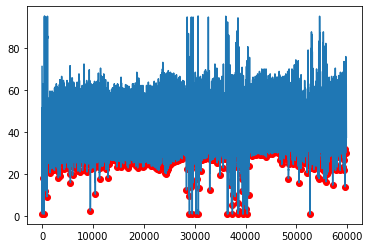

In [10]:
import matplotlib.pyplot as plt

plt.plot(vals)
plt.scatter(minlist, vals[minlist], color='r')

# Preop raw vital data에서 250Hz ECG 5min peak 뽑기

In [56]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/preop_vital/preop_vital'
vital_list = os.listdir(vital_path)
SRATE = 250
LEN_INPUT = 120
non_list, error_list = [], []


LEN = SRATE*LEN_INPUT # len per nrs
non_ecg, short_ecg, long_ecg = 0, 0, 0
cnt = 0
for f_vital in vital_list:
    cnt += 1
    cachepath = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_preop_all/" + f_vital[3:]
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing peak ' + f_vital)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        
        vals2 = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADC/ECG_II'], interval = 1/SRATE).flatten()
        print('size of', f_vital, ':', len(vals2), end='')
        
        
        if len(np.unique(vals2)) == 1:
            print('  no data')
            non_list.append(f_vital)
            continue

        
        print('\ndetecting peak...', end='')
        
        try:
            r_peak_list = arr.detect_qrs((pd.DataFrame(vals2).fillna(method='ffill').fillna(method='bfill').values.flatten()),SRATE)

        except Exception as er:
            print('에러발생:', er)
            non_ecg += 1
            error_list.append({'file': f_vital, 'type': 'ECG', 'error': er, })
        else:
            if len(vals2)>=5*60*SRATE:
                pickle.dump(r_peak_list, open(cachepath, 'wb'))
            print('successfully saved ECG peaks')     

(1/4116) size of F4_190718_122631.vital : 149550
detecting peak...successfully saved ECG peaks
(2/4116) size of R2_201017_152717.vital : 149026
detecting peak...successfully saved ECG peaks
(3/4116) size of R7_200325_140654.vital : 149251
detecting peak...successfully saved ECG peaks
(4/4116) size of R6_200311_074332.vital : 149811
detecting peak...successfully saved ECG peaks
(5/4116) size of D1_190717_122932.vital : 149600
detecting peak...successfully saved ECG peaks
(6/4116) size of D4_190723_120847.vital : 149100
detecting peak...successfully saved ECG peaks
(7/4116) size of R6_200521_075516.vital : 149151
detecting peak...successfully saved ECG peaks
(8/4116) size of E1_200120_074737.vital : 149550
detecting peak...successfully saved ECG peaks
(9/4116) size of R2_200318_140336.vital : 149651
detecting peak...successfully saved ECG peaks
(10/4116) size of E4_200629_142321.vital : 0
detecting peak...에러발생: math domain error
(11/4116) size of D4_200717_132621.vital : 149800
detecting

detecting peak...successfully saved ECG peaks
(89/4116) size of C5_200512_200041.vital : 149950
detecting peak...successfully saved ECG peaks
(90/4116) size of C3_201016_142607.vital : 149100
detecting peak...successfully saved ECG peaks
(91/4116) size of F1_190903_141413.vital : 148800
detecting peak...successfully saved ECG peaks
(92/4116) size of D2_200526_205224.vital : 149950
detecting peak...successfully saved ECG peaks
(93/4116) size of A2_190723_142945.vital : 149225
detecting peak...successfully saved ECG peaks
(94/4116) size of A1_190830_144554.vital : 148900
detecting peak...successfully saved ECG peaks
(95/4116) size of A5_191023_112031.vital : 148750
detecting peak...successfully saved ECG peaks
(96/4116) size of R3_200114_101554.vital : 149900
detecting peak...successfully saved ECG peaks
(97/4116) size of R6_200730_134521.vital : 149176
detecting peak...successfully saved ECG peaks
(98/4116) size of R3_200312_074723.vital : 149154
detecting peak...successfully saved ECG 

detecting peak...successfully saved ECG peaks
(259/4116) size of F4_190823_142416.vital : 149450
detecting peak...successfully saved ECG peaks
(260/4116) size of R4_200610_141741.vital : 149301
detecting peak...successfully saved ECG peaks
(261/4116) size of C4_201016_102240.vital : 148800
detecting peak...successfully saved ECG peaks
(262/4116) size of D4_190917_075001.vital : 149050
detecting peak...successfully saved ECG peaks
(263/4116) size of B3_200916_160158.vital : 1  no data
(264/4116) size of R2_201014_211205.vital : 149578
detecting peak...successfully saved ECG peaks
(265/4116) size of R4_200207_154712.vital : 149155
detecting peak...successfully saved ECG peaks
(266/4116) size of R6_200302_170121.vital : 149801
detecting peak...successfully saved ECG peaks
(267/4116) size of R4_200304_074618.vital : 78250
detecting peak...successfully saved ECG peaks
(268/4116) size of R9_200820_092607.vital : 149101
detecting peak...successfully saved ECG peaks
(269/4116) size of R5_20050

detecting peak...successfully saved ECG peaks
(346/4116) size of R6_200528_211925.vital : 149751
detecting peak...successfully saved ECG peaks
(347/4116) size of R10_200219_163713.vital : 149334
detecting peak...successfully saved ECG peaks
(348/4116) size of R3_200324_113219.vital : 149822
detecting peak...successfully saved ECG peaks
(349/4116) size of D1_200205_121801.vital : 149700
detecting peak...successfully saved ECG peaks
(350/4116) size of D4_200102_084316.vital : 149200
detecting peak...successfully saved ECG peaks
(351/4116) size of F1_191018_075531.vital : 149007
detecting peak...successfully saved ECG peaks
(352/4116) size of E3_201008_152838.vital : 149501
detecting peak...successfully saved ECG peaks
(353/4116) size of B3_200917_092135.vital : 1  no data
(354/4116) size of R9_201031_084856.vital : 148951
detecting peak...successfully saved ECG peaks
(355/4116) size of R2_200129_123425.vital : 149750
detecting peak...successfully saved ECG peaks
(356/4116) size of D2_200

detecting peak...successfully saved ECG peaks
(432/4116) size of C3_190829_091217.vital : 148950
detecting peak...successfully saved ECG peaks
(433/4116) size of C3_200116_075741.vital : 149650
detecting peak...successfully saved ECG peaks
(434/4116) size of E1_190409_163203.vital : 149800
detecting peak...successfully saved ECG peaks
(435/4116) size of E4_200102_150019.vital : 149886
detecting peak...successfully saved ECG peaks
(436/4116) size of R10_200129_074512.vital : 149750
detecting peak...successfully saved ECG peaks
(437/4116) size of R6_200228_150042.vital : 149601
detecting peak...successfully saved ECG peaks
(438/4116) size of E6_190719_124554.vital : 149850
detecting peak...successfully saved ECG peaks
(439/4116) size of D2_200210_103803.vital : 149450
detecting peak...successfully saved ECG peaks
(440/4116) size of R3_200625_101347.vital : 149701
detecting peak...successfully saved ECG peaks
(441/4116) size of R1_200602_081641.vital : 149151
detecting peak...successfully

detecting peak...successfully saved ECG peaks
(518/4116) size of A2_200106_102059.vital : 149600
detecting peak...successfully saved ECG peaks
(519/4116) size of R1_200612_145826.vital : 149375
detecting peak...successfully saved ECG peaks
(520/4116) size of R10_200508_145649.vital : 149451
detecting peak...successfully saved ECG peaks
(521/4116) size of R6_200810_120829.vital : 149751
detecting peak...successfully saved ECG peaks
(522/4116) size of C5_191224_074337.vital : 148950
detecting peak...successfully saved ECG peaks
(523/4116) size of A2_190430_074553.vital : 148500
detecting peak...successfully saved ECG peaks
(524/4116) size of R5_200603_101428.vital : 149114
detecting peak...successfully saved ECG peaks
(525/4116) size of D3_190918_125906.vital : 149576
detecting peak...successfully saved ECG peaks
(526/4116) size of R4_200318_162650.vital : 148802
detecting peak...successfully saved ECG peaks
(527/4116) size of C3_190611_105055.vital : 149030
detecting peak...successfully

detecting peak...successfully saved ECG peaks
(691/4116) size of D5_190527_074848.vital : 149550
detecting peak...successfully saved ECG peaks
(692/4116) size of B5_200914_091415.vital : 1  no data
(693/4116) size of E1_200130_100106.vital : 148750
detecting peak...successfully saved ECG peaks
(694/4116) size of R10_200508_075137.vital : 149151
detecting peak...successfully saved ECG peaks
(695/4116) size of E1_200329_141947.vital : 149200
detecting peak...successfully saved ECG peaks
(696/4116) size of R4_200512_074208.vital : 149205
detecting peak...successfully saved ECG peaks
(697/4116) size of E5_201027_153425.vital : 149426
detecting peak...successfully saved ECG peaks
(698/4116) size of F1_190424_130208.vital : 149600
detecting peak...successfully saved ECG peaks
(699/4116) size of R3_200204_123011.vital : 149950
detecting peak...successfully saved ECG peaks
(700/4116) size of D3_200107_075014.vital : 149550
detecting peak...successfully saved ECG peaks
(701/4116) size of F4_190

detecting peak...successfully saved ECG peaks
(863/4116) size of R2_200508_080351.vital : 149401
detecting peak...successfully saved ECG peaks
(864/4116) size of R5_200820_075545.vital : 149101
detecting peak...successfully saved ECG peaks
(865/4116) size of C5_200121_152200.vital : 149202
detecting peak...successfully saved ECG peaks
(866/4116) size of R4_200617_081833.vital : 148701
detecting peak...successfully saved ECG peaks
(867/4116) size of E3_200929_152133.vital : 149352
detecting peak...successfully saved ECG peaks
(868/4116) size of E5_200218_132012.vital : 149350
detecting peak...successfully saved ECG peaks
(869/4116) size of B2_201027_140905.vital : 1  no data
(870/4116) size of E1_200228_145000.vital : 149450
detecting peak...successfully saved ECG peaks
(871/4116) size of R6_200608_080016.vital : 149751
detecting peak...successfully saved ECG peaks
(872/4116) size of D2_200507_204026.vital : 149550
detecting peak...successfully saved ECG peaks
(873/4116) size of R6_2002

detecting peak...successfully saved ECG peaks
(948/4116) size of C1_200103_143726.vital : 149708
detecting peak...successfully saved ECG peaks
(949/4116) size of C3_200730_133119.vital : 149196
detecting peak...successfully saved ECG peaks
(950/4116) size of C4_200923_120756.vital : 149500
detecting peak...successfully saved ECG peaks
(951/4116) size of F1_190415_133409.vital : 149500
detecting peak...successfully saved ECG peaks
(952/4116) size of F4_190906_101457.vital : 149850
detecting peak...successfully saved ECG peaks
(953/4116) size of C3_190906_160036.vital : 148785
detecting peak...successfully saved ECG peaks
(954/4116) size of R5_200308_113356.vital : 149151
detecting peak...successfully saved ECG peaks
(955/4116) size of R6_200131_074905.vital : 148925
detecting peak...successfully saved ECG peaks
(956/4116) size of B5_200928_075635.vital : 1  no data
(957/4116) size of C3_190712_090217.vital : 149350
detecting peak...successfully saved ECG peaks
(958/4116) size of R2_2007

detecting peak...successfully saved ECG peaks
(1035/4116) size of E6_200109_153154.vital : 148769
detecting peak...successfully saved ECG peaks
(1036/4116) size of E4_200821_093217.vital : 149100
detecting peak...successfully saved ECG peaks
(1037/4116) size of D5_190906_104127.vital : 149650
detecting peak...successfully saved ECG peaks
(1038/4116) size of D1_200916_154250.vital : 149976
detecting peak...successfully saved ECG peaks
(1039/4116) size of R4_200619_143936.vital : 149184
detecting peak...successfully saved ECG peaks
(1040/4116) size of F1_190726_120320.vital : 148750
detecting peak...successfully saved ECG peaks
(1041/4116) size of D2_200302_124627.vital : 149176
detecting peak...successfully saved ECG peaks
(1042/4116) size of A6_200109_075705.vital : 149200
detecting peak...successfully saved ECG peaks
(1043/4116) size of E5_190820_125512.vital : 149103
detecting peak...successfully saved ECG peaks
(1044/4116) size of A2_190909_115841.vital : 149700
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1204/4116) size of R4_201014_130035.vital : 149200
detecting peak...successfully saved ECG peaks
(1205/4116) size of C5_190711_193330.vital : 148800
detecting peak...successfully saved ECG peaks
(1206/4116) size of F4_190821_142818.vital : 149360
detecting peak...successfully saved ECG peaks
(1207/4116) size of R4_200312_132604.vital : 148926
detecting peak...successfully saved ECG peaks
(1208/4116) size of R5_200730_142915.vital : 148651
detecting peak...successfully saved ECG peaks
(1209/4116) size of A4_190603_193228.vital : 149850
detecting peak...successfully saved ECG peaks
(1210/4116) size of R3_200813_152713.vital : 149701
detecting peak...successfully saved ECG peaks
(1211/4116) size of A1_191018_151652.vital : 148800
detecting peak...successfully saved ECG peaks
(1212/4116) size of D1_201006_114832.vital : 1  no data
(1213/4116) size of R1_200819_153445.vital : 149201
detecting peak...successfully saved ECG peaks
(1214/4116) size

detecting peak...successfully saved ECG peaks
(1288/4116) size of C3_200306_100402.vital : 149416
detecting peak...successfully saved ECG peaks
(1289/4116) size of R1_200325_184654.vital : 149051
detecting peak...successfully saved ECG peaks
(1290/4116) size of A1_190711_195020.vital : 148651
detecting peak...successfully saved ECG peaks
(1291/4116) size of R3_200519_100951.vital : 149351
detecting peak...successfully saved ECG peaks
(1292/4116) size of R5_200827_215329.vital : 149151
detecting peak...successfully saved ECG peaks
(1293/4116) size of D3_200609_073738.vital : 149950
detecting peak...successfully saved ECG peaks
(1294/4116) size of C3_200911_094726.vital : 149200
detecting peak...successfully saved ECG peaks
(1295/4116) size of F3_190430_190056.vital : 149450
detecting peak...successfully saved ECG peaks
(1296/4116) size of A4_190819_124457.vital : 149350
detecting peak...successfully saved ECG peaks
(1297/4116) size of A3_191021_074923.vital : 1  no data
(1298/4116) size

detecting peak...successfully saved ECG peaks
(1374/4116) size of R10_200617_131458.vital : 149401
detecting peak...successfully saved ECG peaks
(1375/4116) size of F4_190516_075607.vital : 149546
detecting peak...successfully saved ECG peaks
(1376/4116) size of R5_200305_100041.vital : 149501
detecting peak...successfully saved ECG peaks
(1377/4116) size of D4_190722_230909.vital : 149150
detecting peak...successfully saved ECG peaks
(1378/4116) size of R2_200911_075756.vital : 149788
detecting peak...successfully saved ECG peaks
(1379/4116) size of D1_200520_075227.vital : 148650
detecting peak...successfully saved ECG peaks
(1380/4116) size of D1_201013_114632.vital : 149001
detecting peak...successfully saved ECG peaks
(1381/4116) size of F4_191115_074342.vital : 149877
detecting peak...successfully saved ECG peaks
(1382/4116) size of D4_190715_122604.vital : 149100
detecting peak...successfully saved ECG peaks
(1383/4116) size of A3_190424_213212.vital : 149080
detecting peak...su

detecting peak...successfully saved ECG peaks
(1459/4116) size of D2_200214_094848.vital : 149450
detecting peak...successfully saved ECG peaks
(1460/4116) size of C3_200717_095809.vital : 148800
detecting peak...successfully saved ECG peaks
(1461/4116) size of E4_190503_075158.vital : 149600
detecting peak...successfully saved ECG peaks
(1462/4116) size of A3_200110_154907.vital : 149350
detecting peak...successfully saved ECG peaks
(1463/4116) size of D2_200211_165546.vital : 149050
detecting peak...successfully saved ECG peaks
(1464/4116) size of F2_200113_121833.vital : 148799
detecting peak...successfully saved ECG peaks
(1465/4116) size of C3_200721_095559.vital : 149050
detecting peak...successfully saved ECG peaks
(1466/4116) size of A5_191018_074110.vital : 149900
detecting peak...successfully saved ECG peaks
(1467/4116) size of R8_200903_114001.vital : 149776
detecting peak...successfully saved ECG peaks
(1468/4116) size of R4_200716_131930.vital : 149251
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1544/4116) size of E1_200706_231349.vital : 149750
detecting peak...successfully saved ECG peaks
(1545/4116) size of R2_200605_140255.vital : 149201
detecting peak...successfully saved ECG peaks
(1546/4116) size of C3_200109_120431.vital : 148800
detecting peak...successfully saved ECG peaks
(1547/4116) size of D4_190719_133133.vital : 148857
detecting peak...successfully saved ECG peaks
(1548/4116) size of E4_190718_130252.vital : 149650
detecting peak...successfully saved ECG peaks
(1549/4116) size of C3_200710_095919.vital : 149450
detecting peak...successfully saved ECG peaks
(1550/4116) size of R3_201019_151509.vital : 149851
detecting peak...successfully saved ECG peaks
(1551/4116) size of A5_190830_140720.vital : 149850
detecting peak...successfully saved ECG peaks
(1552/4116) size of E1_201014_105314.vital : 149601
detecting peak...successfully saved ECG peaks
(1553/4116) size of D1_190828_140529.vital : 149257
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1628/4116) size of E1_200610_232251.vital : 149600
detecting peak...successfully saved ECG peaks
(1629/4116) size of F3_190419_082256.vital : 149200
detecting peak...successfully saved ECG peaks
(1630/4116) size of F3_191018_093921.vital : 148750
detecting peak...successfully saved ECG peaks
(1631/4116) size of R10_200320_111507.vital : 149151
detecting peak...successfully saved ECG peaks
(1632/4116) size of R2_200918_113202.vital : 148801
detecting peak...successfully saved ECG peaks
(1633/4116) size of C5_200817_130852.vital : 149050
detecting peak...successfully saved ECG peaks
(1634/4116) size of A2_190828_074559.vital : 149077
detecting peak...successfully saved ECG peaks
(1635/4116) size of R6_200508_080014.vital : 149653
detecting peak...successfully saved ECG peaks
(1636/4116) size of E3_201019_135905.vital : 149101
detecting peak...successfully saved ECG peaks
(1637/4116) size of E1_200218_182851.vital : 148750
detecting peak...su

detecting peak...successfully saved ECG peaks
(1713/4116) size of D1_190430_122447.vital : 149000
detecting peak...successfully saved ECG peaks
(1714/4116) size of R5_200120_113238.vital : 149600
detecting peak...successfully saved ECG peaks
(1715/4116) size of R8_200707_112555.vital : 149751
detecting peak...successfully saved ECG peaks
(1716/4116) size of D5_190820_140153.vital : 149601
detecting peak...successfully saved ECG peaks
(1717/4116) size of R4_200923_112555.vital : 149401
detecting peak...successfully saved ECG peaks
(1718/4116) size of D1_200218_095342.vital : 148973
detecting peak...successfully saved ECG peaks
(1719/4116) size of R1_200120_101106.vital : 149300
detecting peak...successfully saved ECG peaks
(1720/4116) size of F2_190821_155838.vital : 149541
detecting peak...successfully saved ECG peaks
(1721/4116) size of R10_201014_075850.vital : 148701
detecting peak...successfully saved ECG peaks
(1722/4116) size of A2_190726_134524.vital : 149401
detecting peak...su

detecting peak...successfully saved ECG peaks
(1797/4116) size of C2_200507_210745.vital : 148700
detecting peak...successfully saved ECG peaks
(1798/4116) size of A6_200109_195027.vital : 148850
detecting peak...successfully saved ECG peaks
(1799/4116) size of D1_200305_075649.vital : 149189
detecting peak...successfully saved ECG peaks
(1800/4116) size of B2_201030_134718.vital : 1  no data
(1801/4116) size of R10_200918_151149.vital : 148508
detecting peak...successfully saved ECG peaks
(1802/4116) size of D1_200909_093020.vital : 148626
detecting peak...successfully saved ECG peaks
(1803/4116) size of D1_200205_093847.vital : 149550
detecting peak...successfully saved ECG peaks
(1804/4116) size of D1_190820_075542.vital : 149551
detecting peak...successfully saved ECG peaks
(1805/4116) size of R10_200121_075232.vital : 148866
detecting peak...successfully saved ECG peaks
(1806/4116) size of D2_190430_075159.vital : 149500
detecting peak...successfully saved ECG peaks
(1807/4116) si

detecting peak...successfully saved ECG peaks
(1884/4116) size of D3_190726_121941.vital : 149769
detecting peak...successfully saved ECG peaks
(1885/4116) size of R3_200515_143050.vital : 149251
detecting peak...successfully saved ECG peaks
(1886/4116) size of R6_200303_074833.vital : 149301
detecting peak...successfully saved ECG peaks
(1887/4116) size of D2_200812_150253.vital : 149227
detecting peak...successfully saved ECG peaks
(1888/4116) size of E3_190704_075653.vital : 149700
detecting peak...successfully saved ECG peaks
(1889/4116) size of D2_200326_120218.vital : 149050
detecting peak...successfully saved ECG peaks
(1890/4116) size of C4_200513_191822.vital : 149689
detecting peak...successfully saved ECG peaks
(1891/4116) size of F2_200102_215536.vital : 149150
detecting peak...successfully saved ECG peaks
(1892/4116) size of D5_190502_131833.vital : 149756
detecting peak...successfully saved ECG peaks
(1893/4116) size of C3_200929_074219.vital : 149750
detecting peak...suc

detecting peak...successfully saved ECG peaks
(1968/4116) size of E1_190603_090650.vital : 149800
detecting peak...successfully saved ECG peaks
(1969/4116) size of B2_201014_141604.vital : 1  no data
(1970/4116) size of E3_190523_081856.vital : 148600
detecting peak...successfully saved ECG peaks
(1971/4116) size of C3_190906_135740.vital : 149308
detecting peak...successfully saved ECG peaks
(1972/4116) size of D3_190707_230359.vital : 148730
detecting peak...successfully saved ECG peaks
(1973/4116) size of A6_190513_123241.vital : 149350
detecting peak...successfully saved ECG peaks
(1974/4116) size of D4_190509_162218.vital : 148750
detecting peak...successfully saved ECG peaks
(1975/4116) size of B1_201013_141642.vital : 1  no data
(1976/4116) size of C3_200710_112959.vital : 149200
detecting peak...successfully saved ECG peaks
(1977/4116) size of E1_190412_174003.vital : 149750
detecting peak...successfully saved ECG peaks
(1978/4116) size of C2_201016_075908.vital : 149459
detect

detecting peak...successfully saved ECG peaks
(2055/4116) size of C5_201013_074305.vital : 149650
detecting peak...successfully saved ECG peaks
(2056/4116) size of E5_200810_131810.vital : 149384
detecting peak...successfully saved ECG peaks
(2057/4116) size of R9_200924_104926.vital : 149551
detecting peak...successfully saved ECG peaks
(2058/4116) size of E4_190612_073833.vital : 149400
detecting peak...successfully saved ECG peaks
(2059/4116) size of E1_200911_082052.vital : 149967
detecting peak...successfully saved ECG peaks
(2060/4116) size of E3_200129_074659.vital : 149133
detecting peak...successfully saved ECG peaks
(2061/4116) size of D1_200617_100218.vital : 1  no data
(2062/4116) size of E1_200331_192934.vital : 149400
detecting peak...successfully saved ECG peaks
(2063/4116) size of R10_200602_203228.vital : 149201
detecting peak...successfully saved ECG peaks
(2064/4116) size of A2_190515_161208.vital : 149350
detecting peak...successfully saved ECG peaks
(2065/4116) siz

detecting peak...successfully saved ECG peaks
(2140/4116) size of E1_200604_182032.vital : 149100
detecting peak...successfully saved ECG peaks
(2141/4116) size of R3_200221_145320.vital : 149776
detecting peak...successfully saved ECG peaks
(2142/4116) size of E1_201026_114736.vital : 148951
detecting peak...successfully saved ECG peaks
(2143/4116) size of A2_191018_135832.vital : 149100
detecting peak...successfully saved ECG peaks
(2144/4116) size of E2_190429_101942.vital : 149528
detecting peak...successfully saved ECG peaks
(2145/4116) size of F4_190904_133917.vital : 149600
detecting peak...successfully saved ECG peaks
(2146/4116) size of F2_190712_091936.vital : 149716
detecting peak...successfully saved ECG peaks
(2147/4116) size of C5_200220_074346.vital : 149900
detecting peak...successfully saved ECG peaks
(2148/4116) size of A2_190829_143915.vital : 148926
detecting peak...successfully saved ECG peaks
(2149/4116) size of R1_200714_080111.vital : 149101
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2226/4116) size of R6_200508_210511.vital : 149851
detecting peak...successfully saved ECG peaks
(2227/4116) size of E1_200611_075059.vital : 149334
detecting peak...successfully saved ECG peaks
(2228/4116) size of D1_200204_095852.vital : 149500
detecting peak...successfully saved ECG peaks
(2229/4116) size of C4_201005_191023.vital : 148900
detecting peak...successfully saved ECG peaks
(2230/4116) size of R2_200716_155514.vital : 149723
detecting peak...successfully saved ECG peaks
(2231/4116) size of R4_201020_155813.vital : 149300
detecting peak...successfully saved ECG peaks
(2232/4116) size of A1_190820_115226.vital : 149750
detecting peak...successfully saved ECG peaks
(2233/4116) size of D2_200317_133420.vital : 149000
detecting peak...successfully saved ECG peaks
(2234/4116) size of R3_200120_100517.vital : 149900
detecting peak...successfully saved ECG peaks
(2235/4116) size of D3_201006_080243.vital : 149601
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2312/4116) size of D1_190514_122222.vital : 148550
detecting peak...successfully saved ECG peaks
(2313/4116) size of A5_190906_075037.vital : 148800
detecting peak...successfully saved ECG peaks
(2314/4116) size of D2_200310_175727.vital : 149450
detecting peak...successfully saved ECG peaks
(2315/4116) size of D2_200219_143911.vital : 149050
detecting peak...successfully saved ECG peaks
(2316/4116) size of R6_200714_115512.vital : 149551
detecting peak...successfully saved ECG peaks
(2317/4116) size of F1_190718_075433.vital : 148918
detecting peak...successfully saved ECG peaks
(2318/4116) size of E4_200701_080509.vital : 149000
detecting peak...successfully saved ECG peaks
(2319/4116) size of R2_200318_074415.vital : 149172
detecting peak...successfully saved ECG peaks
(2320/4116) size of D5_200706_152001.vital : 149200
detecting peak...successfully saved ECG peaks
(2321/4116) size of E4_200521_191736.vital : 148950
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2398/4116) size of R3_200322_000729.vital : 149051
detecting peak...successfully saved ECG peaks
(2399/4116) size of C5_190515_151432.vital : 149502
detecting peak...successfully saved ECG peaks
(2400/4116) size of F4_190719_094007.vital : 148650
detecting peak...successfully saved ECG peaks
(2401/4116) size of D2_200518_074328.vital : 149800
detecting peak...successfully saved ECG peaks
(2402/4116) size of D2_200724_075159.vital : 149700
detecting peak...successfully saved ECG peaks
(2403/4116) size of E1_200522_122314.vital : 149750
detecting peak...successfully saved ECG peaks
(2404/4116) size of E1_191219_150436.vital : 150000
detecting peak...successfully saved ECG peaks
(2405/4116) size of F1_190822_114547.vital : 148850
detecting peak...successfully saved ECG peaks
(2406/4116) size of R4_201028_182934.vital : 148751
detecting peak...successfully saved ECG peaks
(2407/4116) size of D1_200129_091302.vital : 148900
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2483/4116) size of C2_200515_075657.vital : 149300
detecting peak...successfully saved ECG peaks
(2484/4116) size of C3_190517_080003.vital : 149600
detecting peak...successfully saved ECG peaks
(2485/4116) size of C3_190502_093840.vital : 149060
detecting peak...successfully saved ECG peaks
(2486/4116) size of D2_200120_075444.vital : 149850
detecting peak...successfully saved ECG peaks
(2487/4116) size of D4_200103_112004.vital : 148700
detecting peak...successfully saved ECG peaks
(2488/4116) size of R9_200812_075436.vital : 149001
detecting peak...successfully saved ECG peaks
(2489/4116) size of R4_200615_074842.vital : 148751
detecting peak...successfully saved ECG peaks
(2490/4116) size of F2_190903_153035.vital : 148800
detecting peak...successfully saved ECG peaks
(2491/4116) size of R1_200129_090450.vital : 149350
detecting peak...successfully saved ECG peaks
(2492/4116) size of R6_200717_094144.vital : 149008
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2569/4116) size of R4_200826_121438.vital : 148901
detecting peak...successfully saved ECG peaks
(2570/4116) size of D3_190909_081405.vital : 148800
detecting peak...successfully saved ECG peaks
(2571/4116) size of E5_200512_164107.vital : 148900
detecting peak...successfully saved ECG peaks
(2572/4116) size of R9_200319_103451.vital : 149851
detecting peak...successfully saved ECG peaks
(2573/4116) size of D5_190705_130533.vital : 149597
detecting peak...successfully saved ECG peaks
(2574/4116) size of E1_200706_122058.vital : 149800
detecting peak...successfully saved ECG peaks
(2575/4116) size of E2_200203_133915.vital : 148900
detecting peak...successfully saved ECG peaks
(2576/4116) size of C3_200820_155357.vital : 149300
detecting peak...successfully saved ECG peaks
(2577/4116) size of R8_200115_144045.vital : 149873
detecting peak...successfully saved ECG peaks
(2578/4116) size of A6_191119_074531.vital : 149323
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2738/4116) size of R8_200722_105747.vital : 149751
detecting peak...successfully saved ECG peaks
(2739/4116) size of R5_200213_212938.vital : 149859
detecting peak...successfully saved ECG peaks
(2740/4116) size of R4_200903_090348.vital : 149851
detecting peak...successfully saved ECG peaks
(2741/4116) size of R7_201030_075159.vital : 148851
detecting peak...successfully saved ECG peaks
(2742/4116) size of D1_190821_134506.vital : 149397
detecting peak...successfully saved ECG peaks
(2743/4116) size of D1_190611_154528.vital : 149150
detecting peak...successfully saved ECG peaks
(2744/4116) size of R4_200804_090102.vital : 148501
detecting peak...successfully saved ECG peaks
(2745/4116) size of C4_190821_074856.vital : 149727
detecting peak...successfully saved ECG peaks
(2746/4116) size of R5_200518_075429.vital : 149601
detecting peak...successfully saved ECG peaks
(2747/4116) size of A1_190617_172552.vital : 149450
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2823/4116) size of D1_190703_093345.vital : 149150
detecting peak...successfully saved ECG peaks
(2824/4116) size of D1_200108_073657.vital : 148850
detecting peak...successfully saved ECG peaks
(2825/4116) size of D1_190528_221550.vital : 149950
detecting peak...successfully saved ECG peaks
(2826/4116) size of C5_200228_085327.vital : 149400
detecting peak...successfully saved ECG peaks
(2827/4116) size of D4_200224_135457.vital : 149401
detecting peak...successfully saved ECG peaks
(2828/4116) size of E4_200220_104246.vital : 149100
detecting peak...successfully saved ECG peaks
(2829/4116) size of C3_200820_124941.vital : 149550
detecting peak...successfully saved ECG peaks
(2830/4116) size of D1_201028_121917.vital : 149301
detecting peak...successfully saved ECG peaks
(2831/4116) size of E3_200901_130344.vital : 148600
detecting peak...successfully saved ECG peaks
(2832/4116) size of D2_190722_083600.vital : 149651
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2909/4116) size of D1_190517_100217.vital : 149050
detecting peak...successfully saved ECG peaks
(2910/4116) size of F3_190723_141216.vital : 148850
detecting peak...successfully saved ECG peaks
(2911/4116) size of F2_190612_124417.vital : 148700
detecting peak...successfully saved ECG peaks
(2912/4116) size of D2_200727_223122.vital : 149100
detecting peak...successfully saved ECG peaks
(2913/4116) size of R8_200715_125231.vital : 149901
detecting peak...successfully saved ECG peaks
(2914/4116) size of D1_190906_132647.vital : 149450
detecting peak...successfully saved ECG peaks
(2915/4116) size of D2_200818_104731.vital : 149150
detecting peak...successfully saved ECG peaks
(2916/4116) size of R3_200214_121035.vital : 149700
detecting peak...successfully saved ECG peaks
(2917/4116) size of R6_200228_124753.vital : 149751
detecting peak...successfully saved ECG peaks
(2918/4116) size of C5_200818_164520.vital : 149650
detecting peak...suc

detecting peak...successfully saved ECG peaks
(2995/4116) size of R8_200224_075918.vital : 149850
detecting peak...successfully saved ECG peaks
(2996/4116) size of R4_200526_194918.vital : 148601
detecting peak...successfully saved ECG peaks
(2997/4116) size of E3_200203_145431.vital : 149500
detecting peak...successfully saved ECG peaks
(2998/4116) size of E5_200318_131355.vital : 149250
detecting peak...successfully saved ECG peaks
(2999/4116) size of D1_190903_171323.vital : 149250
detecting peak...successfully saved ECG peaks
(3000/4116) size of A2_190821_092145.vital : 148500
detecting peak...successfully saved ECG peaks
(3001/4116) size of R8_200302_150459.vital : 149850
detecting peak...successfully saved ECG peaks
(3002/4116) size of C4_200608_081419.vital : 149850
detecting peak...successfully saved ECG peaks
(3003/4116) size of R9_200521_112059.vital : 149723
detecting peak...successfully saved ECG peaks
(3004/4116) size of A4_200109_095846.vital : 149650
detecting peak...suc

detecting peak...successfully saved ECG peaks
(3169/4116) size of C2_200624_161453.vital : 149650
detecting peak...successfully saved ECG peaks
(3170/4116) size of D5_201008_163750.vital : 149351
detecting peak...successfully saved ECG peaks
(3171/4116) size of R1_201005_093732.vital : 149201
detecting peak...successfully saved ECG peaks
(3172/4116) size of D3_190906_121259.vital : 149500
detecting peak...successfully saved ECG peaks
(3173/4116) size of D4_201026_164659.vital : 149951
detecting peak...successfully saved ECG peaks
(3174/4116) size of C4_200701_122728.vital : 148750
detecting peak...successfully saved ECG peaks
(3175/4116) size of F2_190828_105608.vital : 148660
detecting peak...successfully saved ECG peaks
(3176/4116) size of D3_190723_121448.vital : 149651
detecting peak...successfully saved ECG peaks
(3177/4116) size of C3_200207_133142.vital : 149700
detecting peak...successfully saved ECG peaks
(3178/4116) size of E1_200205_112301.vital : 148700
detecting peak...suc

detecting peak...successfully saved ECG peaks
(3338/4116) size of E4_190722_151519.vital : 149850
detecting peak...successfully saved ECG peaks
(3339/4116) size of E4_190916_075012.vital : 149650
detecting peak...successfully saved ECG peaks
(3340/4116) size of D2_200819_124519.vital : 149576
detecting peak...successfully saved ECG peaks
(3341/4116) size of E1_200306_144103.vital : 149450
detecting peak...successfully saved ECG peaks
(3342/4116) size of C5_200717_080055.vital : 148750
detecting peak...successfully saved ECG peaks
(3343/4116) size of E1_201006_235340.vital : 149451
detecting peak...successfully saved ECG peaks
(3344/4116) size of C5_200203_083508.vital : 149850
detecting peak...successfully saved ECG peaks
(3345/4116) size of E1_200803_123920.vital : 149650
detecting peak...successfully saved ECG peaks
(3346/4116) size of R3_200116_154955.vital : 149819
detecting peak...successfully saved ECG peaks
(3347/4116) size of R5_200923_140121.vital : 149801
detecting peak...suc

detecting peak...successfully saved ECG peaks
(3423/4116) size of R2_200115_074830.vital : 149250
detecting peak...successfully saved ECG peaks
(3424/4116) size of D3_200721_074310.vital : 149700
detecting peak...successfully saved ECG peaks
(3425/4116) size of E1_200625_103106.vital : 149500
detecting peak...successfully saved ECG peaks
(3426/4116) size of D4_190828_133228.vital : 149600
detecting peak...successfully saved ECG peaks
(3427/4116) size of R3_200619_121819.vital : 149501
detecting peak...successfully saved ECG peaks
(3428/4116) size of E4_201022_115517.vital : 149401
detecting peak...successfully saved ECG peaks
(3429/4116) size of D4_190502_202505.vital : 149000
detecting peak...successfully saved ECG peaks
(3430/4116) size of F4_190821_101200.vital : 149721
detecting peak...successfully saved ECG peaks
(3431/4116) size of E3_200630_101818.vital : 149000
detecting peak...successfully saved ECG peaks
(3432/4116) size of R4_200921_154424.vital : 148951
detecting peak...suc

detecting peak...successfully saved ECG peaks
(3508/4116) size of E4_200225_115008.vital : 149350
detecting peak...successfully saved ECG peaks
(3509/4116) size of C5_190916_095149.vital : 149600
detecting peak...successfully saved ECG peaks
(3510/4116) size of F4_190710_103827.vital : 149550
detecting peak...successfully saved ECG peaks
(3511/4116) size of E1_200102_155729.vital : 149850
detecting peak...successfully saved ECG peaks
(3512/4116) size of R6_200327_105814.vital : 149974
detecting peak...successfully saved ECG peaks
(3513/4116) size of F4_190830_073834.vital : 149600
detecting peak...successfully saved ECG peaks
(3514/4116) size of D1_190830_075622.vital : 148900
detecting peak...successfully saved ECG peaks
(3515/4116) size of R4_200716_074215.vital : 125951
detecting peak...successfully saved ECG peaks
(3516/4116) size of A2_190717_074018.vital : 149301
detecting peak...successfully saved ECG peaks
(3517/4116) size of E1_190409_174344.vital : 149784
detecting peak...suc

detecting peak...successfully saved ECG peaks
(3593/4116) size of C3_200117_093115.vital : 148650
detecting peak...successfully saved ECG peaks
(3594/4116) size of R8_201028_133731.vital : 149876
detecting peak...successfully saved ECG peaks
(3595/4116) size of R5_200515_122401.vital : 149346
detecting peak...successfully saved ECG peaks
(3596/4116) size of E2_190719_174525.vital : 148950
detecting peak...successfully saved ECG peaks
(3597/4116) size of C5_200915_073947.vital : 149100
detecting peak...successfully saved ECG peaks
(3598/4116) size of R4_200331_075426.vital : 149701
detecting peak...successfully saved ECG peaks
(3599/4116) size of R1_201006_075652.vital : 149201
detecting peak...successfully saved ECG peaks
(3600/4116) size of R5_200528_155148.vital : 149901
detecting peak...successfully saved ECG peaks
(3601/4116) size of R3_200526_075358.vital : 149331
detecting peak...successfully saved ECG peaks
(3602/4116) size of E1_200701_165851.vital : 149800
detecting peak...suc

detecting peak...successfully saved ECG peaks
(3679/4116) size of C5_200319_224358.vital : 149775
detecting peak...successfully saved ECG peaks
(3680/4116) size of E1_200508_101119.vital : 149400
detecting peak...successfully saved ECG peaks
(3681/4116) size of D3_190906_174143.vital : 149150
detecting peak...successfully saved ECG peaks
(3682/4116) size of C2_200616_145141.vital : 149700
detecting peak...successfully saved ECG peaks
(3683/4116) size of R10_200710_134349.vital : 148801
detecting peak...successfully saved ECG peaks
(3684/4116) size of E6_200605_123124.vital : 149051
detecting peak...successfully saved ECG peaks
(3685/4116) size of D3_190530_094144.vital : 148550
detecting peak...successfully saved ECG peaks
(3686/4116) size of D4_190617_141423.vital : 149600
detecting peak...successfully saved ECG peaks
(3687/4116) size of R10_200812_113205.vital : 148958
detecting peak...successfully saved ECG peaks
(3688/4116) size of R5_200715_074916.vital : 149751
detecting peak...s

detecting peak...successfully saved ECG peaks
(3765/4116) size of A5_190816_142608.vital : 148700
detecting peak...successfully saved ECG peaks
(3766/4116) size of R5_200902_075457.vital : 149851
detecting peak...successfully saved ECG peaks
(3767/4116) size of R5_200925_122517.vital : 149051
detecting peak...successfully saved ECG peaks
(3768/4116) size of E5_190903_075245.vital : 149150
detecting peak...successfully saved ECG peaks
(3769/4116) size of C3_200319_141910.vital : 149350
detecting peak...successfully saved ECG peaks
(3770/4116) size of A1_190711_174121.vital : 148951
detecting peak...successfully saved ECG peaks
(3771/4116) size of R6_200120_152635.vital : 149600
detecting peak...successfully saved ECG peaks
(3772/4116) size of D1_200116_140001.vital : 149150
detecting peak...successfully saved ECG peaks
(3773/4116) size of R4_200131_080403.vital : 148900
detecting peak...successfully saved ECG peaks
(3774/4116) size of D5_190703_101855.vital : 149950
detecting peak...suc

detecting peak...successfully saved ECG peaks
(3851/4116) size of R7_200521_181041.vital : 149763
detecting peak...successfully saved ECG peaks
(3852/4116) size of C3_200702_135304.vital : 149600
detecting peak...successfully saved ECG peaks
(3853/4116) size of E1_200325_133838.vital : 148703
detecting peak...successfully saved ECG peaks
(3854/4116) size of E3_200927_232614.vital : 149201
detecting peak...successfully saved ECG peaks
(3855/4116) size of A6_190911_171143.vital : 149550
detecting peak...successfully saved ECG peaks
(3856/4116) size of D4_190712_130544.vital : 148900
detecting peak...successfully saved ECG peaks
(3857/4116) size of A2_190516_144316.vital : 149300
detecting peak...successfully saved ECG peaks
(3858/4116) size of F2_191018_113203.vital : 149600
detecting peak...successfully saved ECG peaks
(3859/4116) size of E5_190503_074416.vital : 149750
detecting peak...successfully saved ECG peaks
(3860/4116) size of R2_200213_214537.vital : 149850
detecting peak...suc

detecting peak...successfully saved ECG peaks
(3935/4116) size of R1_200513_165749.vital : 149301
detecting peak...successfully saved ECG peaks
(3936/4116) size of R10_200117_143555.vital : 149700
detecting peak...successfully saved ECG peaks
(3937/4116) size of E4_200817_135822.vital : 149100
detecting peak...successfully saved ECG peaks
(3938/4116) size of D3_190705_094317.vital : 148984
detecting peak...successfully saved ECG peaks
(3939/4116) size of R3_200911_093545.vital : 149751
detecting peak...successfully saved ECG peaks
(3940/4116) size of R8_201020_074855.vital : 149701
detecting peak...successfully saved ECG peaks
(3941/4116) size of A6_190820_125116.vital : 149650
detecting peak...successfully saved ECG peaks
(3942/4116) size of D5_201026_150534.vital : 149401
detecting peak...successfully saved ECG peaks
(3943/4116) size of A5_200115_093924.vital : 149900
detecting peak...successfully saved ECG peaks
(3944/4116) size of E5_200110_143909.vital : 149100
detecting peak...su

detecting peak...successfully saved ECG peaks
(4020/4116) size of R9_201029_150341.vital : 148951
detecting peak...successfully saved ECG peaks
(4021/4116) size of A5_191023_075501.vital : 149450
detecting peak...successfully saved ECG peaks
(4022/4116) size of C3_200507_144450.vital : 149686
detecting peak...successfully saved ECG peaks
(4023/4116) size of R8_200811_231038.vital : 149996
detecting peak...successfully saved ECG peaks
(4024/4116) size of D1_200916_090301.vital : 148551
detecting peak...successfully saved ECG peaks
(4025/4116) size of D4_191024_075055.vital : 149800
detecting peak...successfully saved ECG peaks
(4026/4116) size of C2_200822_170704.vital : 148800
detecting peak...successfully saved ECG peaks
(4027/4116) size of D4_190424_135921.vital : 1  no data
(4028/4116) size of C3_190530_140443.vital : 149267
detecting peak...successfully saved ECG peaks
(4029/4116) size of C3_200326_135710.vital : 149951
detecting peak...successfully saved ECG peaks
(4030/4116) size

detecting peak...successfully saved ECG peaks
(4105/4116) size of D4_190902_075336.vital : 149700
detecting peak...successfully saved ECG peaks
(4106/4116) size of A2_190917_105334.vital : 149050
detecting peak...successfully saved ECG peaks
(4107/4116) size of R5_200809_221204.vital : 149601
detecting peak...successfully saved ECG peaks
(4108/4116) size of E2_200129_144607.vital : 148700
detecting peak...successfully saved ECG peaks
(4109/4116) size of R4_200605_154241.vital : 149451
detecting peak...successfully saved ECG peaks
(4110/4116) size of D3_200513_151200.vital : 149100
detecting peak...successfully saved ECG peaks
(4111/4116) size of E1_190822_133911.vital : 149650
detecting peak...successfully saved ECG peaks
(4112/4116) size of E4_200106_113720.vital : 149550
detecting peak...successfully saved ECG peaks
(4113/4116) size of F3_200114_104538.vital : 148639
detecting peak...successfully saved ECG peaks
(4114/4116) size of E3_200206_094226.vital : 149550
detecting peak...suc

In [36]:
overlap_list = ['190711_075756.vital',
'190705_122657.vital',
'190711_111608.vital',
'190711_193330.vital',
'190502_150941.vital',
'190711_153824.vital',
'190711_102000.vital',
'190711_075049.vital',
'200813_221552.vital',
'190711_180937.vital',
'190820_152945.vital',
'190711_162324.vital',
'190906_075037.vital',
'190820_074544.vital',
'201028_182934.vital',
'190711_074737.vital',
'190417_220706.vital',
'190603_133617.vital',
'190718_074311.vital',
'190711_074544.vital',
'200213_194219.vital',
'190821_074221.vital',
'200102_184637.vital',
'190710_150659.vital',
'190718_092243.vital',
'190820_155744.vital',
'190816_141322.vital',
'190718_122531.vital',
'190711_174121.vital',
'190502_135046.vital',
'190711_222152.vital',
'190412_074132.vital']

In [37]:
f_vital = '190705_122657.vital'
for overlap in overlap_list:
    f_vital = vital_list[overlap in vital_list]
    
    file_path = df_preop_match[df_preop_match['fileid']==f_vital]['file_path'].values
    

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [47]:
opid_preop = []
f_vital_list = []
for f_vital in vital_list:
    cnt += 1

    file_path = df_preop_match[df_preop_match['fileid']==f_vital]['file_path'].values
    if not file_path:
        print('no mathced opid:', f_vital)
        continue
    f_vital_list.append(f_vital)
    opid_preop.append(file_path[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys


no mathced opid: .ipynb_checkpoints
no mathced opid: pain_orvital.zip


In [49]:
len(opid_preop), len(np.unique(opid_preop)), len(f_vital_list), len(np.unique(f_vital_list))

(4114, 4082, 4114, 4114)

In [18]:
print('preop에서 ECG data가 없는 경우: {}'.format(len(non_list)))
print('preop에서 ECG data가 120초보다 짧은 경우: {}'.format(short_ecg))
print('preop에서 ECG data가 300초보다 긴 경우: {}'.format(long_ecg))

preop에서 ECG data가 없거나 잘못된 경우: 149
preop에서 ECG data가 120초보다 짧은 경우: 151
preop에서 ECG data가 300초보다 긴 경우: 3930


In [28]:
for i in range(len(non_list)):
    vals2 = vitaldb.vital_recs(vital_path+'/'+non_list[i], ['SNUADC/ECG_II'], interval = 1/SRATE).flatten()
    if len(vals2) != 1:
        print('not length 1:', non_list[i])

In [23]:
vals2

array([None], dtype=object)

In [6]:
input_path = '../DL_model/dataset/preprocess3/input3-2/'
x_train_preop = np.load(input_path+'x_train_preop.npz', allow_pickle=True)['arr_0']
x_test_preop = np.load(input_path+'x_test_preop.npz', allow_pickle=True)['arr_0']


x_train_pacu = np.load(input_path+'x_train_pacu.npz', allow_pickle=True)['arr_0']
x_test_pacu = np.load(input_path+'x_test_pacu.npz', allow_pickle=True)['arr_0']

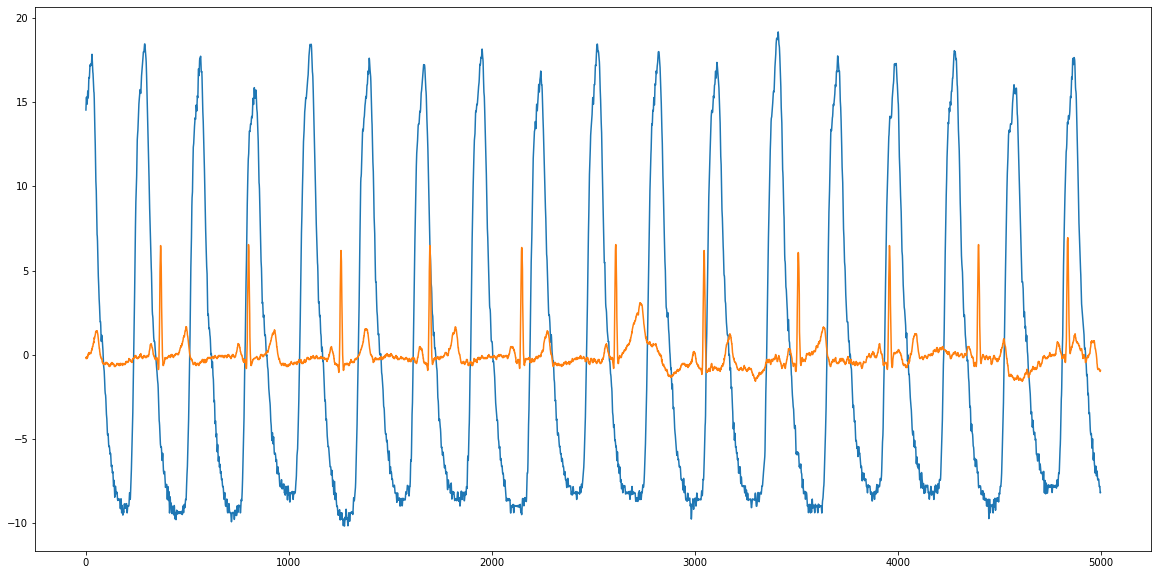

In [3]:
x_ppg = x_train_preop[0,0,:]
x_ecg = x_train_preop[0,1,:]

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(x_ppg)
plt.plot(x_ecg)

plt.show()

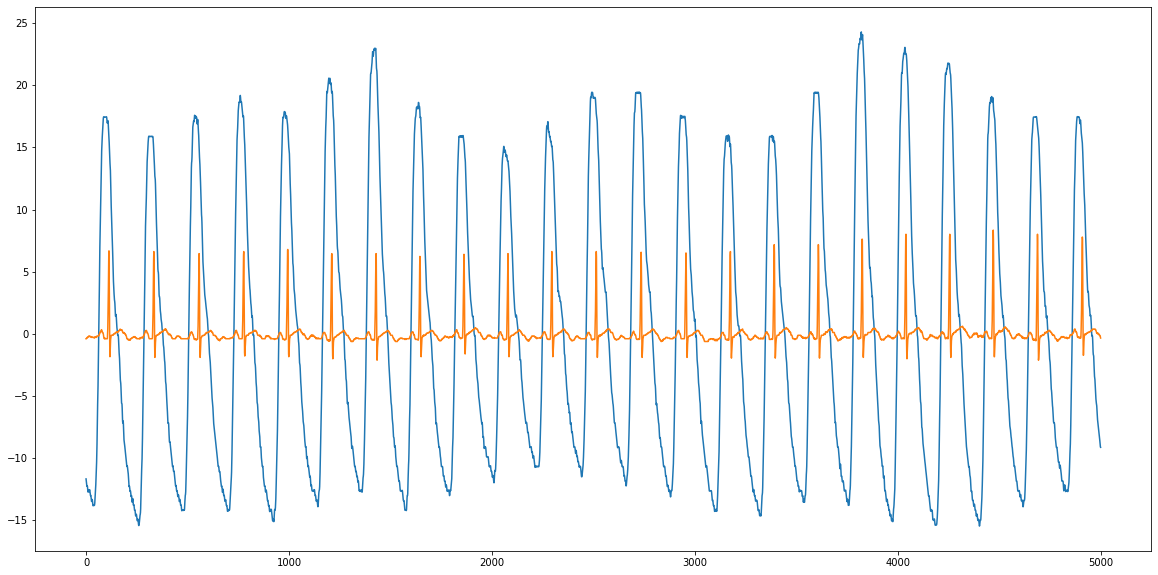

In [7]:
x_ppg = x_train_pacu[0,0,:]
x_ecg = x_train_pacu[0,1,:]

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(x_ppg)
plt.plot(x_ecg)
plt.show()